<a href="https://colab.research.google.com/github/elsagomdef/AA_PRACTICA1_GRUPO_8.ipynb/blob/main/Ahora_tiene_un_titulo%2C_%C2%BFcontento%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv 
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

In [ ]:
# Installers
!pip install opencv-contrib-python
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
subtractor = cv.bgsegm.createBackgroundSubtractorMOG()

def display_video(video):
  fig = plt.figure(figsize=(3,3))
  mov = []
  for i in range(len(video)):
    gray = cv.cvtColor(video[i],cv.COLOR_BGR2GRAY)
    ret, image_bin = cv.threshold(gray,150,255, cv.THRESH_BINARY)
    imgRaw =subtractor.apply(image_bin)
    
    #img = plt.imshow(video[i], animated = True)
    img = plt.imshow(imgRaw, animated = True)
    cv2_imshow(imgRaw)
    
    plt.axis('off')
    mov.append([img])


  anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=100)
  plt.close()
  return anime
    

In [ ]:
cap = cv.VideoCapture('videoplayback_compressed_trimmed.mp4')

In [ ]:
while cap.isOpened():
  ret, frame = cap.read()
  #if frame is read correctl is true´
  if not ret:
    print("Can`t recive frame (stream end?). Exiting...")
    break
  gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
  ret1, thresh1 = cv.threshold(gray,127,255,cv.THRESH_BINARY)
  brush=np.ones((5,5),np.float32)/(5*5)
  filtrado = cv.filter2D(thresh1,-1,brush)
  #tophat = cv.morphologyEx(thresh1, cv.MORPH_TOPHAT, brush)

  cv2_imshow(filtrado)
  if cv.waitKey(1)==ord('1'):
    break
cap.release()
cv.destroyAllWindows



NameError: ignored

In [ ]:
cap2 = imageio.mimread('videoplayback_compressed_trimmed.mp4', memtest = False)
#HTML(display_video(cap2).to_html5_video())

In [ ]:
# nuevo
# nuevo:
#tracker = EuclideanDistTracker()
#detections = []

min_width = 10
min_heigh = 10
# 

def display_video2(video):
  fig = plt.figure(figsize=(3,3))

  # nuevo
  subtractor = cv.bgsegm.createBackgroundSubtractorMOG()
  #

  mov = []
  for i in range(len(video)):
    image = video[i]

    gray = cv.cvtColor(video[i],cv.COLOR_BGR2GRAY)

    blur= cv.GaussianBlur(gray,(3,3),5)
    img_sub = subtractor.apply(blur)
    r, img_bin = cv.threshold(img_sub, 170, 255, cv.THRESH_BINARY)

    dilat = cv.dilate(img_bin, np.ones((5,5)))

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    dilatada = cv.morphologyEx(dilat, cv.MORPH_CLOSE, kernel)
    dilatada = cv.morphologyEx(dilatada, cv.MORPH_CLOSE, kernel)
    

    shapes, h1 = cv.findContours(dilatada, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    #coche = np.zeros([y+h, x+w])
    #detections = []
    for c in shapes:
      (x, y, w, h) = cv.boundingRect(c)
      #print(x, y)
      iscar=(w>= min_width) and (h>= min_heigh)
      
      if not iscar:
        continue
      if (3500 < cv.contourArea(c) and cv.contourArea(c) <250):
        continue
        
      
       #cv.rectangle(image, (x,y),(x+w, y+h), (255,0,255),4)
      

      #coche = image[x:x+w,y:y+h]
      #cv2_imshow(image)
      

    #ret, image_bin = cv.threshold(gray,150,255, cv.THRESH_BINARY)
    #imgRaw =subtractor.apply(image_bin)
    
    #img = plt.imshow(video[i], animated = True)
    img = plt.imshow(img_bin, animated = True)
    cv2_imshow(img_bin) #cambiar imagen normal por dilatada
    
    plt.axis('off')
    mov.append([img])


  anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=100)
  plt.close()
  return anime
    

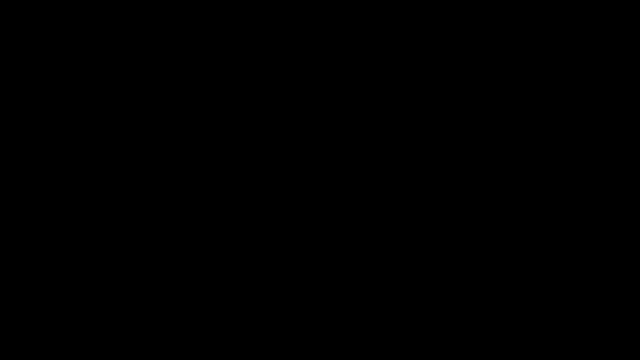

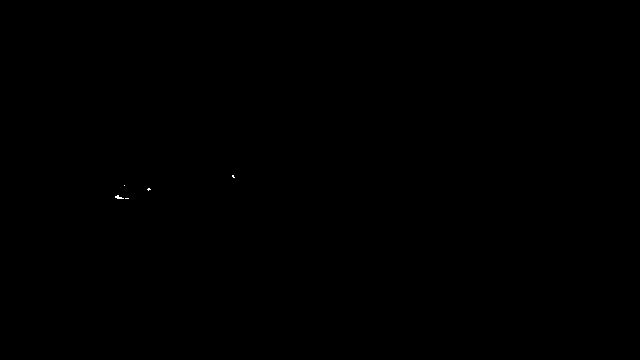

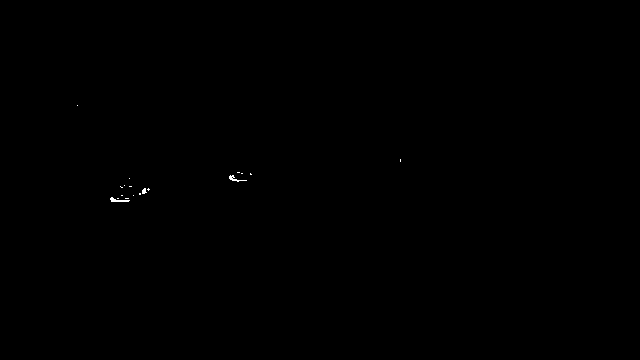

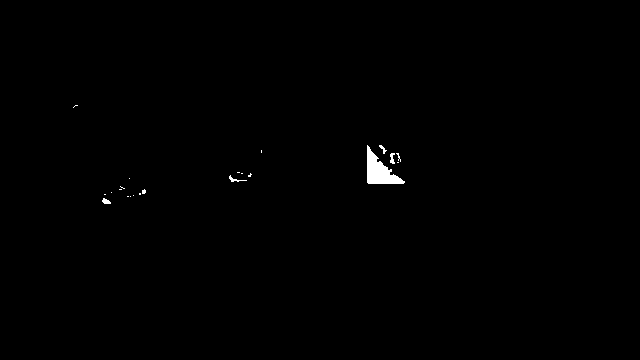

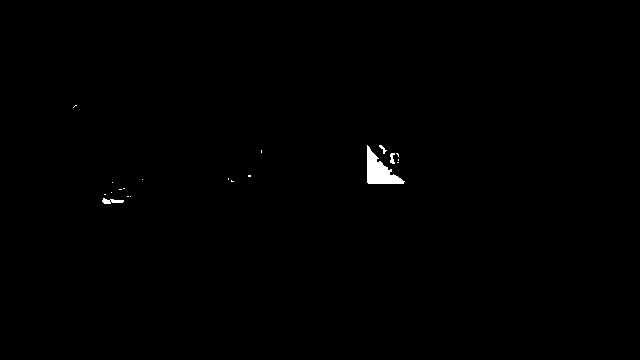

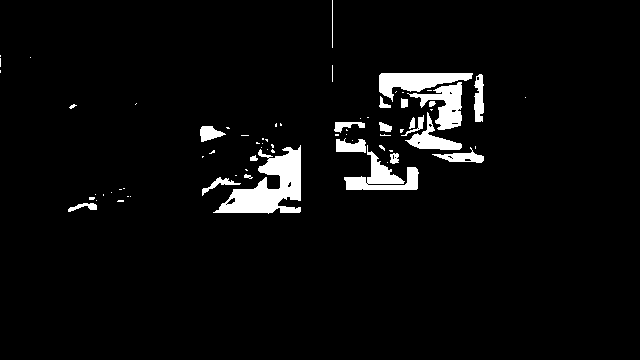

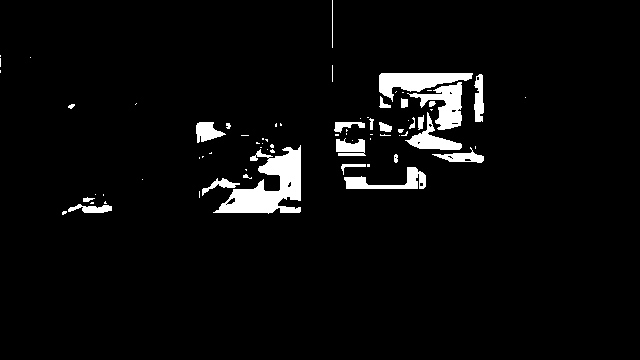

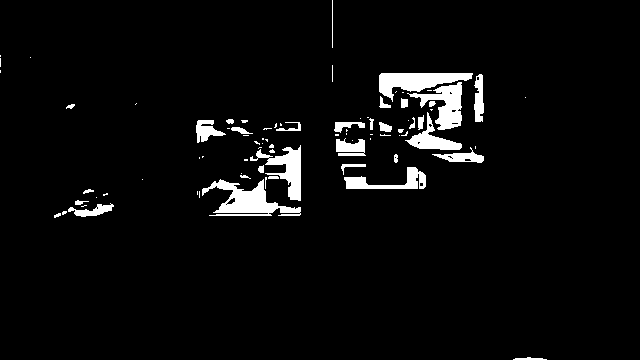

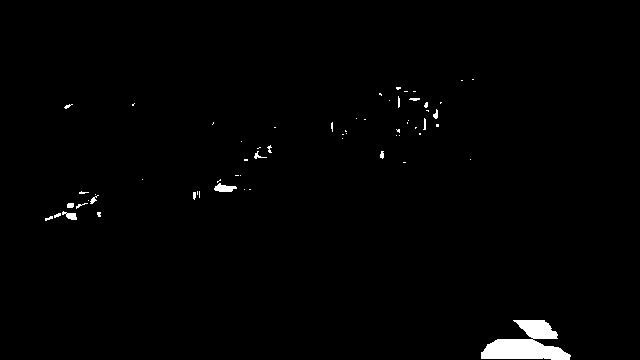

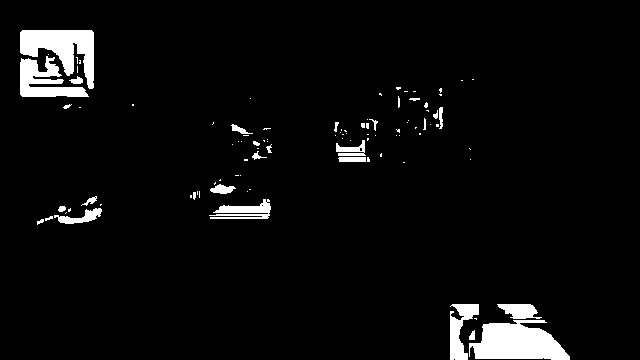

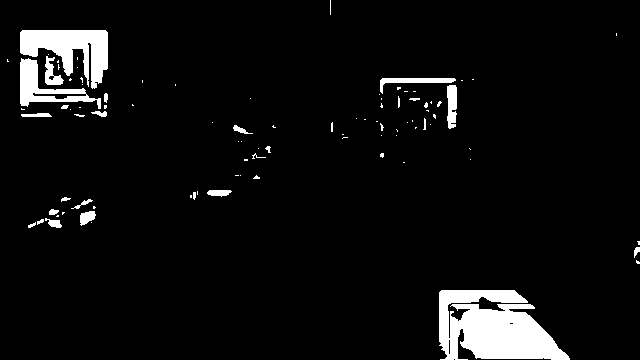

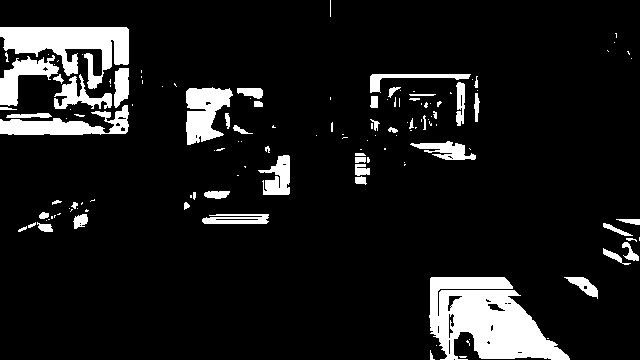

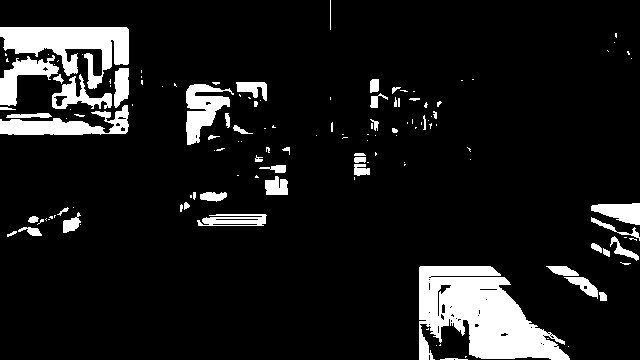

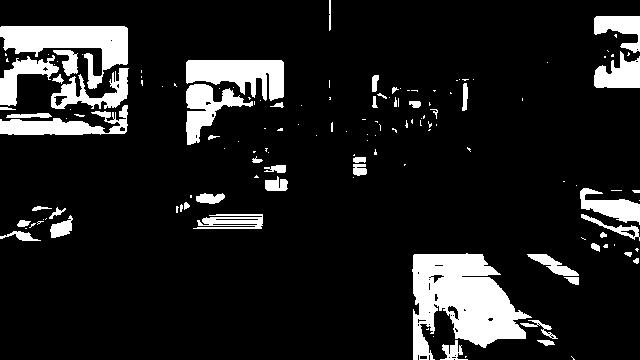

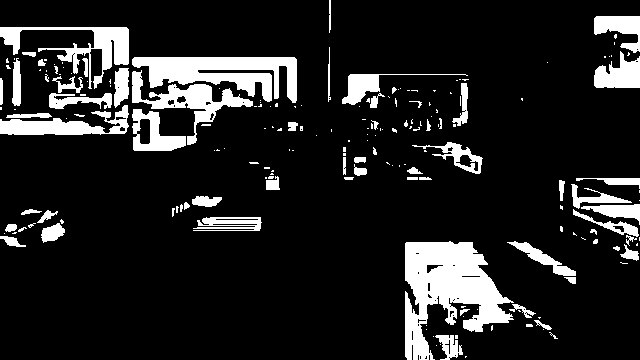

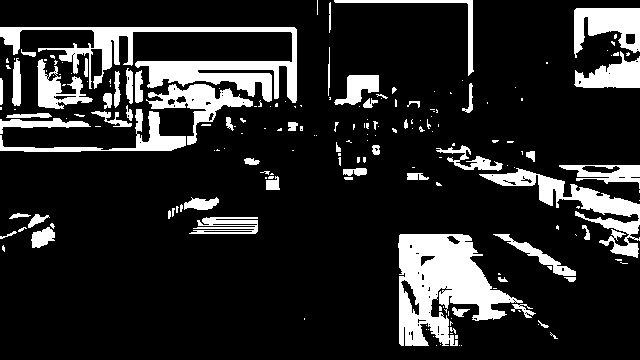

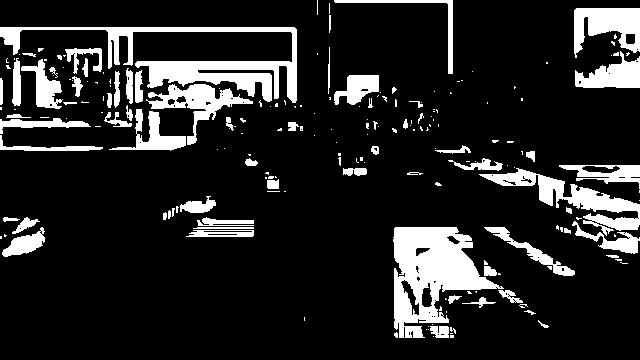

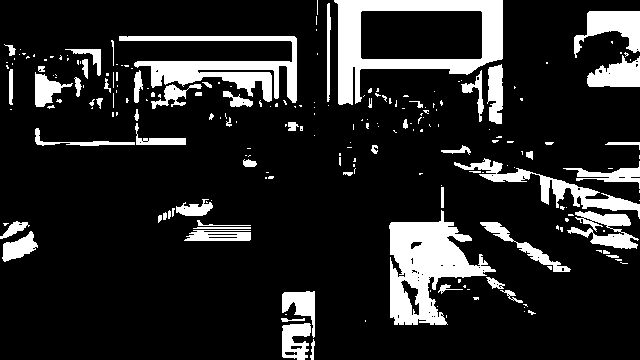

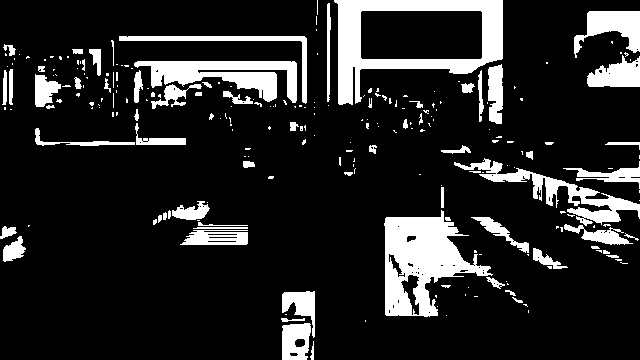

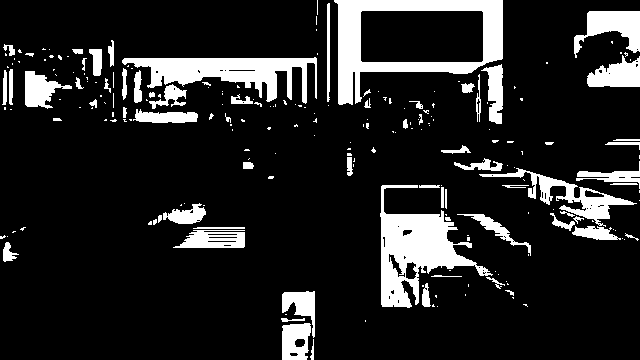

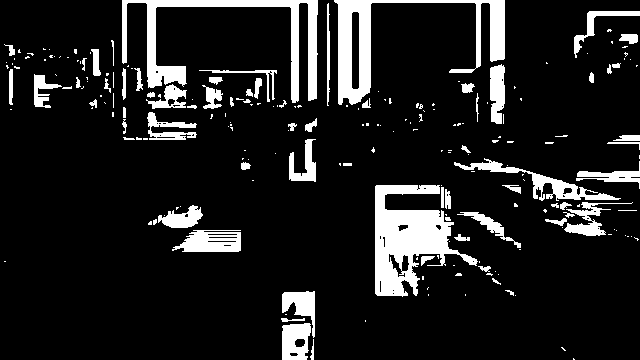

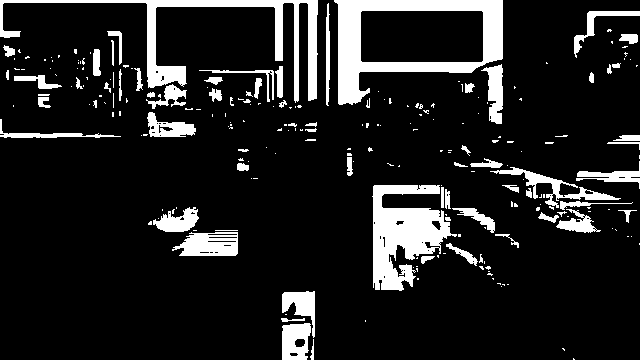

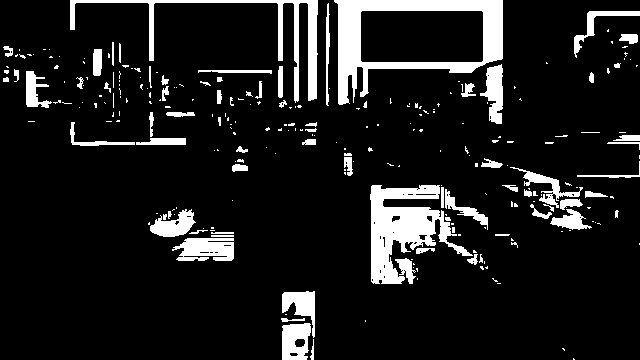

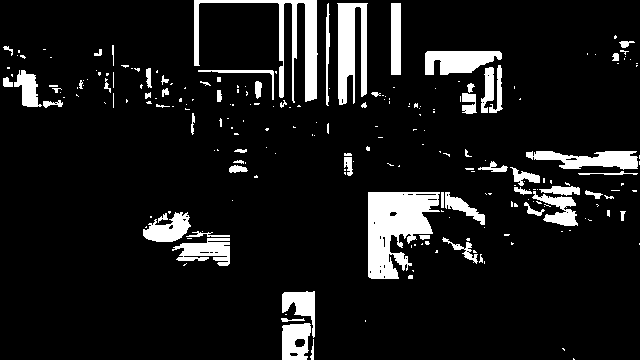

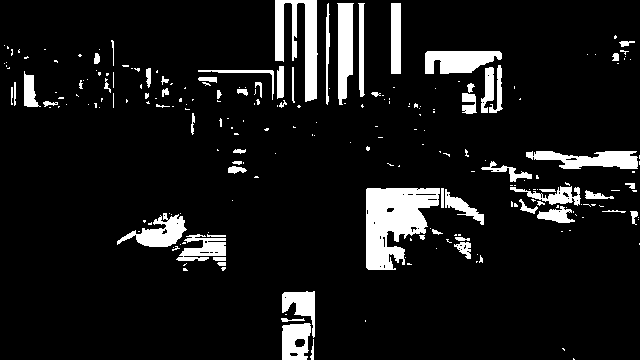

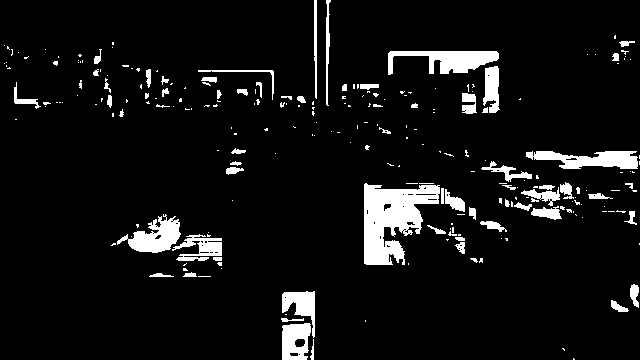

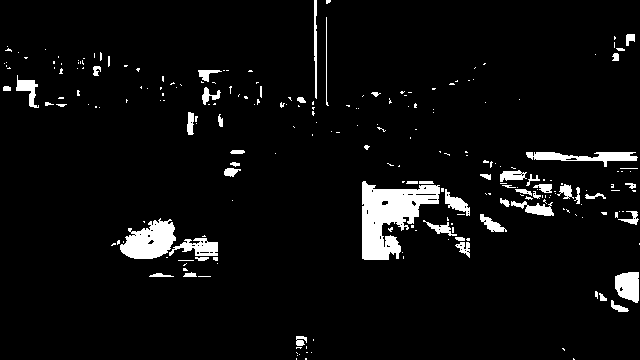

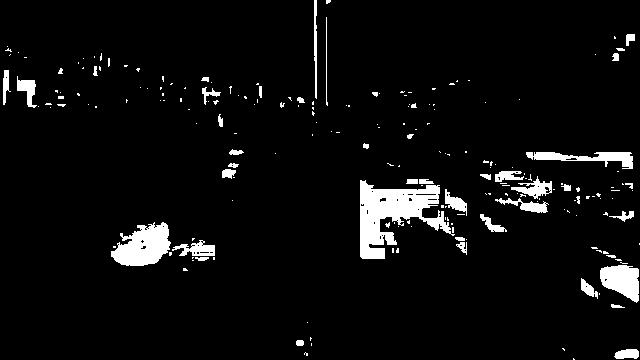

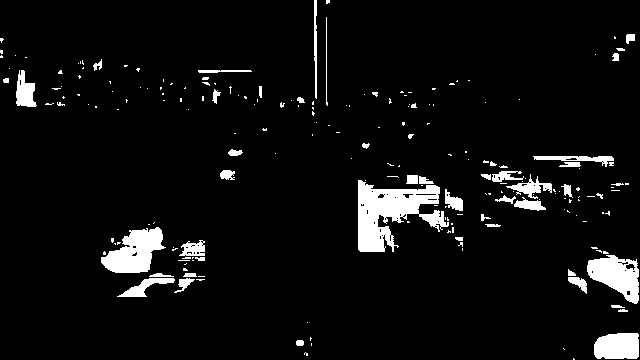

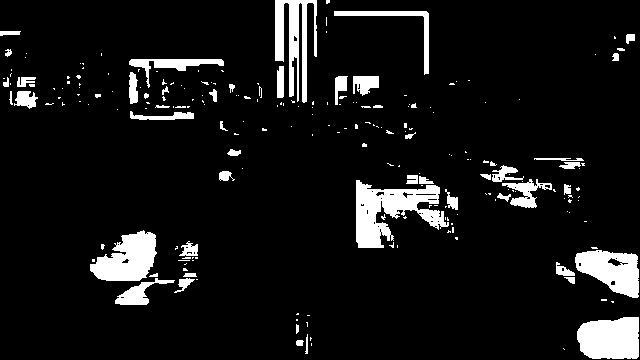

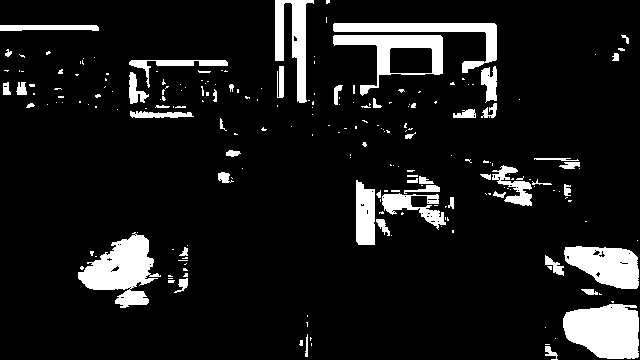

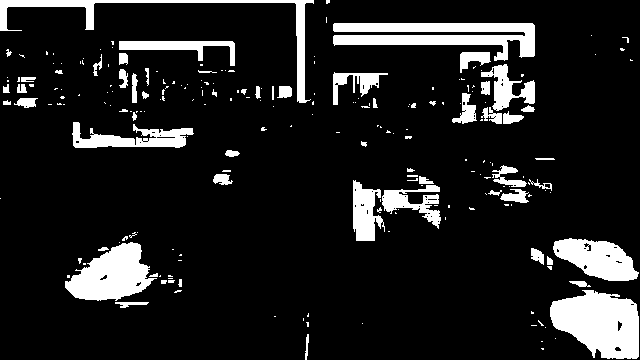

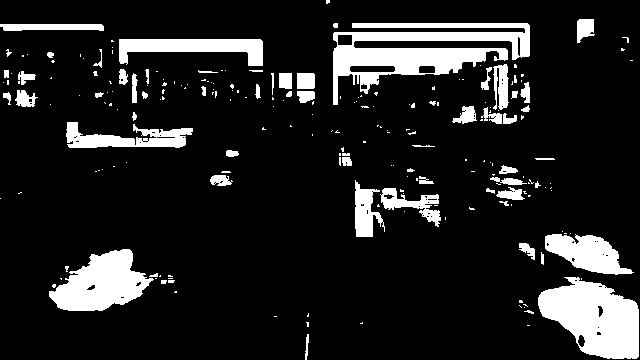

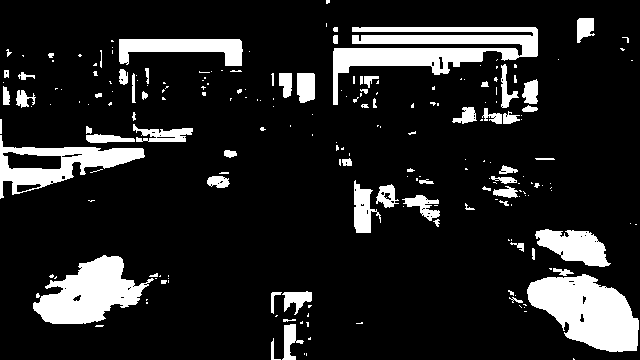

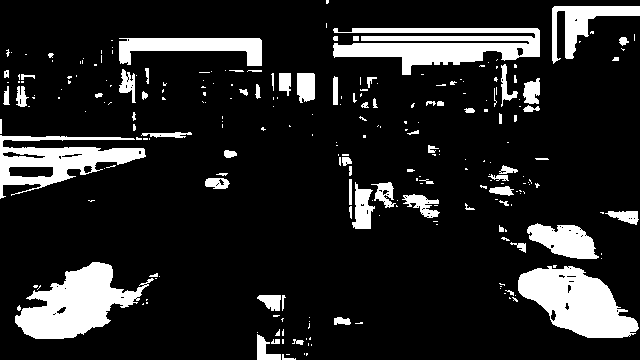

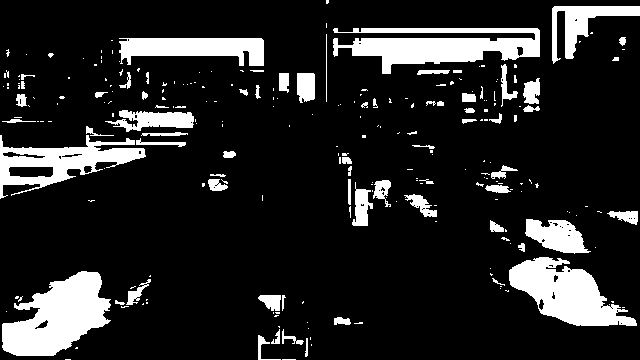

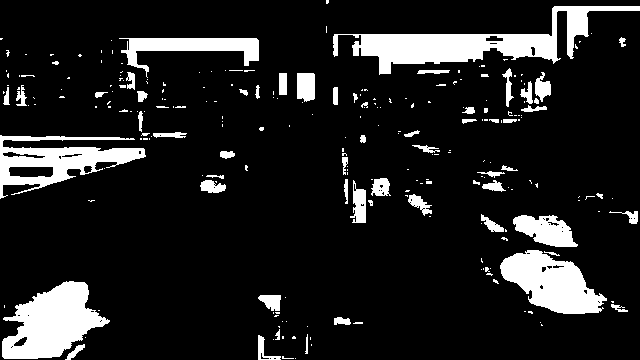

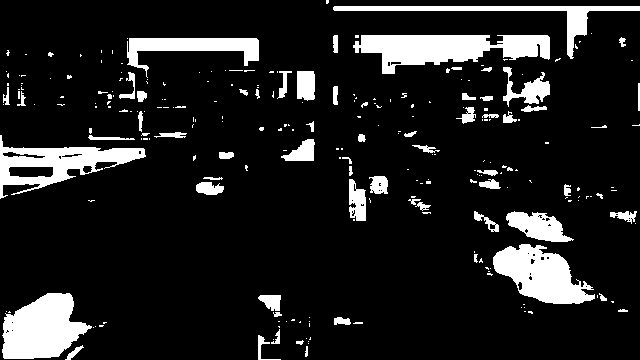

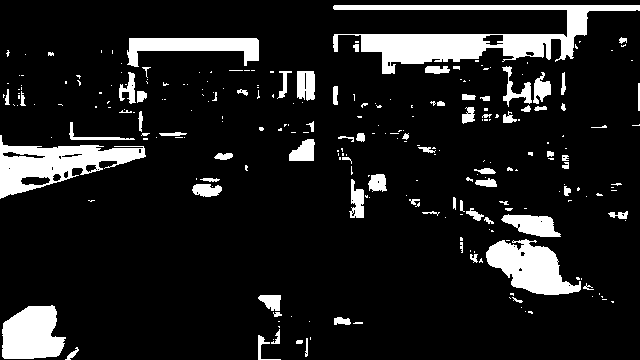

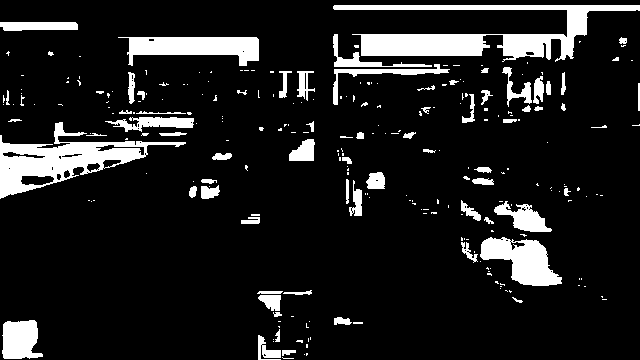

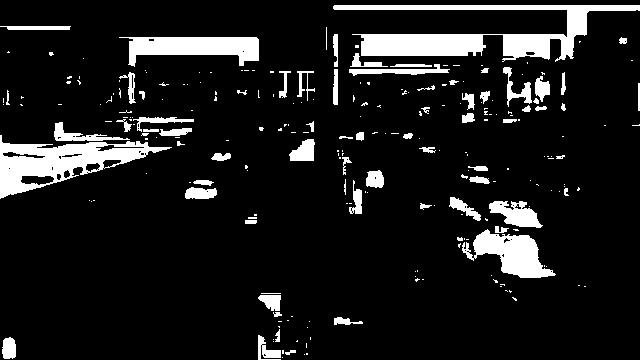

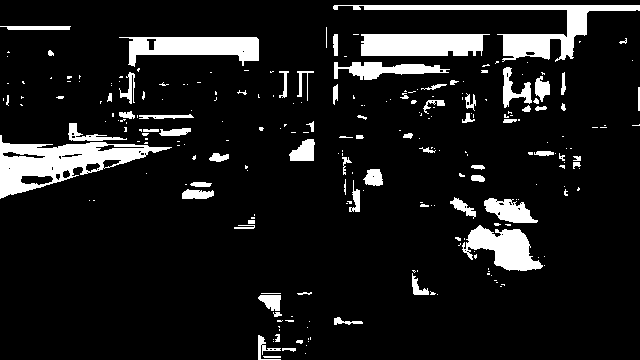

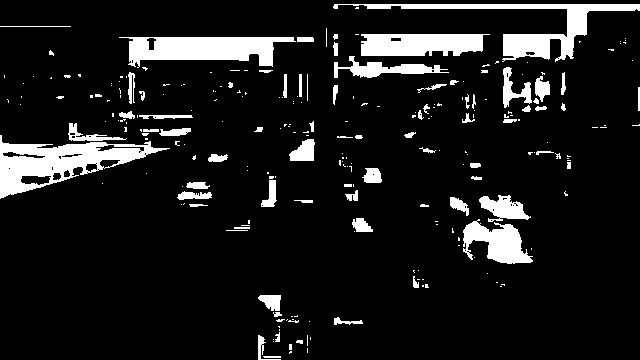

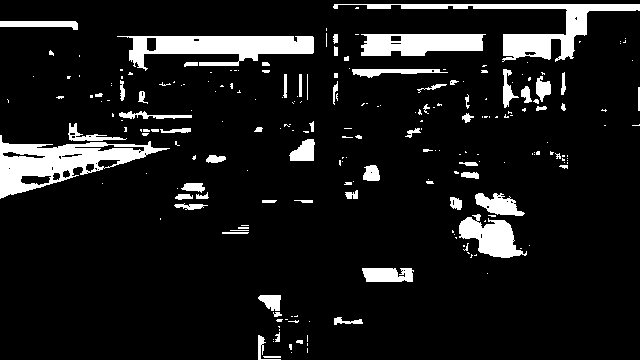

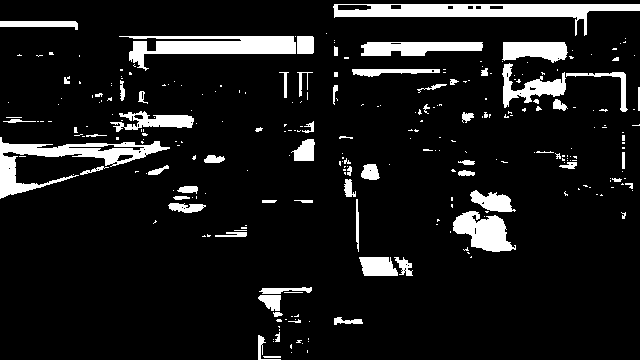

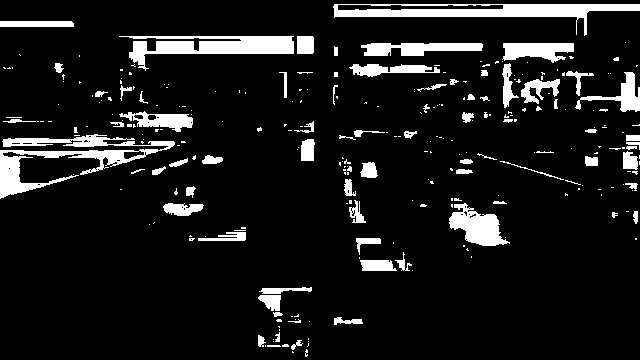

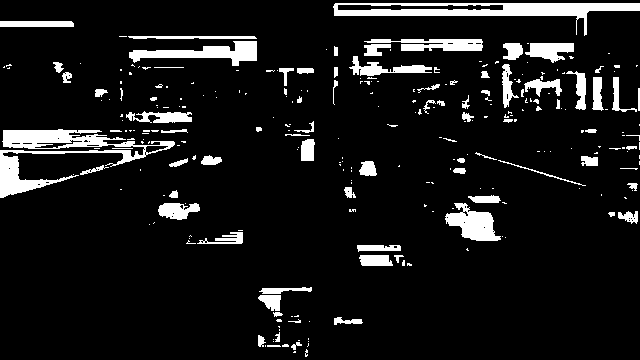

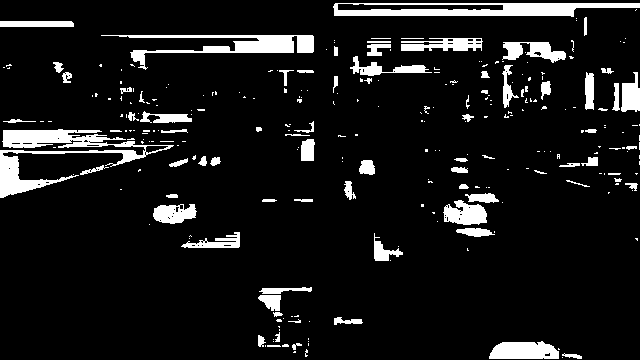

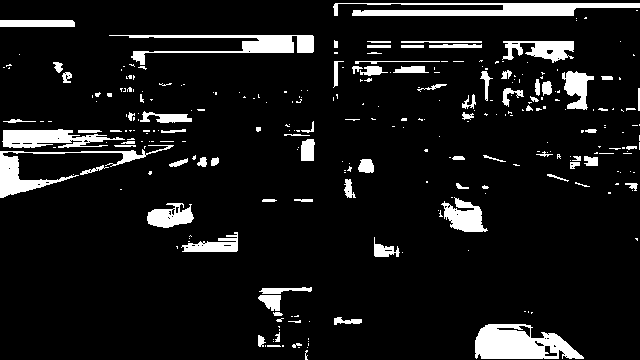

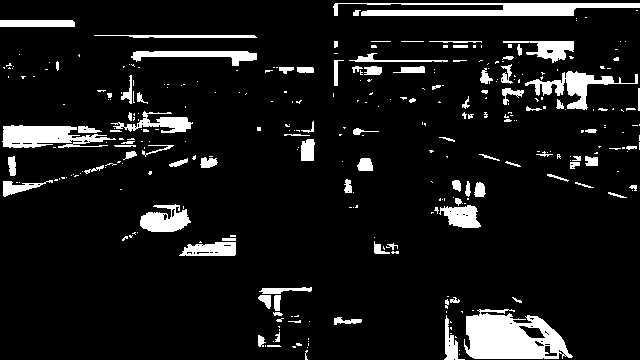

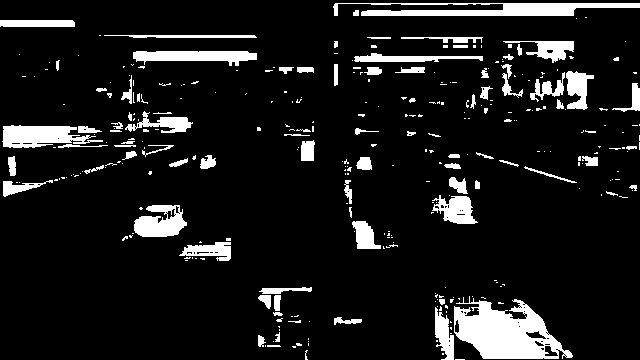

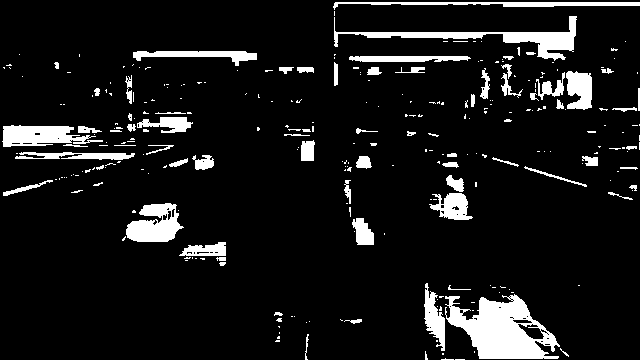

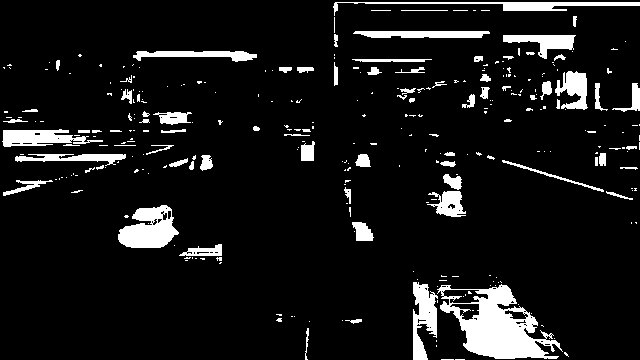

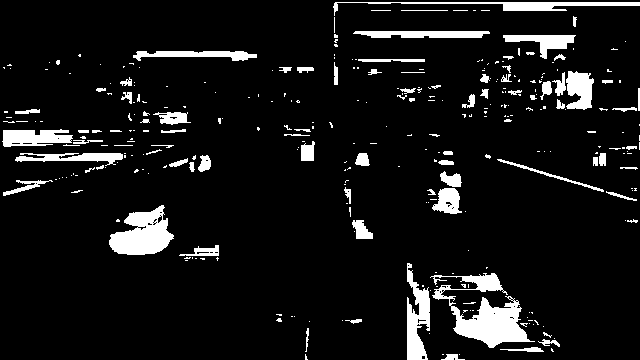

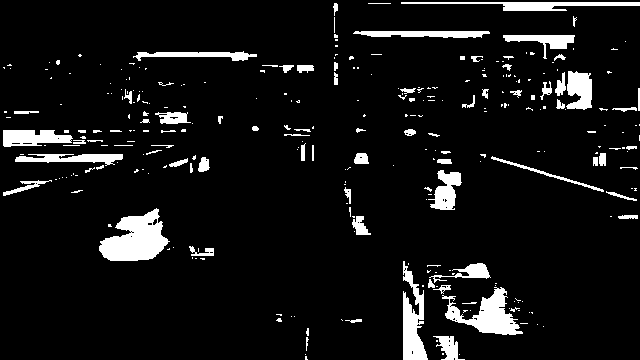

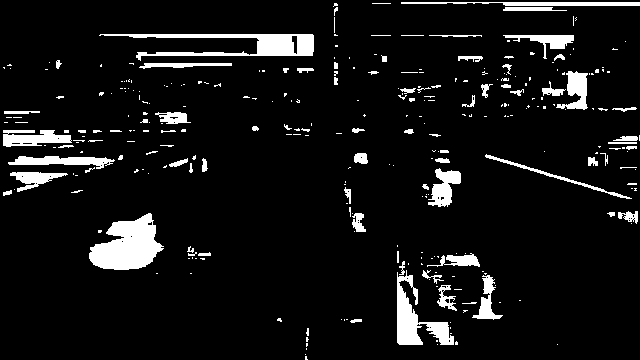

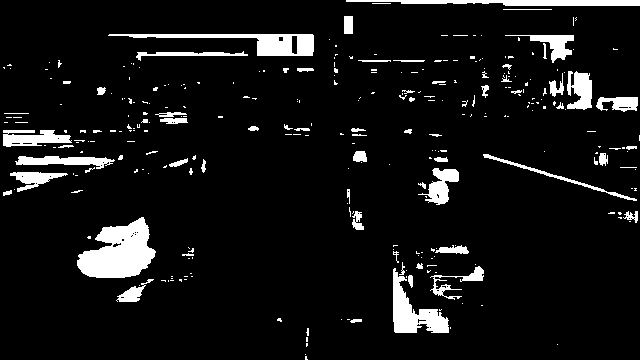

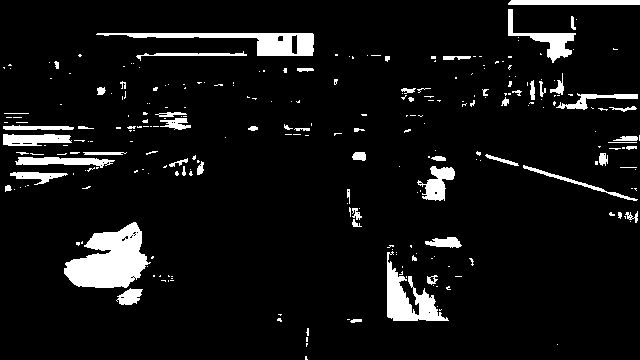

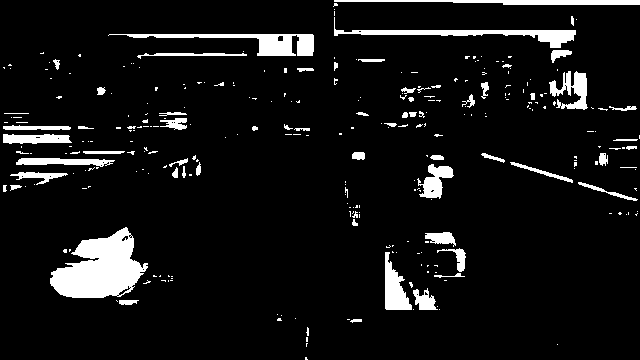

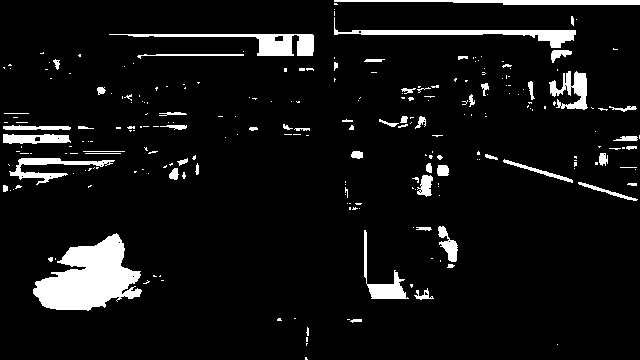

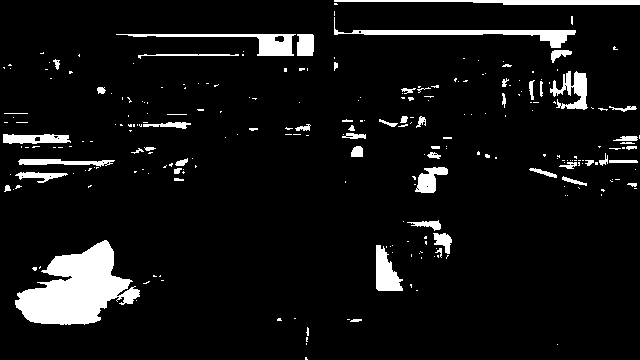

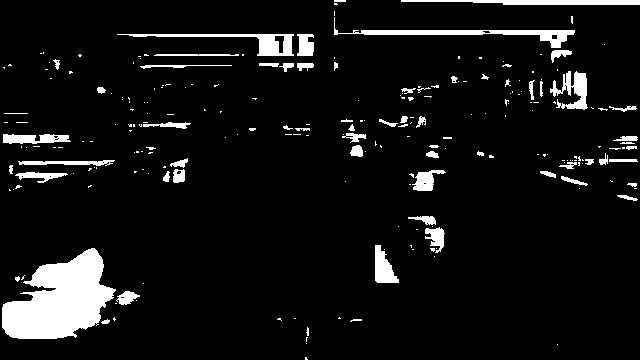

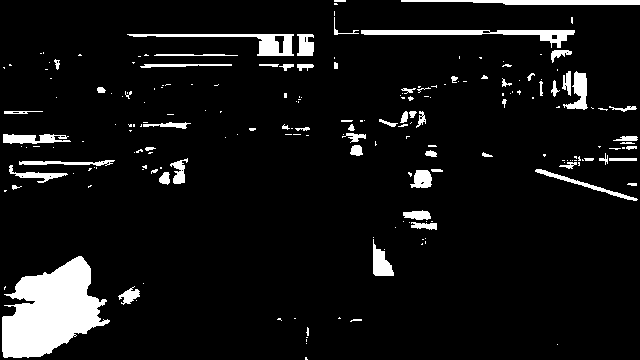

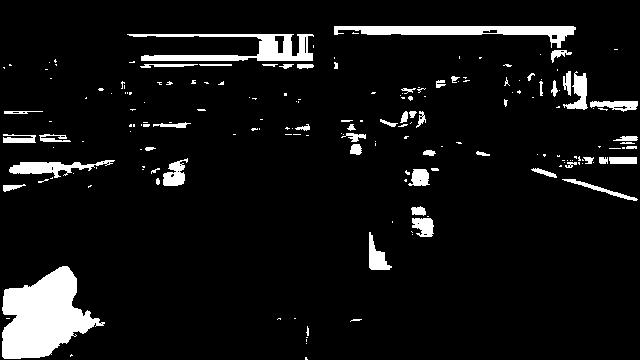

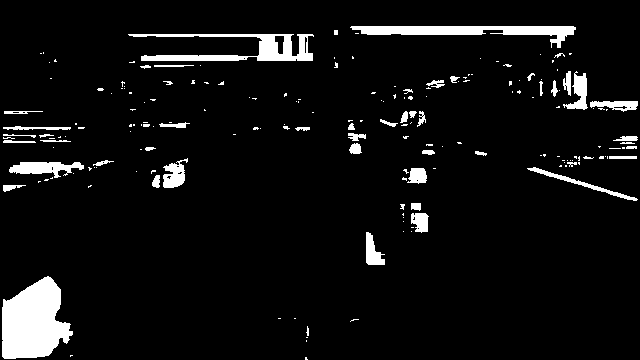

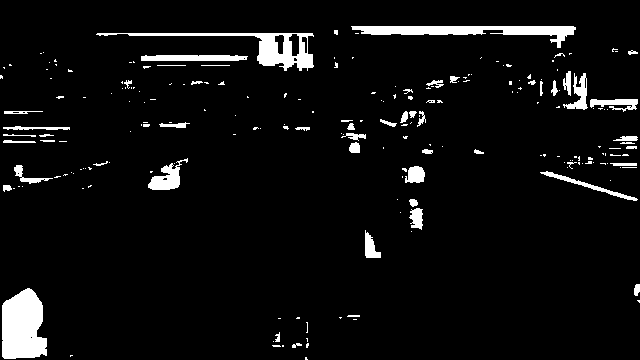

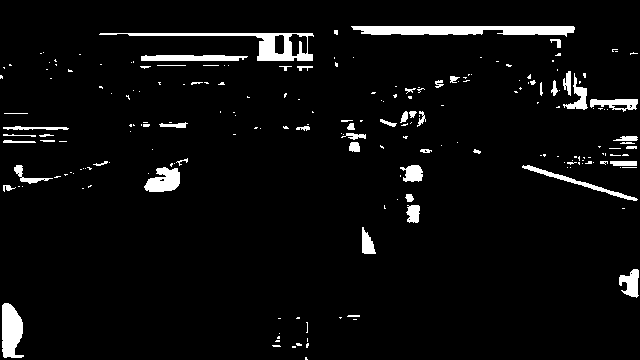

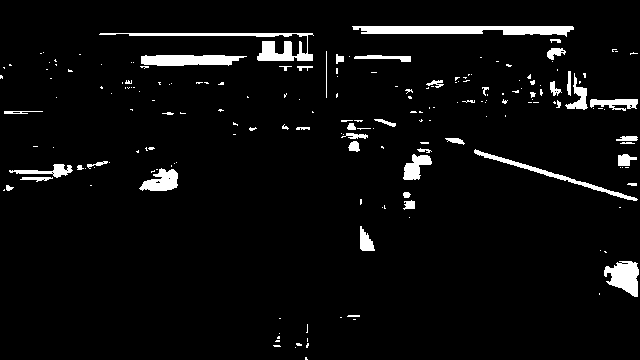

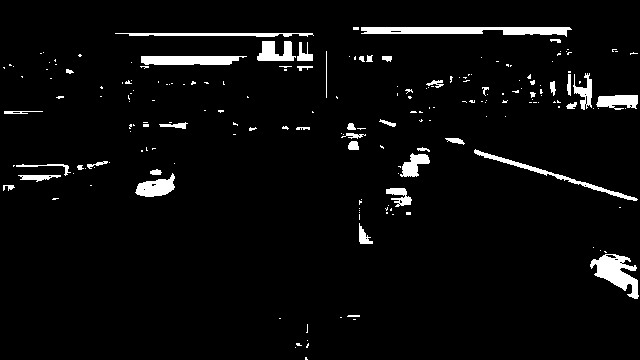

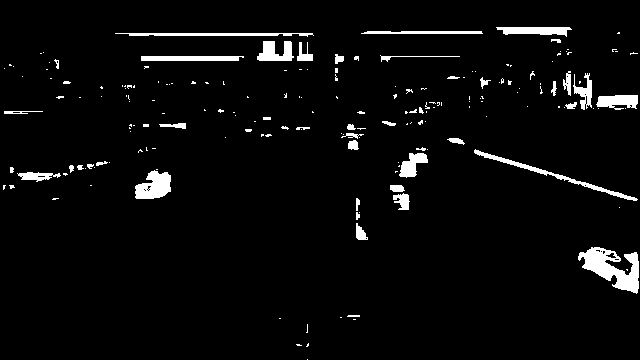

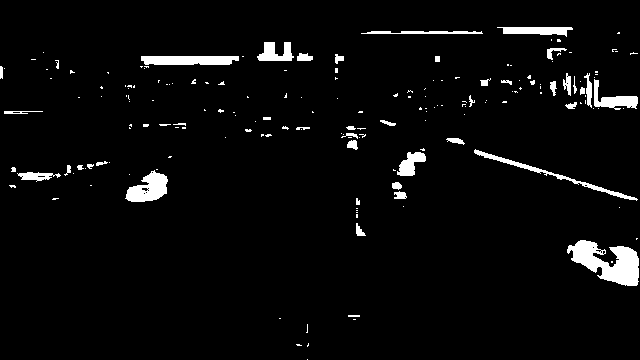

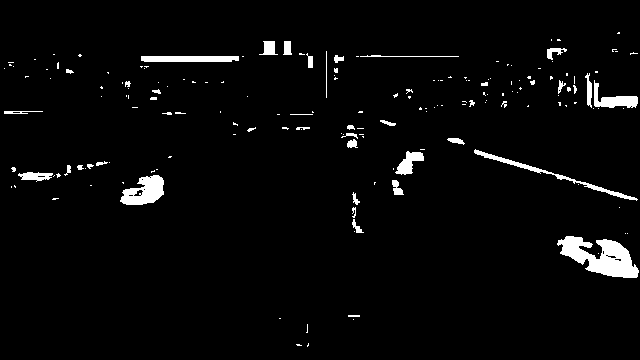

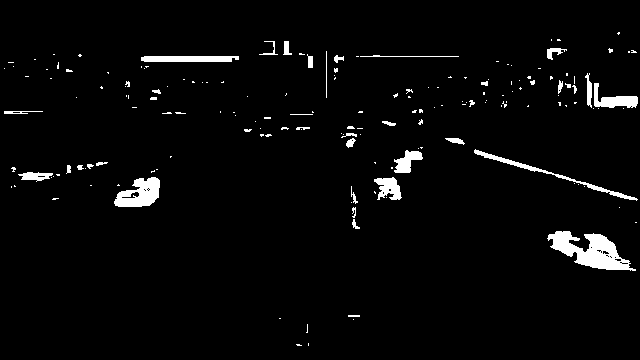

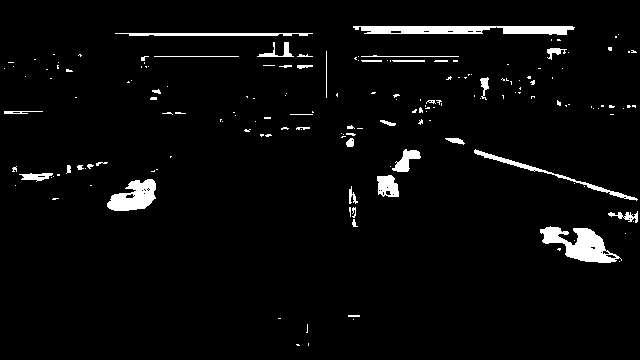

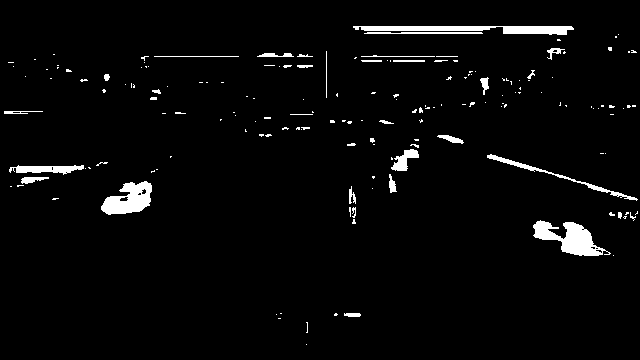

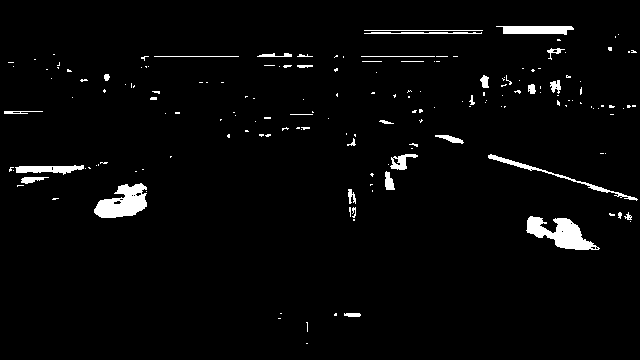

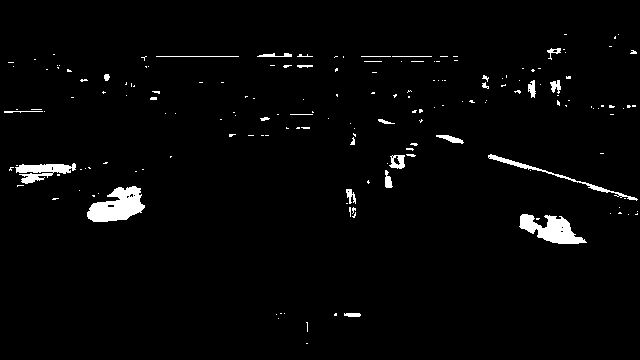

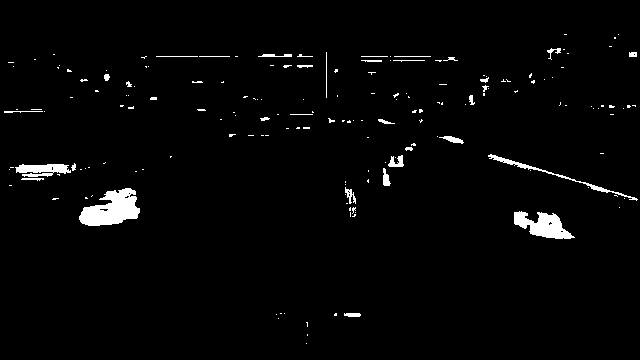

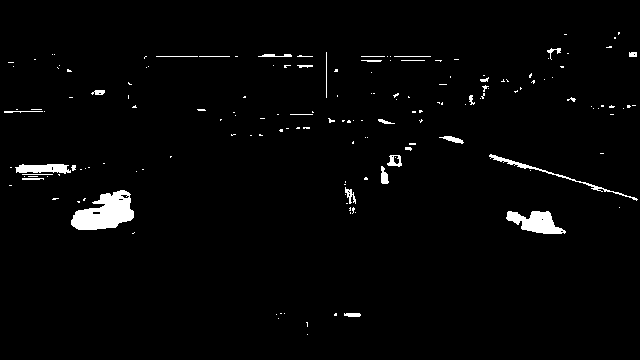

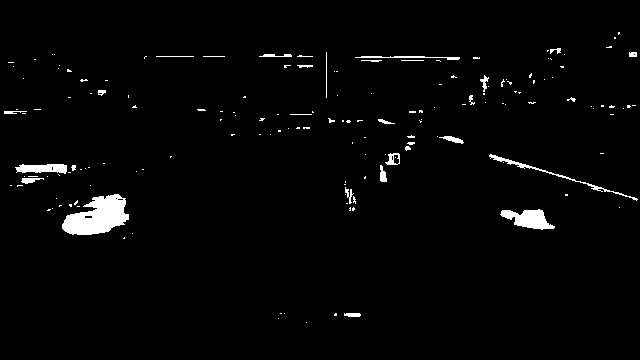

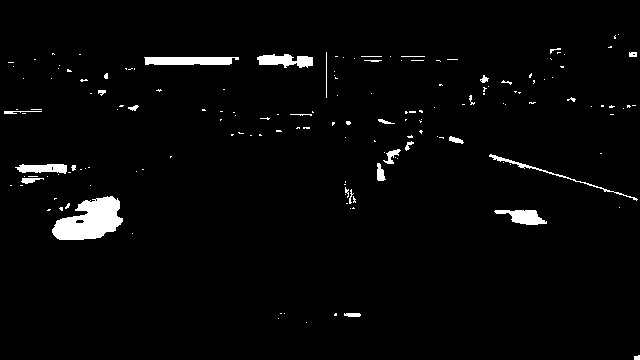

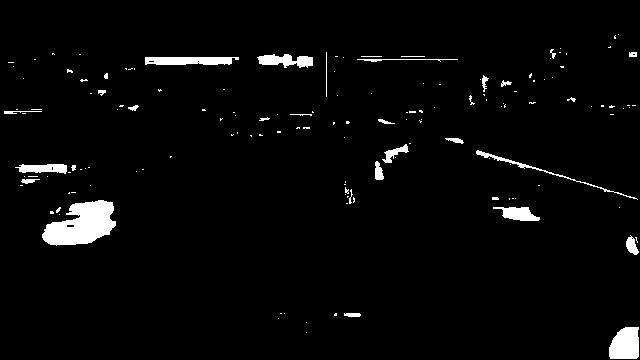

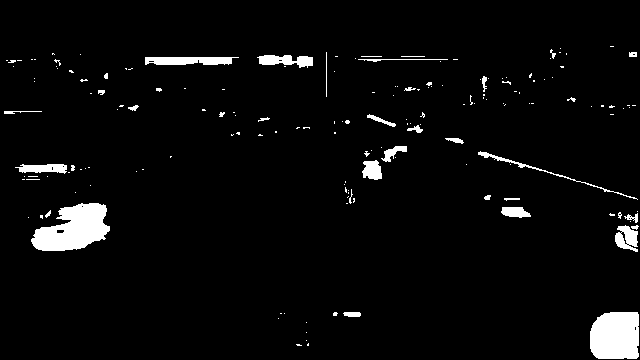

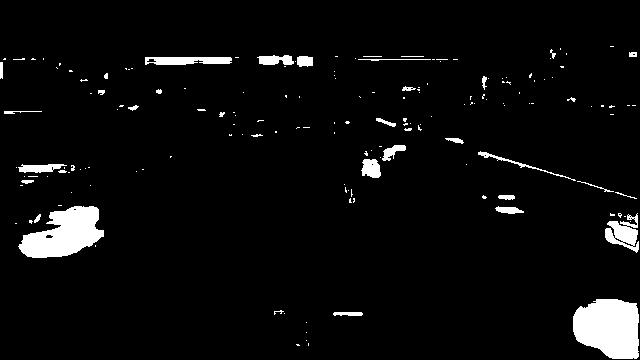

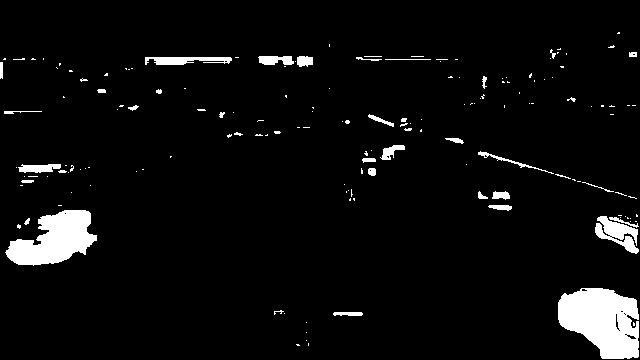

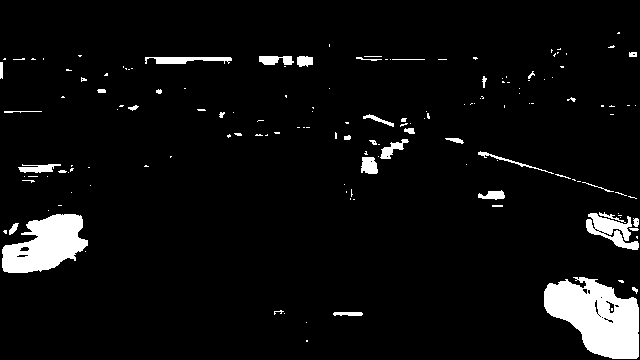

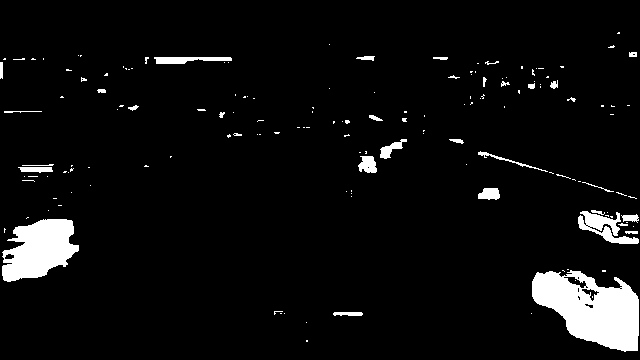

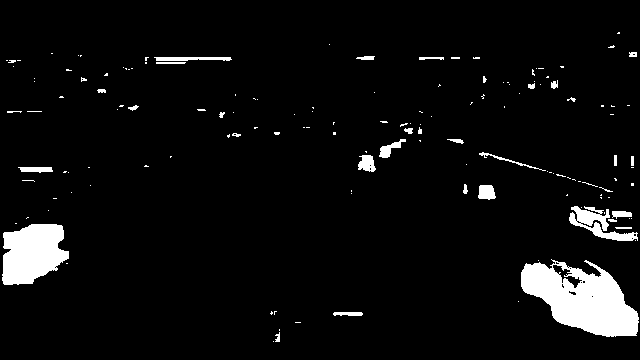

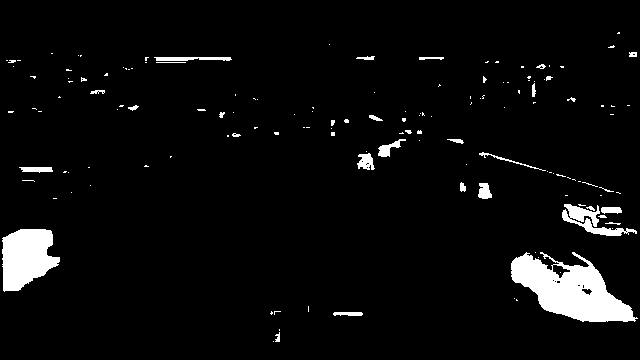

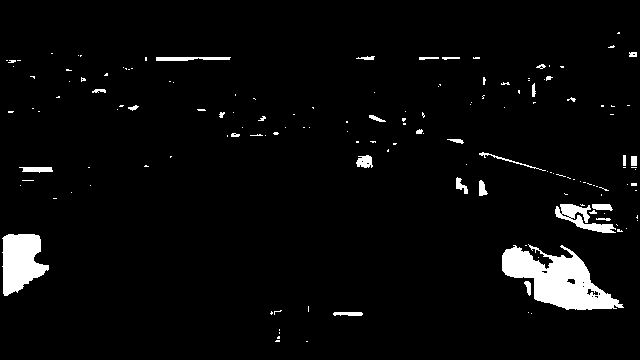

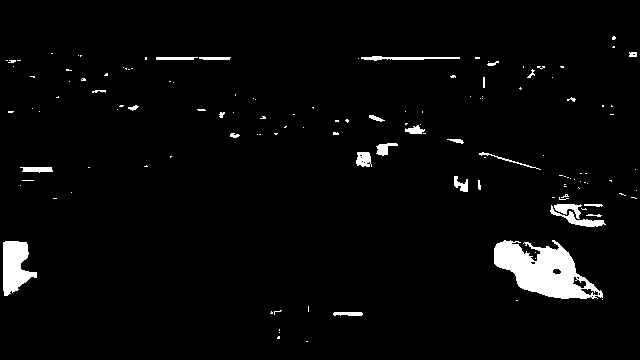

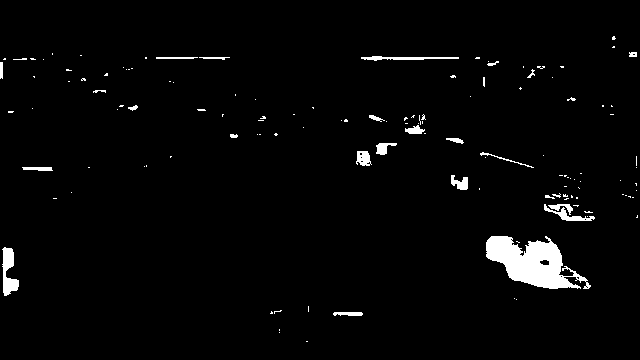

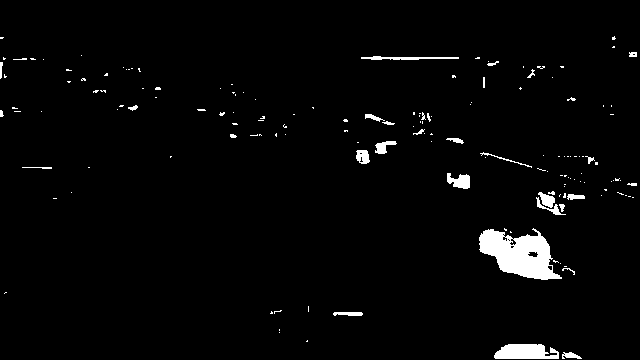

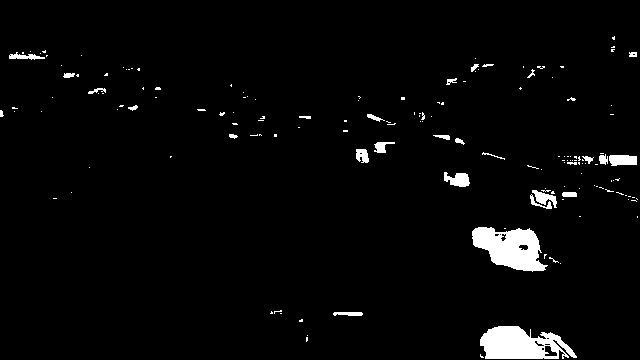

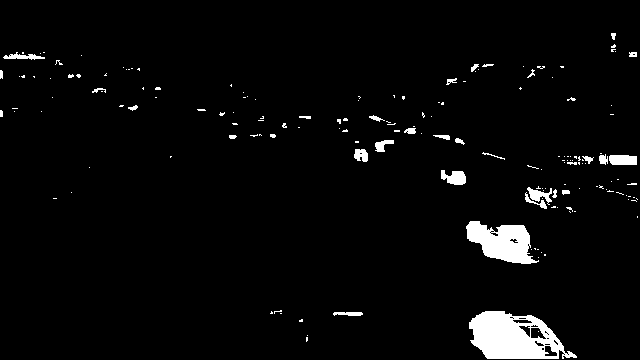

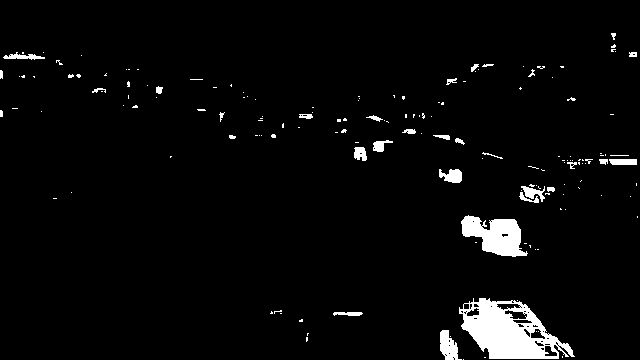

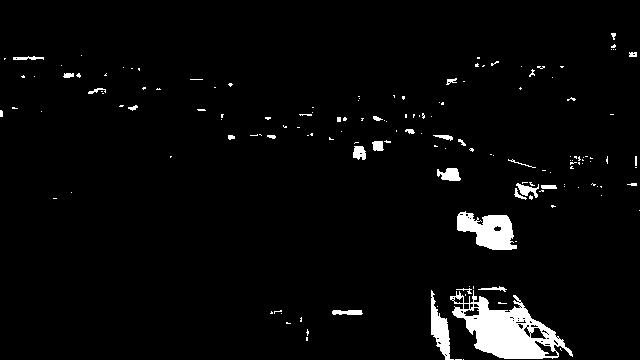

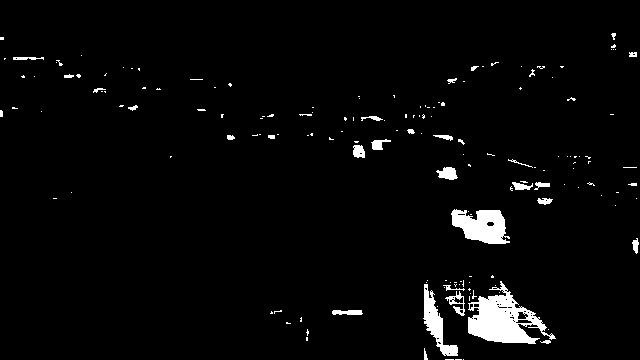

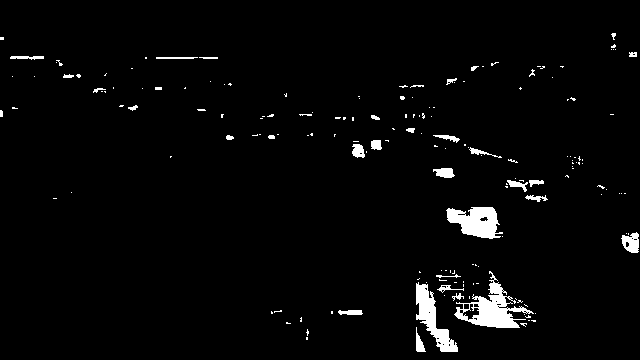

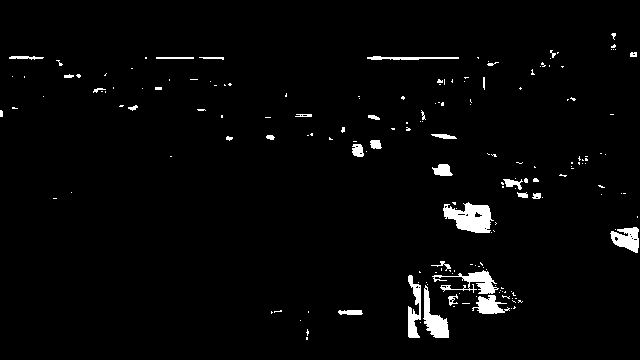

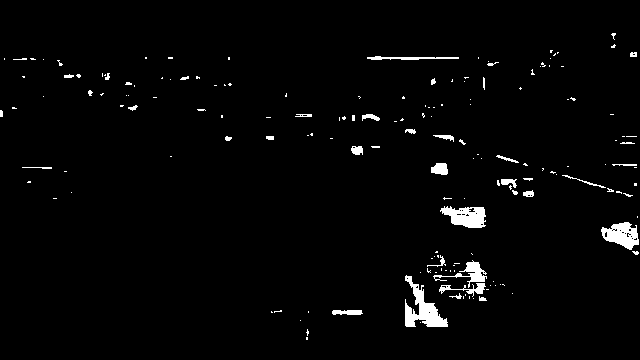

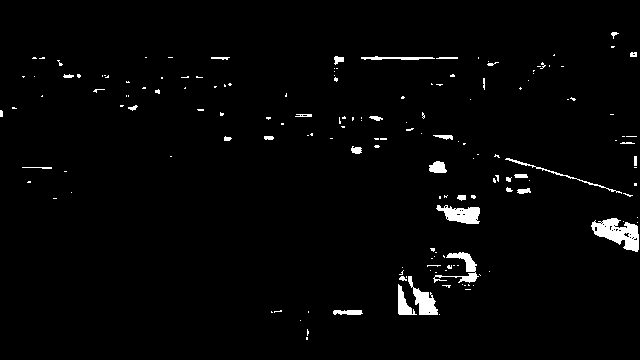

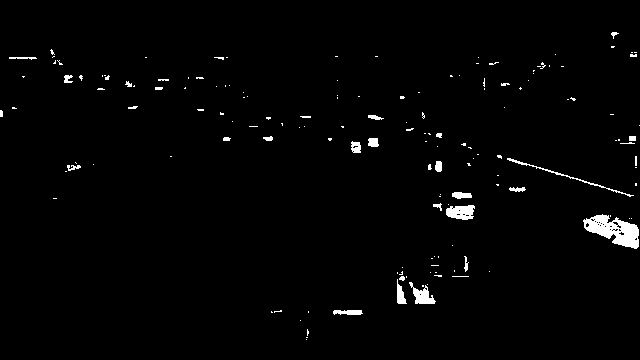

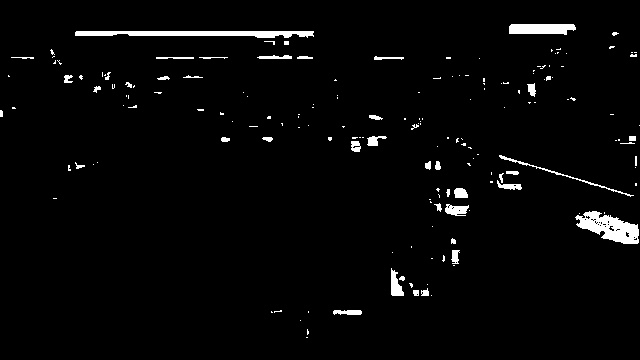

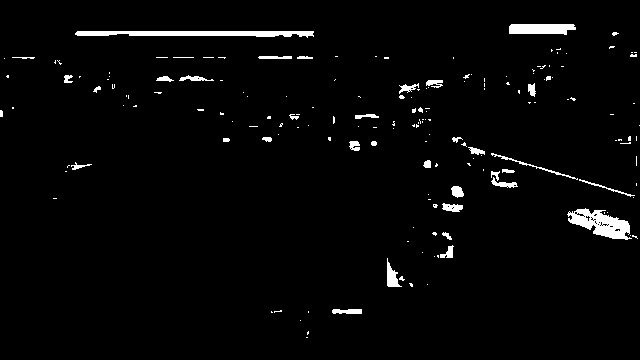

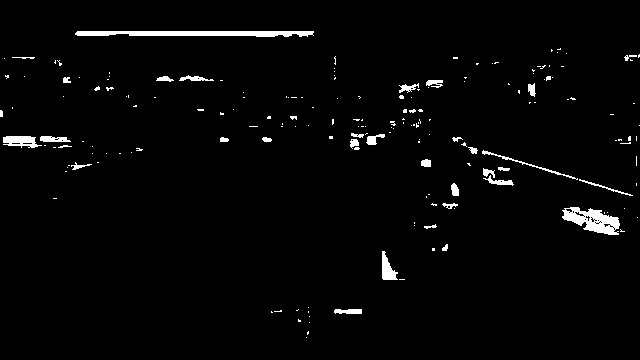

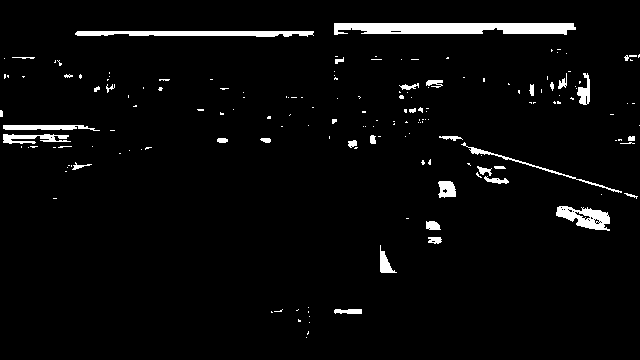

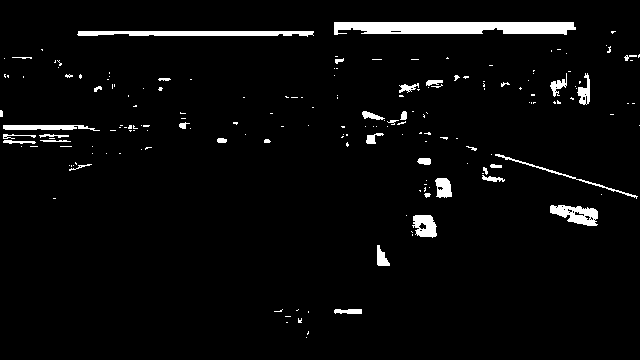

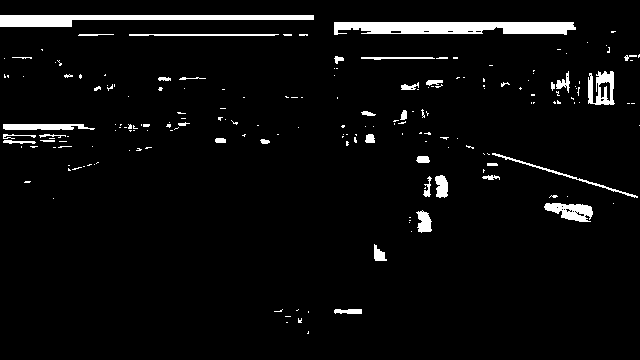

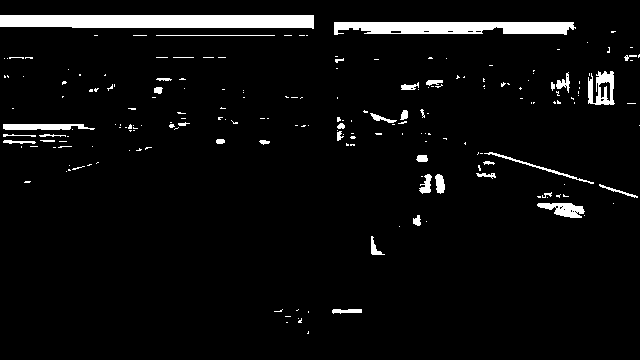

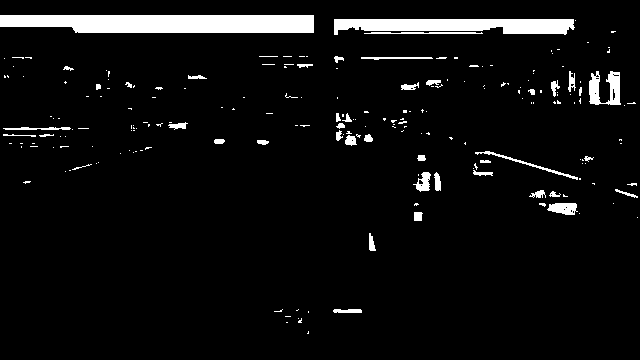

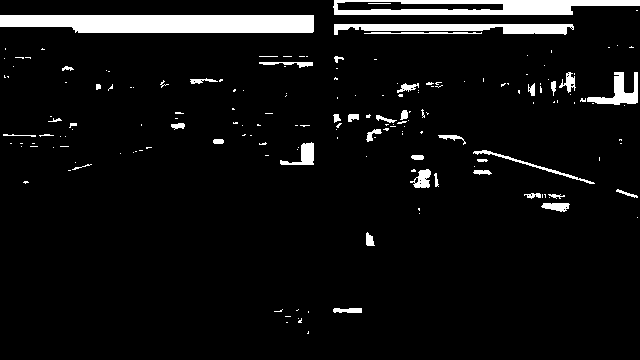

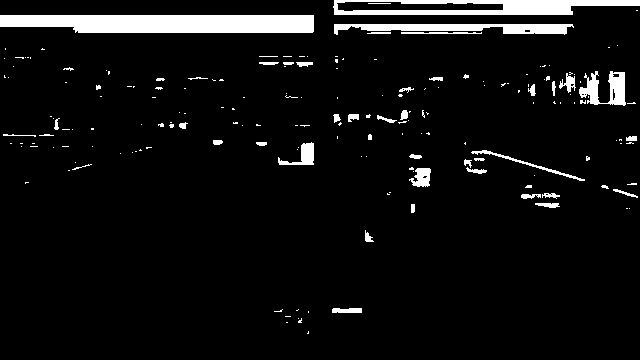

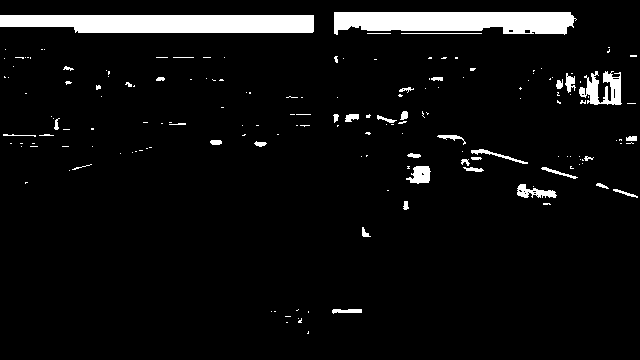

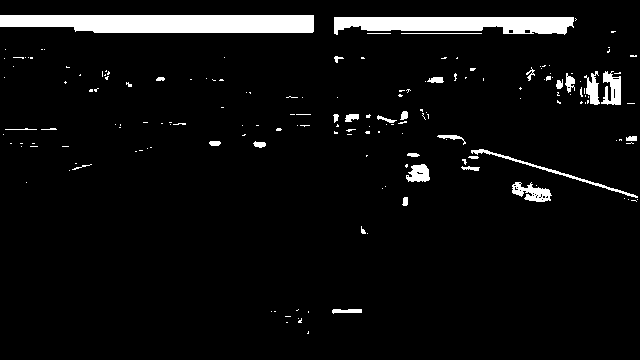

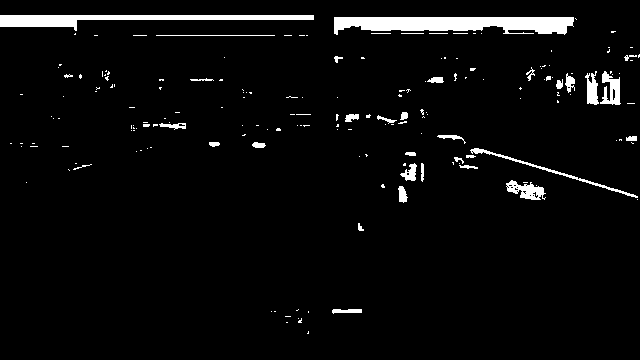

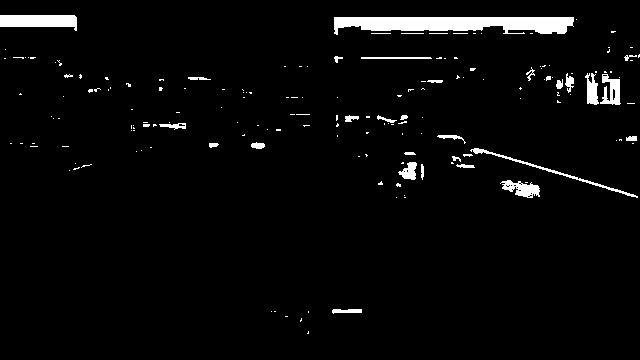

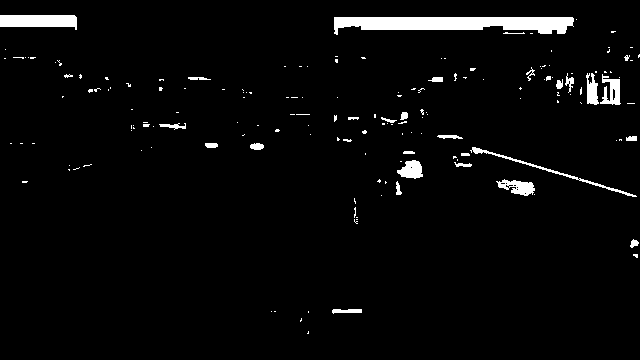

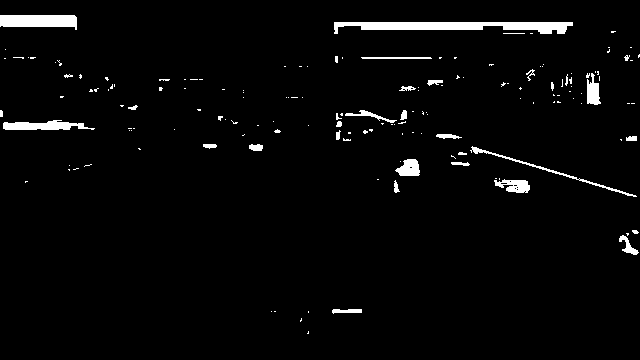

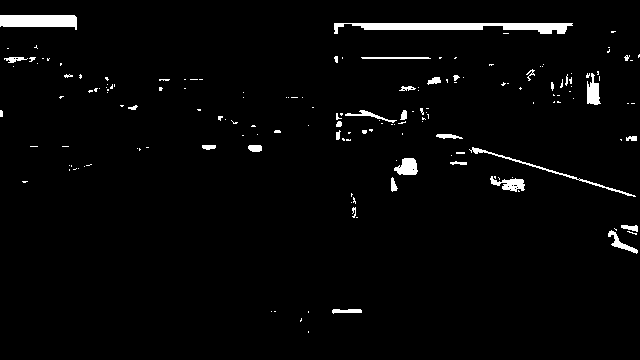

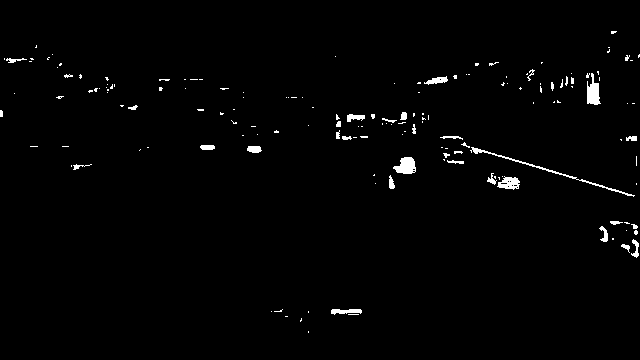

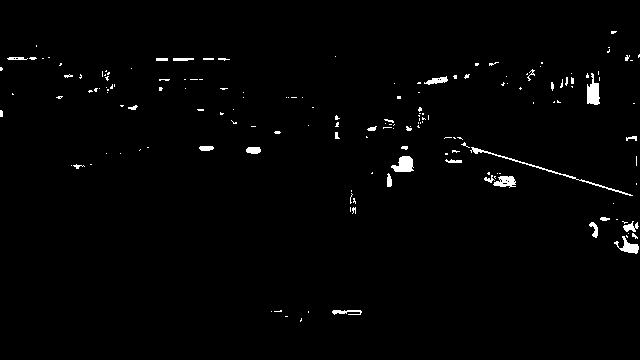

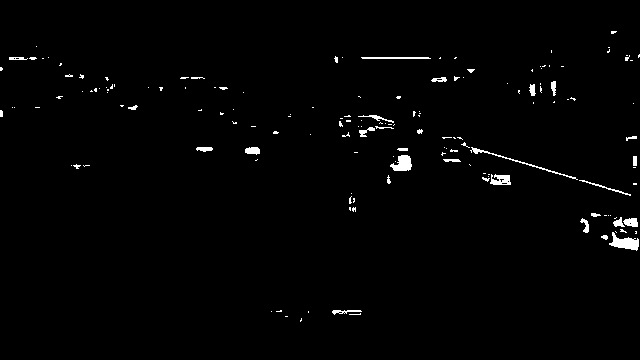

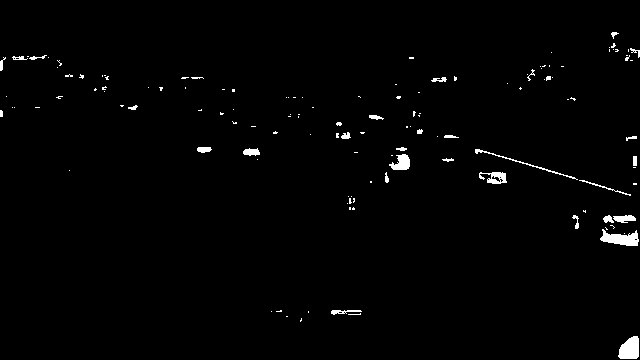

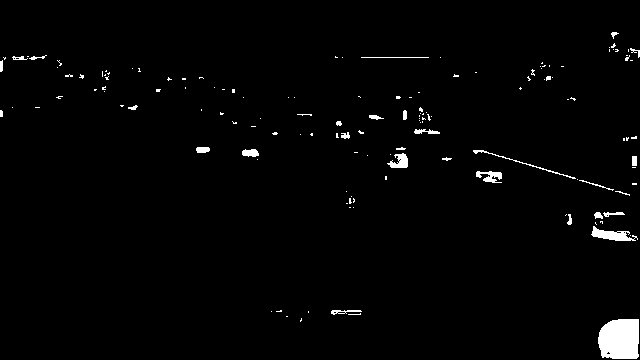

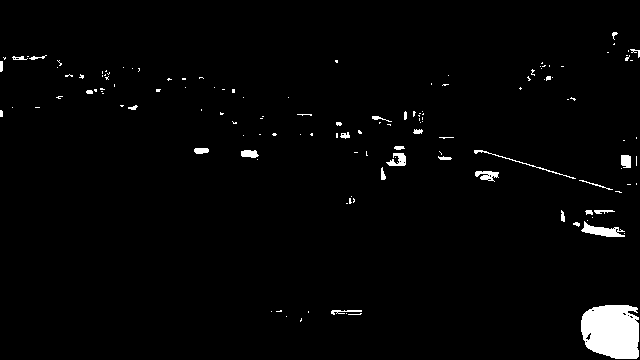

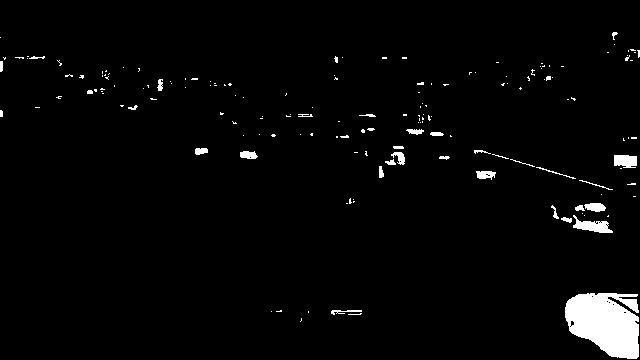

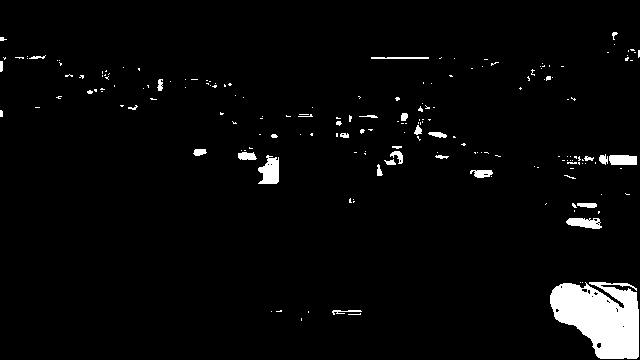

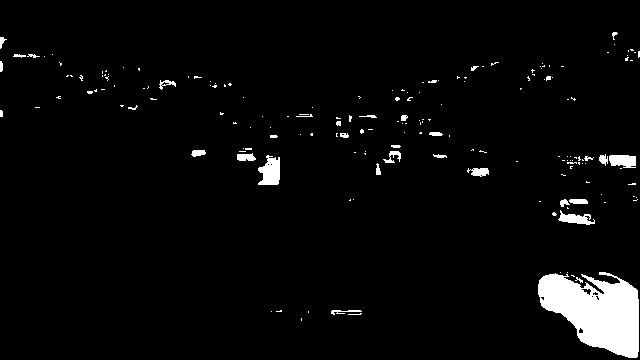

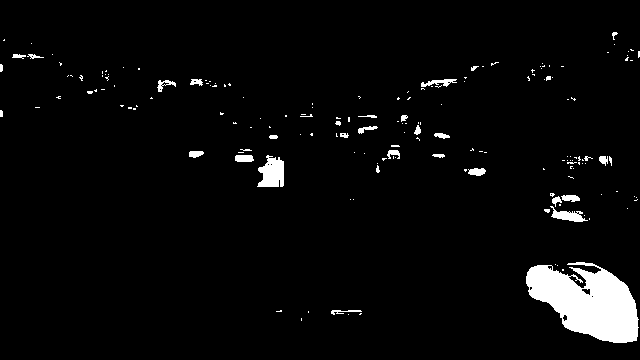

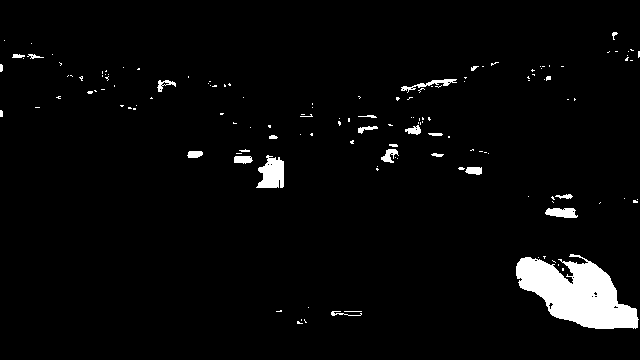

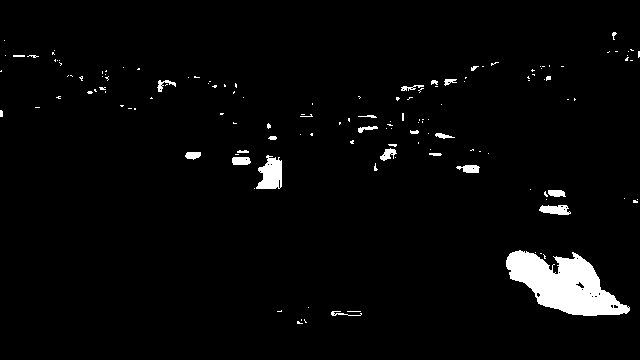

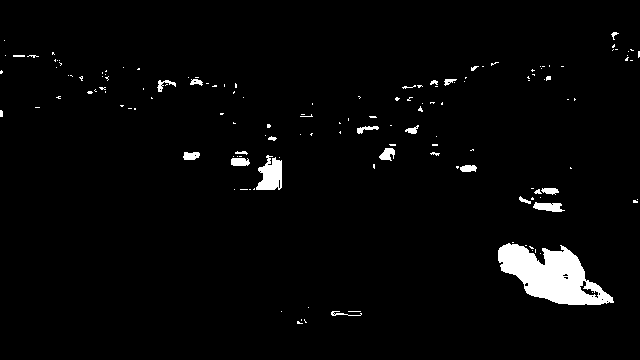

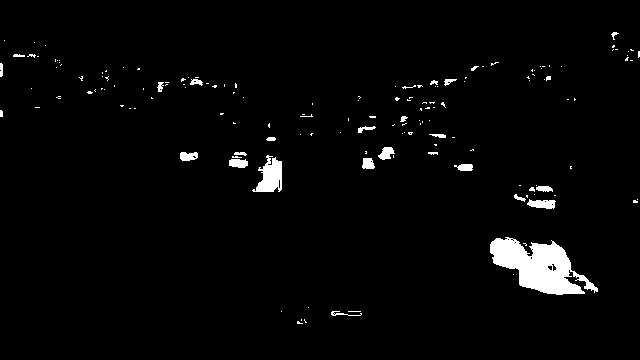

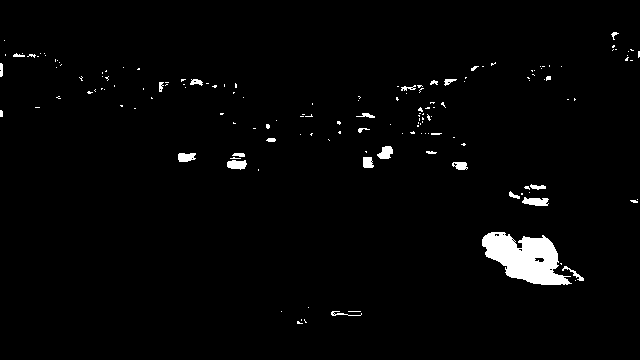

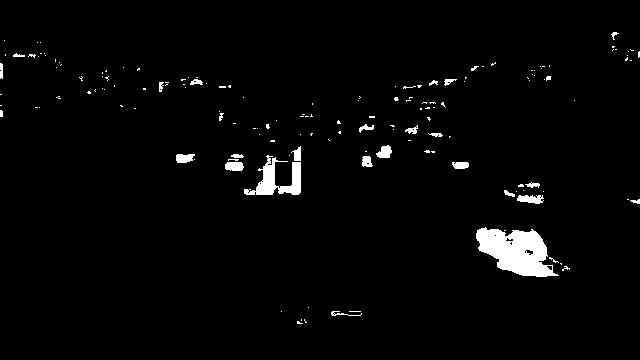

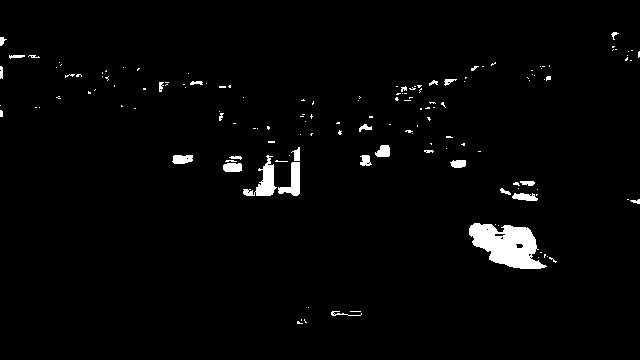

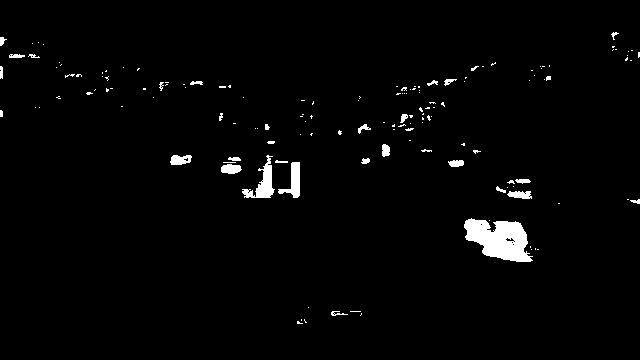

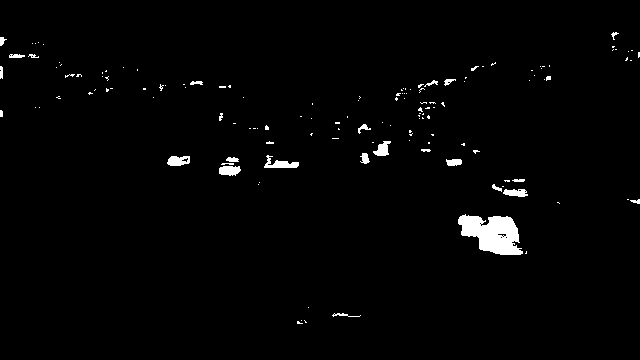

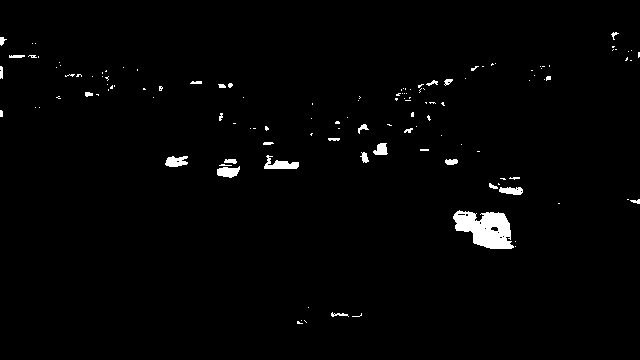

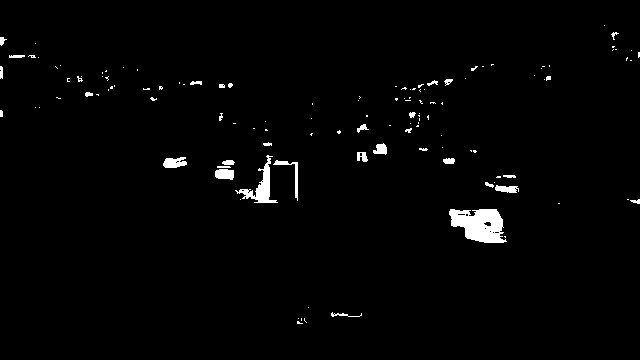

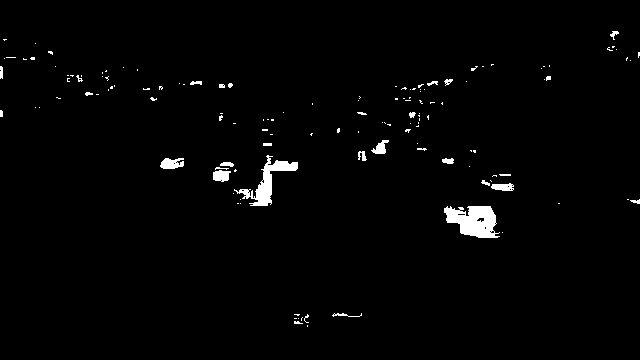

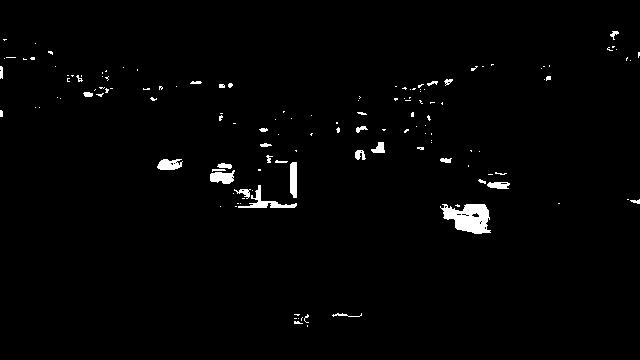

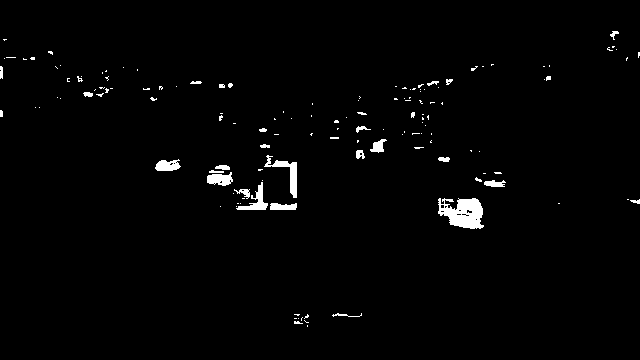

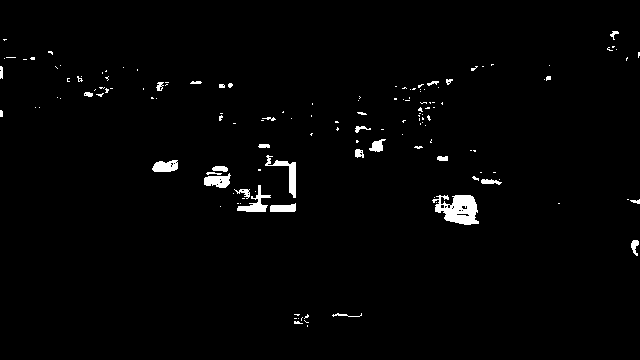

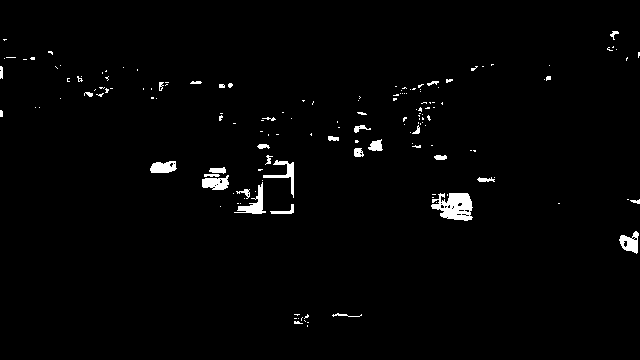

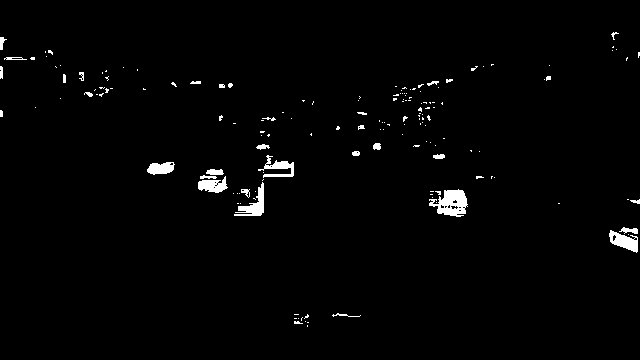

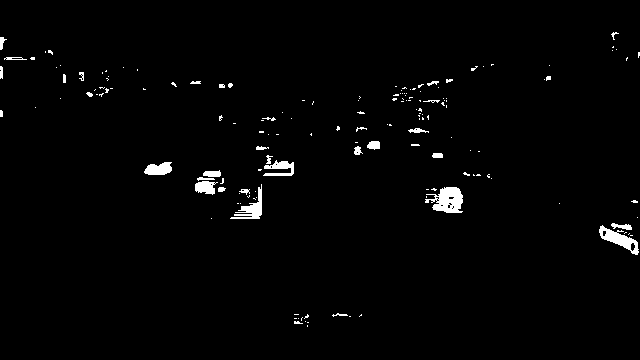

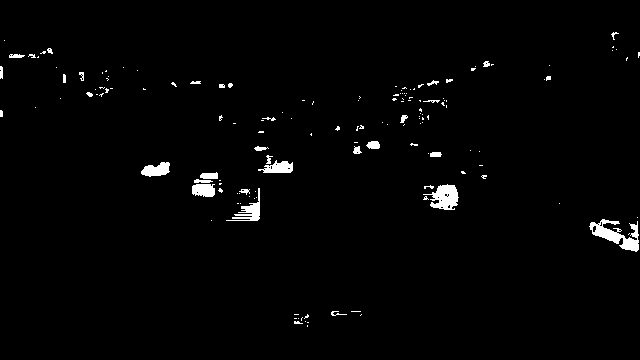

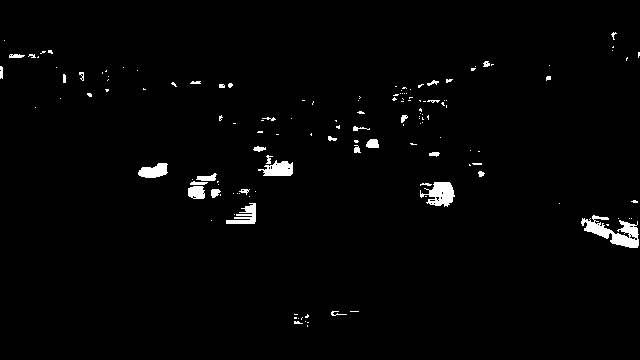

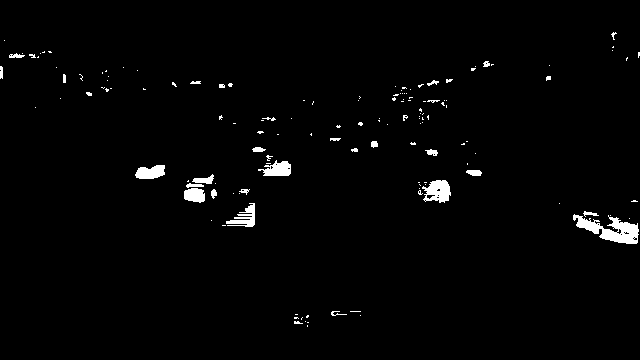

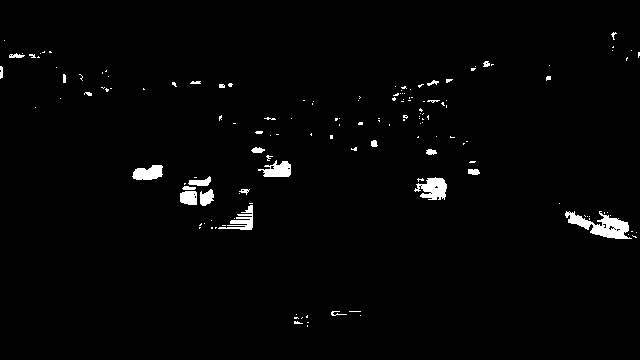

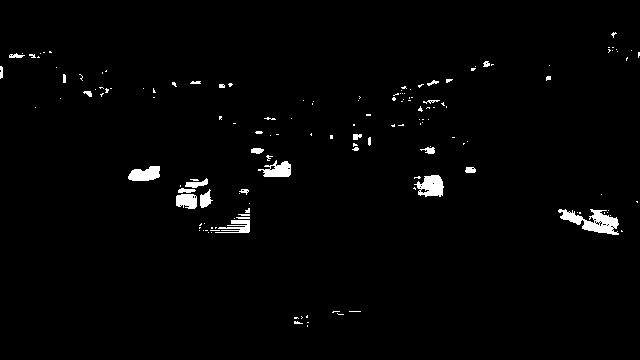

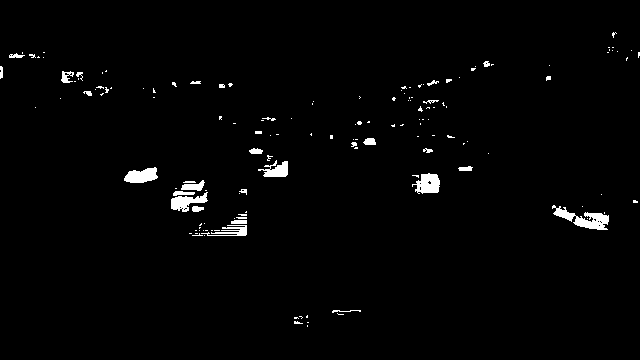

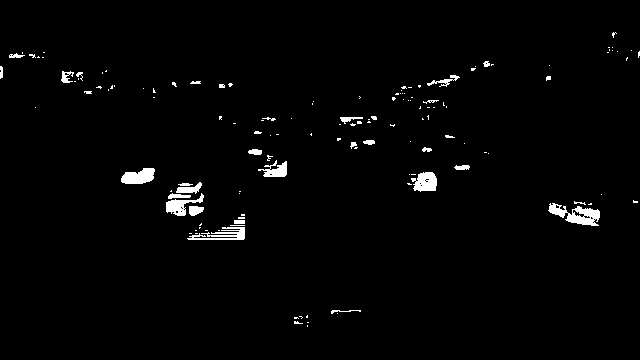

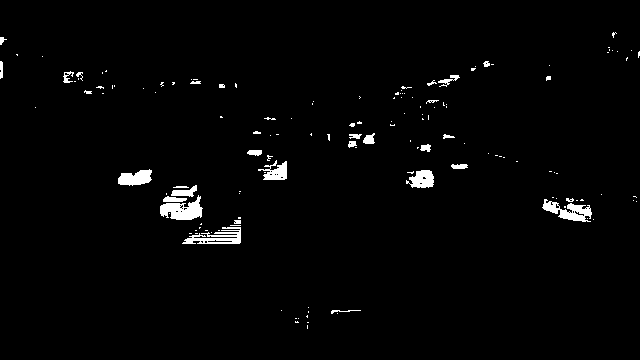

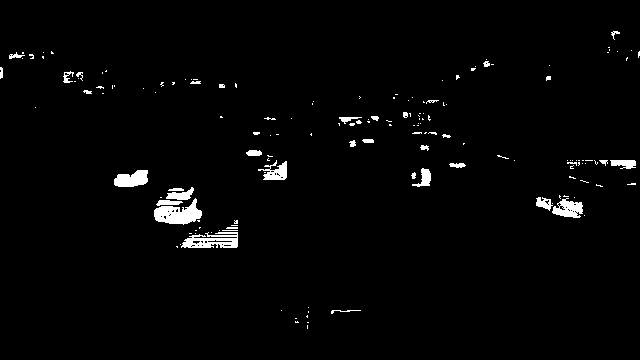

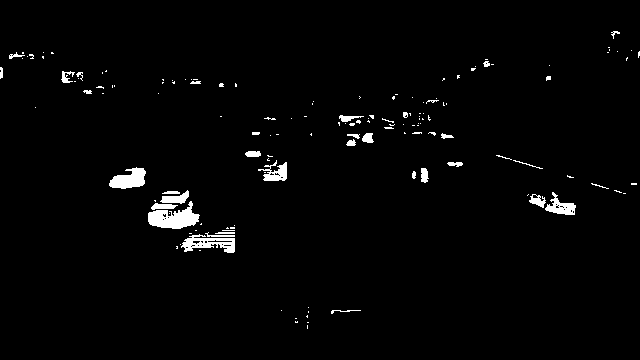

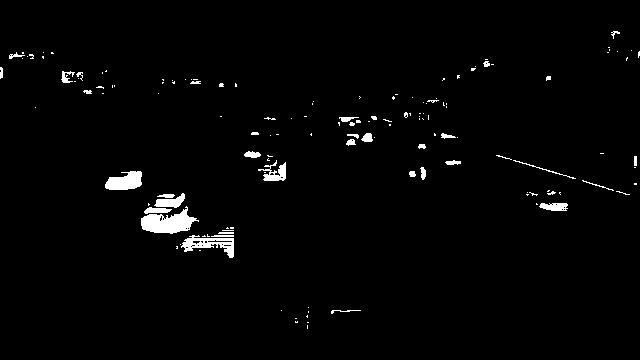

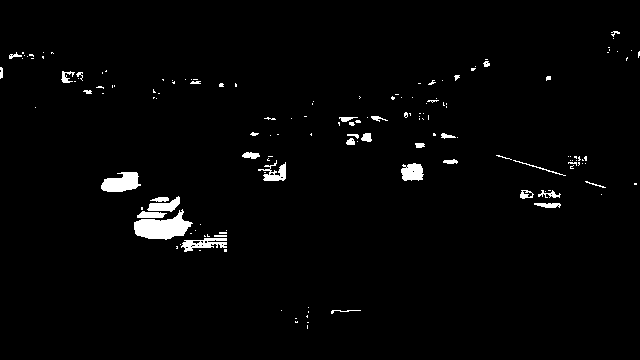

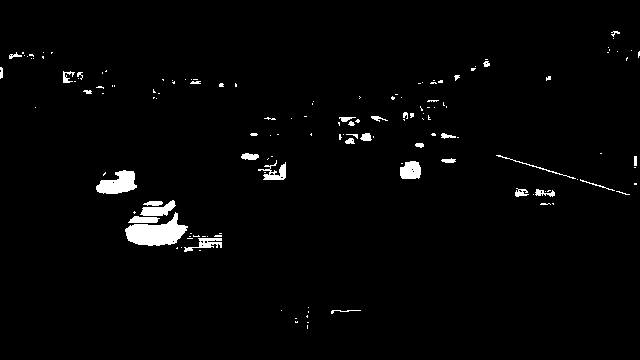

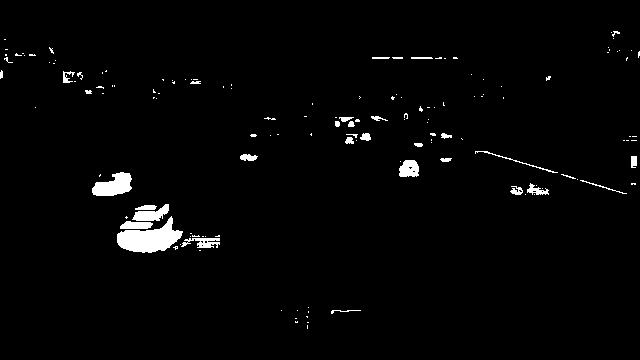

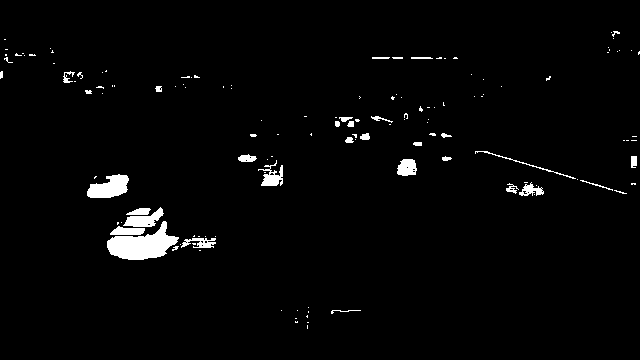

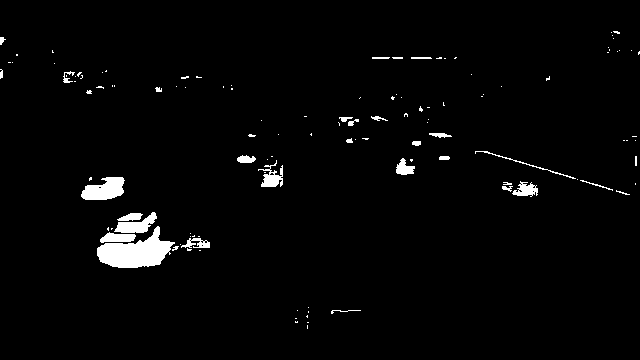

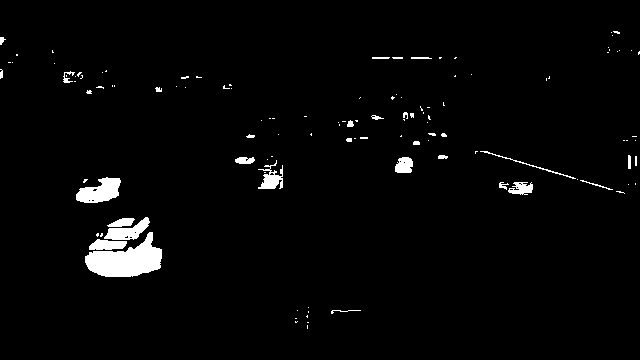

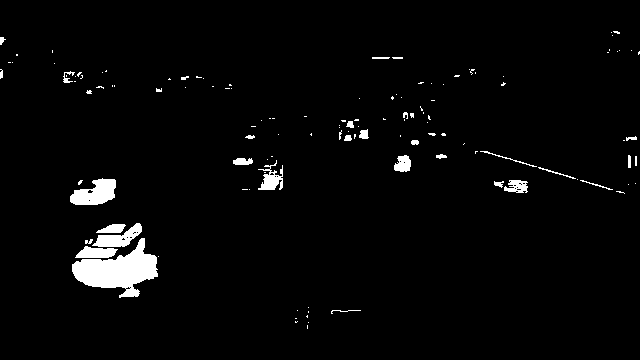

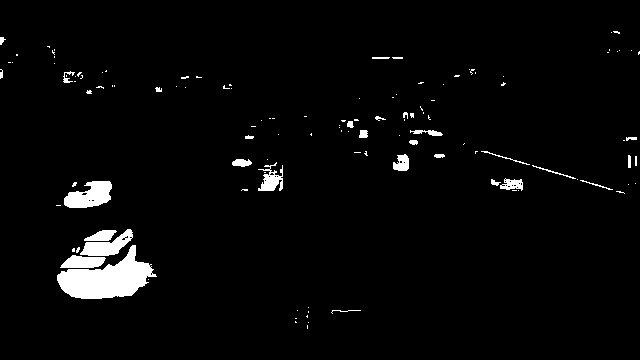

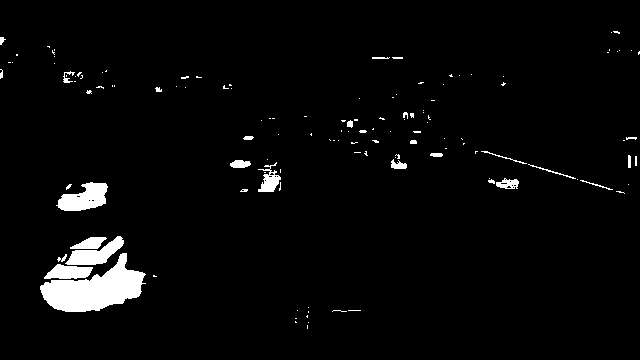

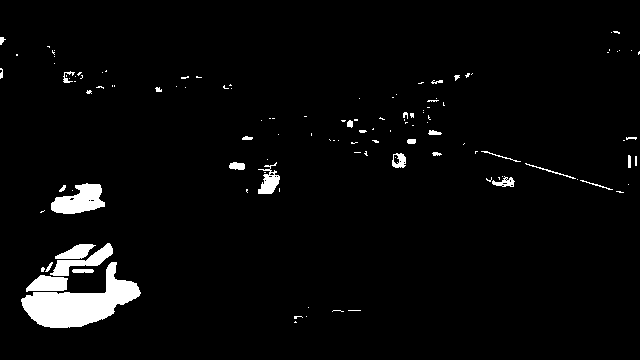

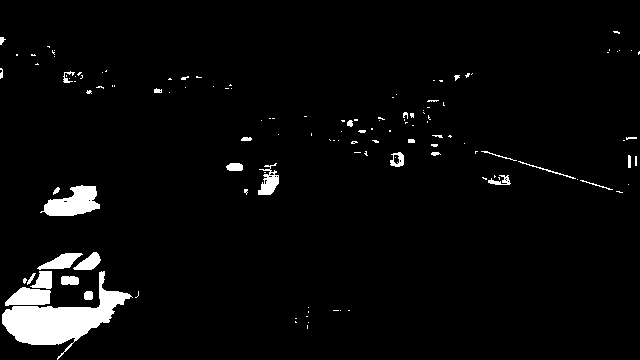

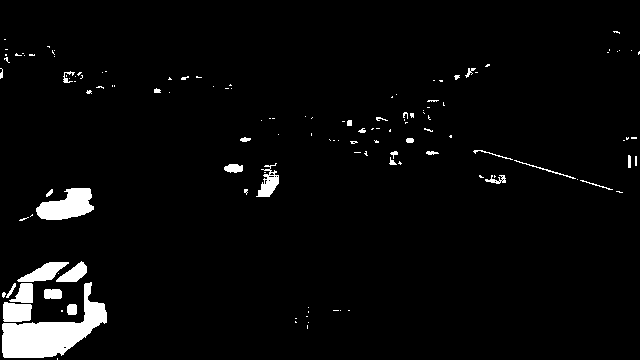

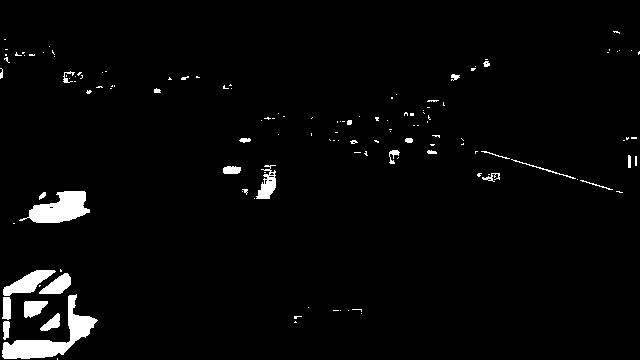

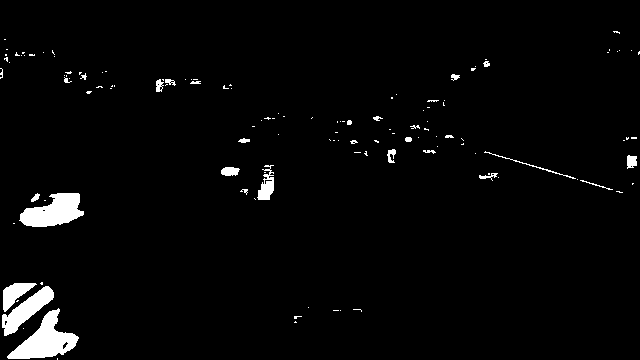

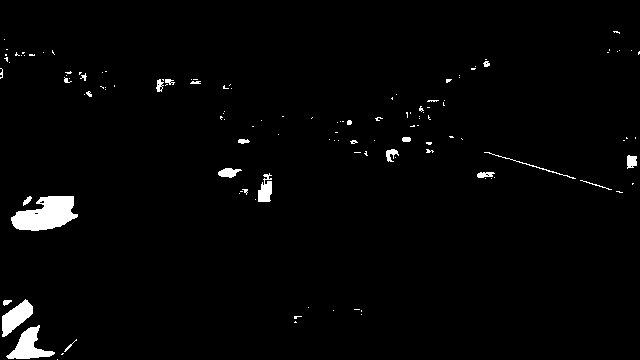

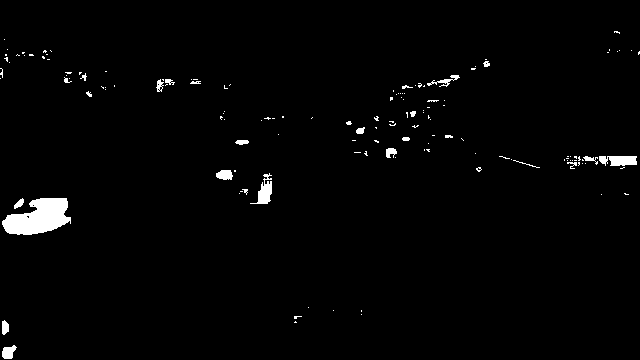

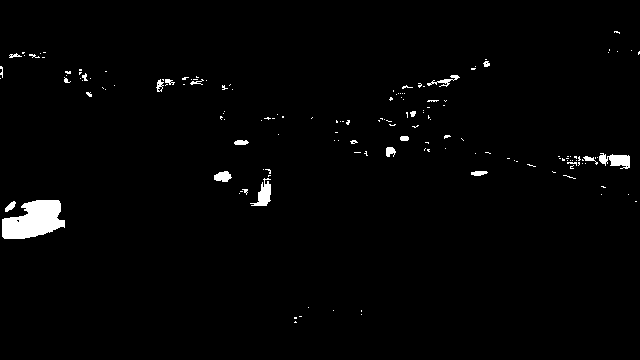

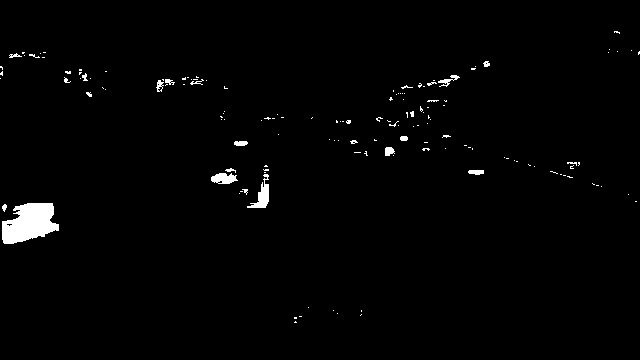

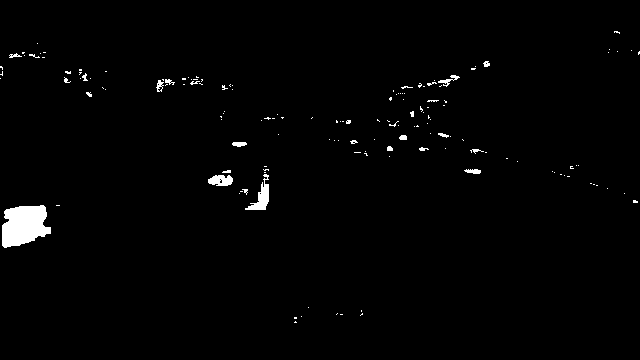

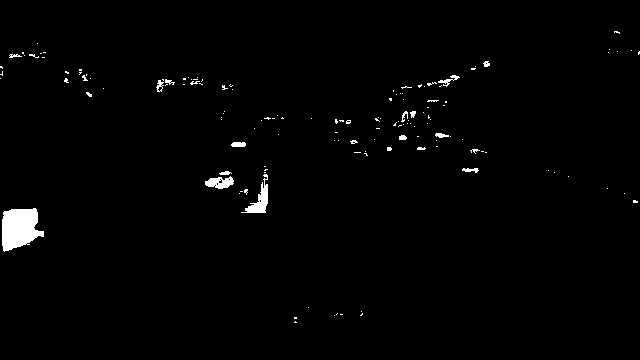

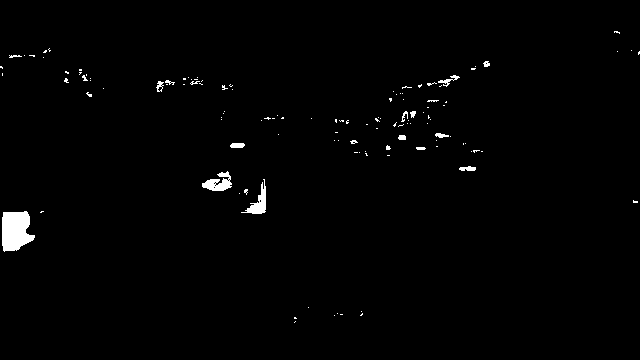

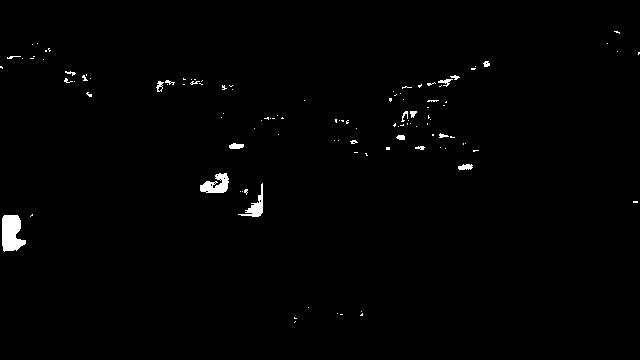

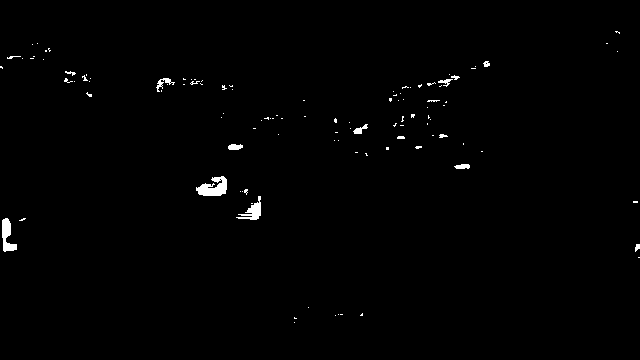

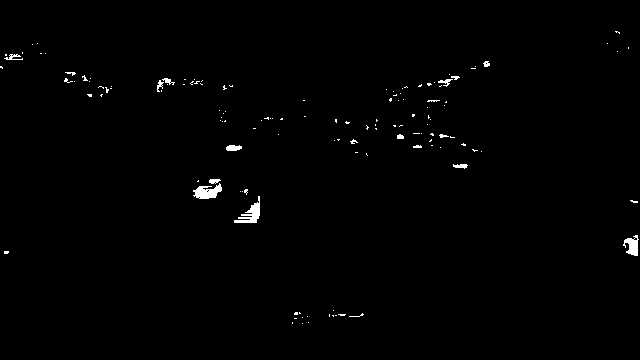

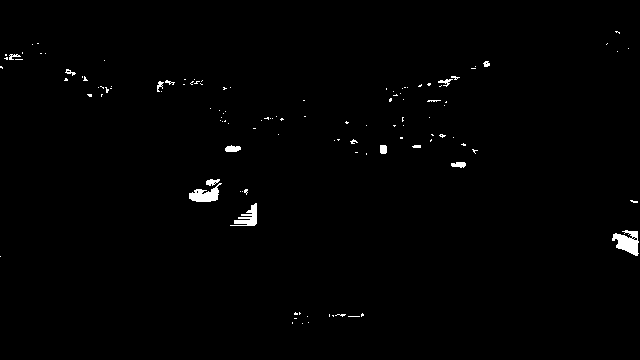

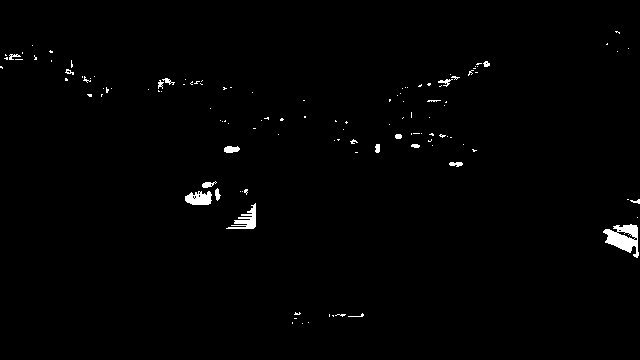

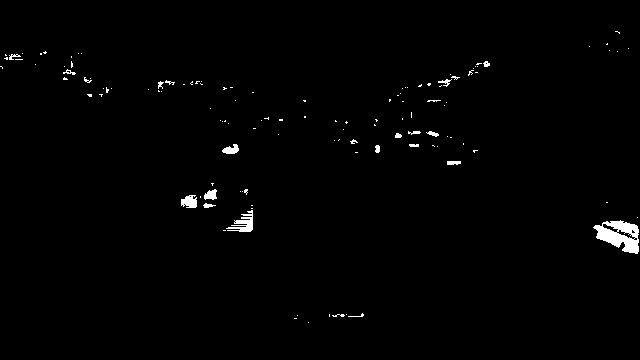

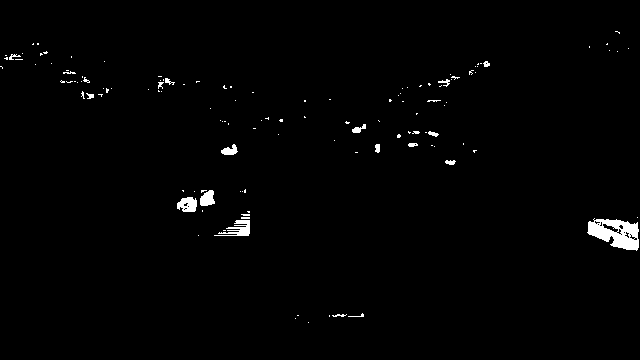

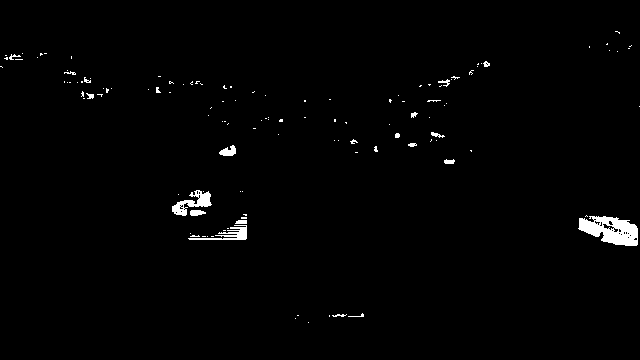

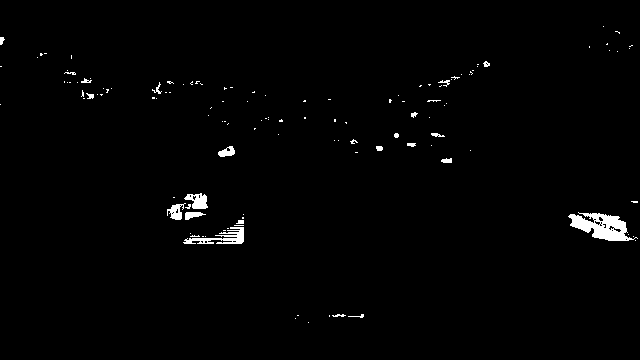

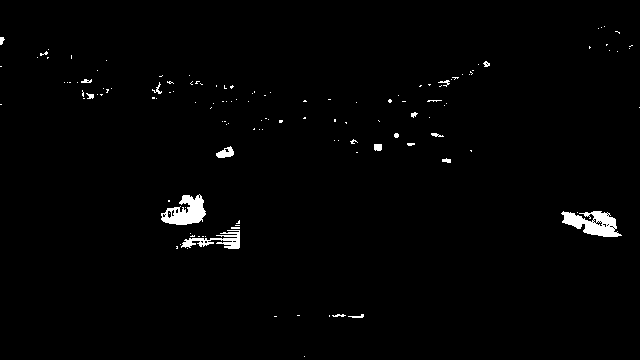

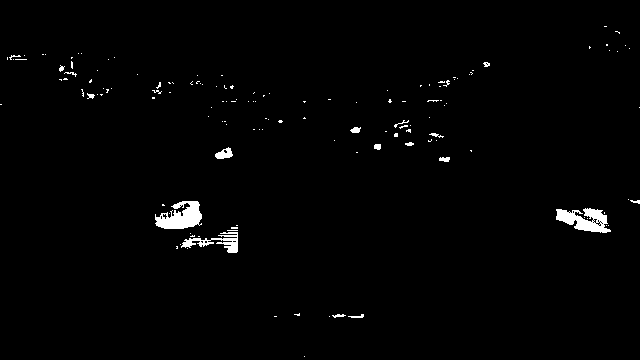

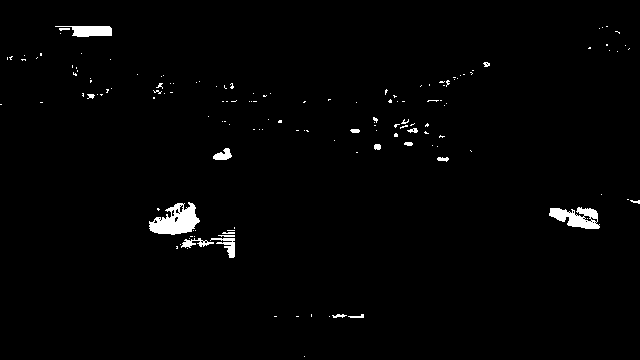

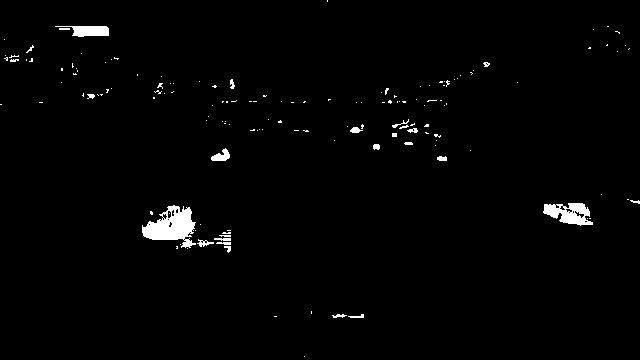

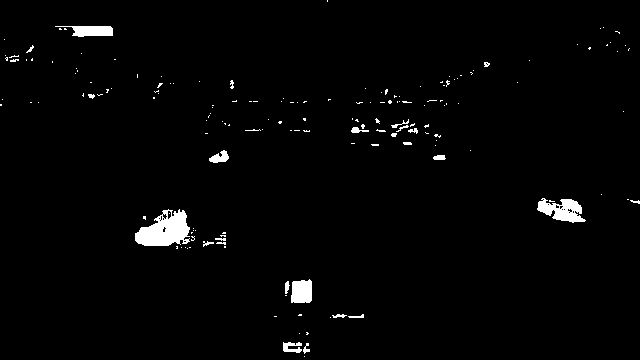

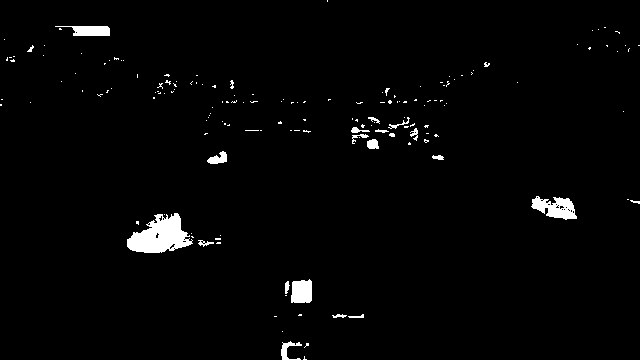

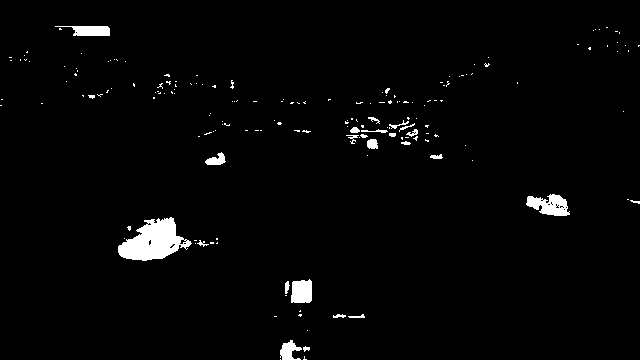

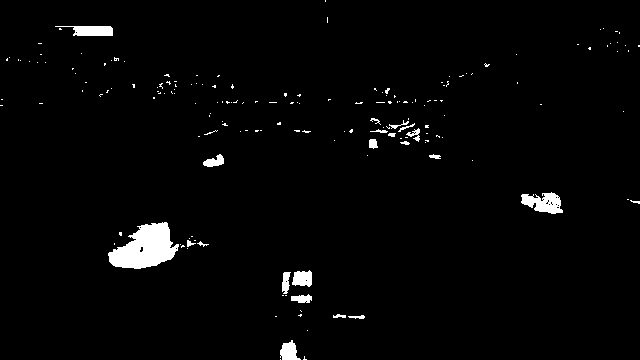

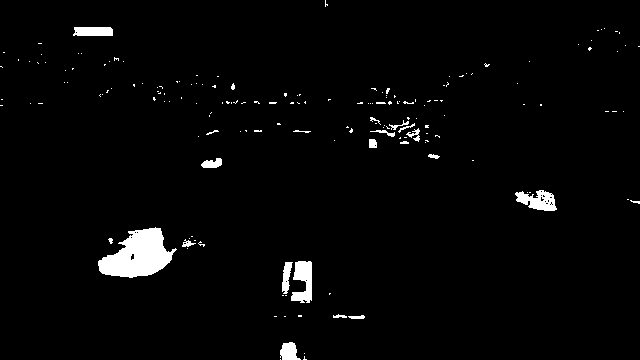

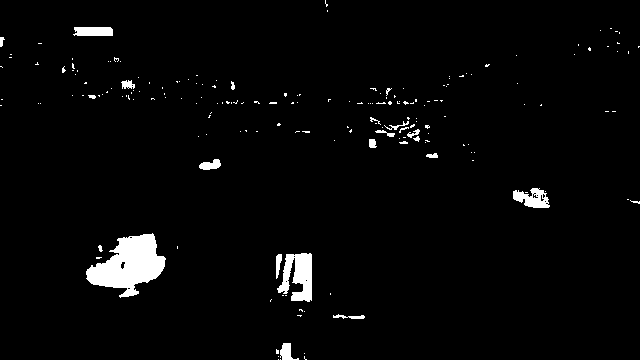

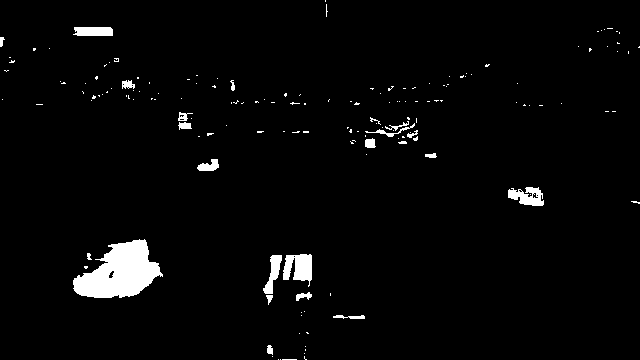

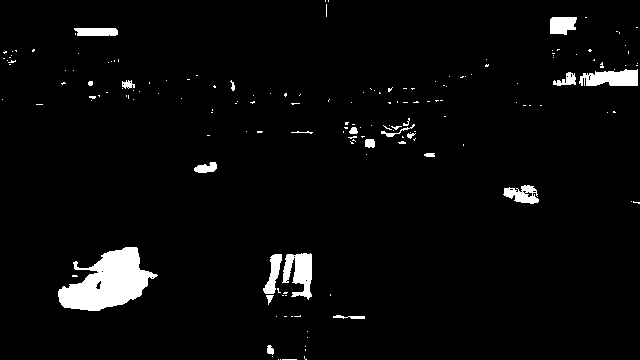

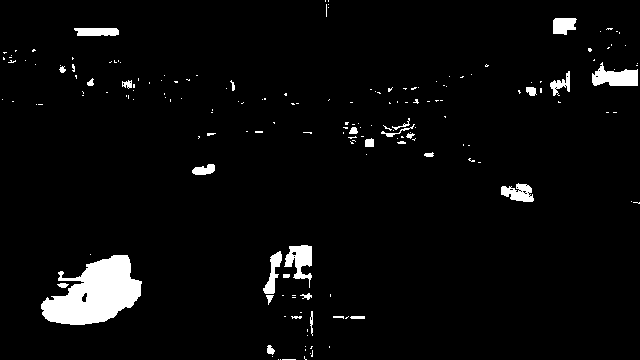

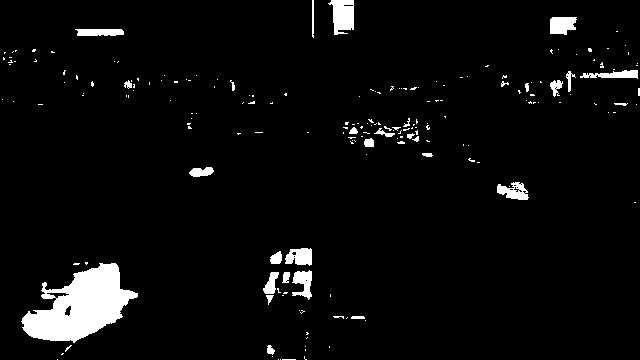

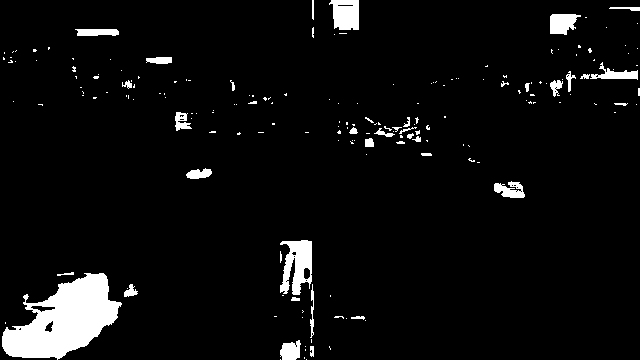

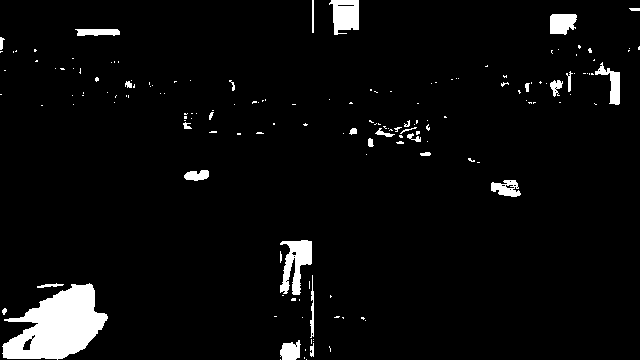

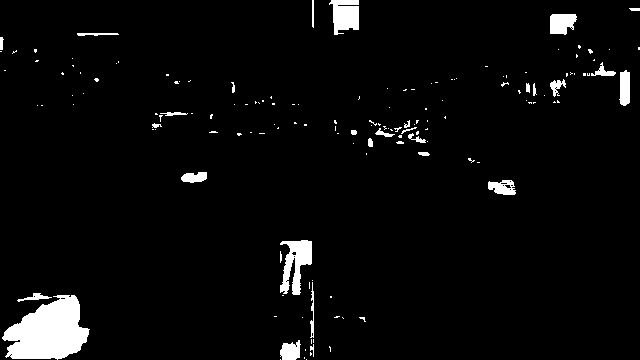

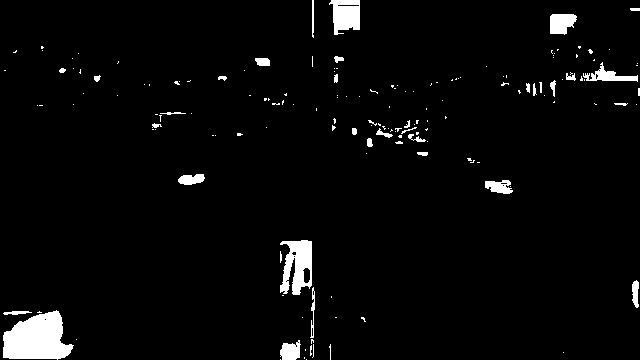

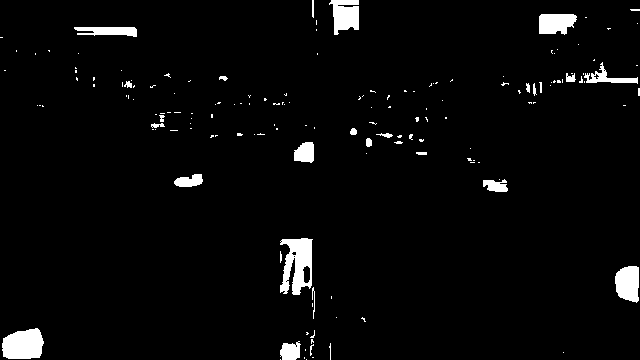

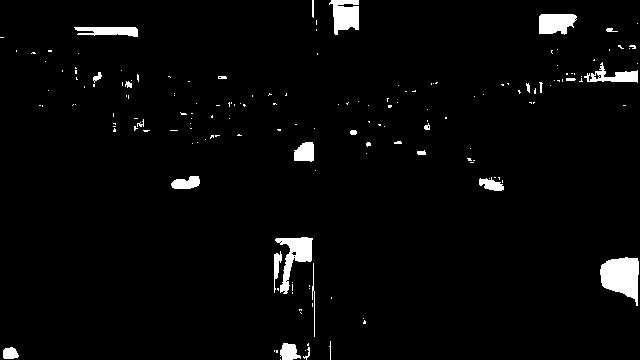

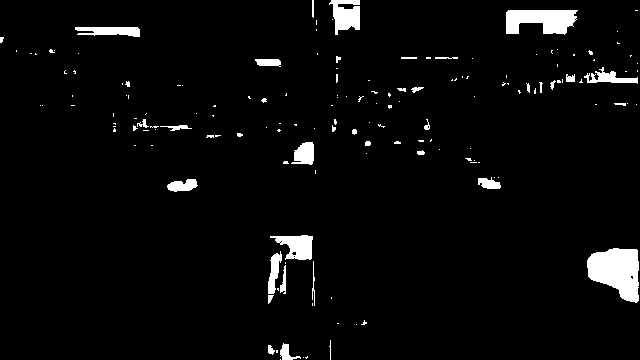

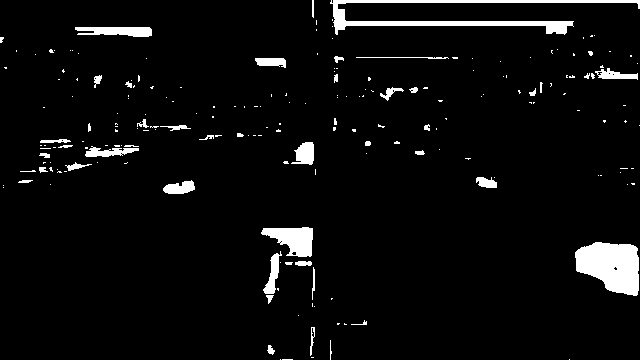

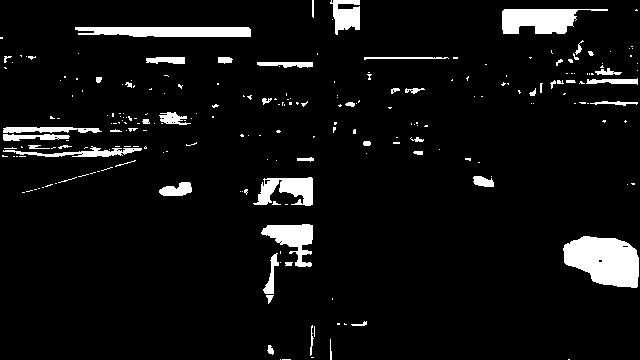

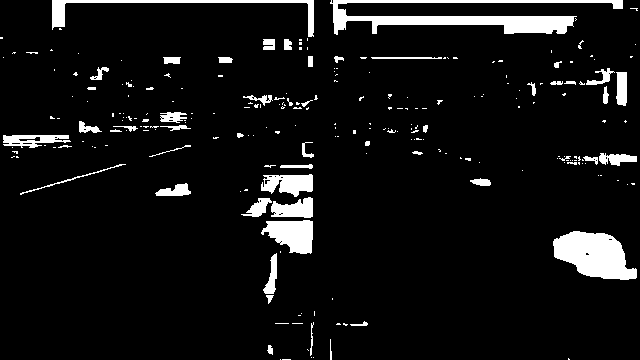

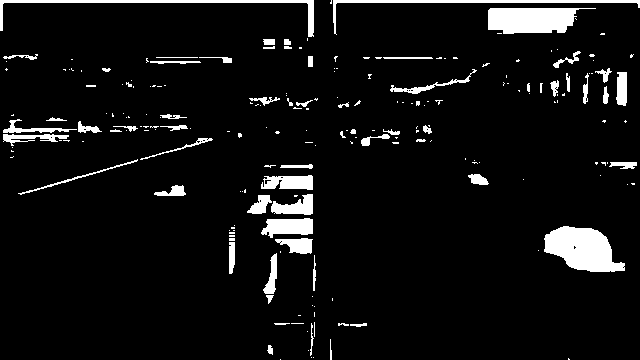

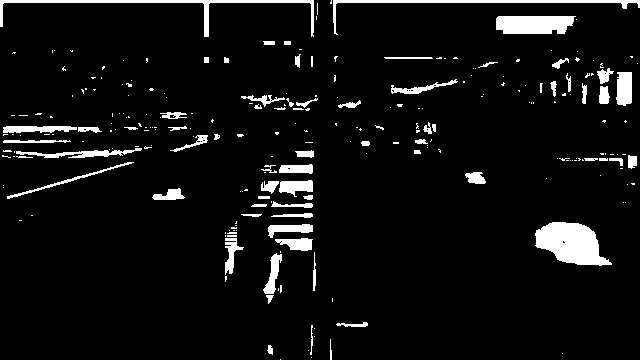

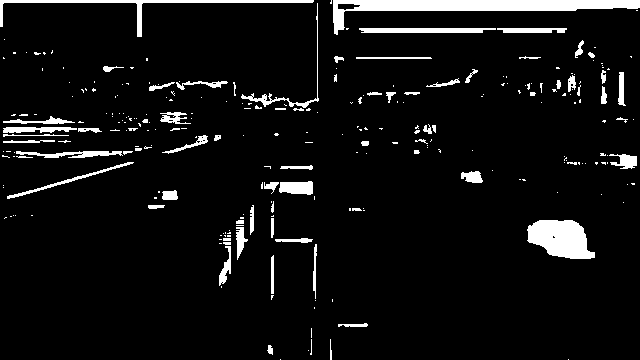

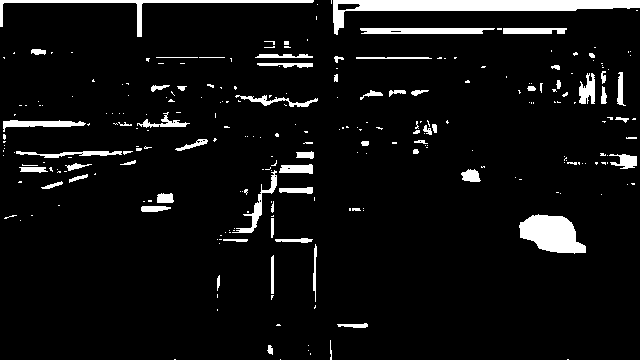

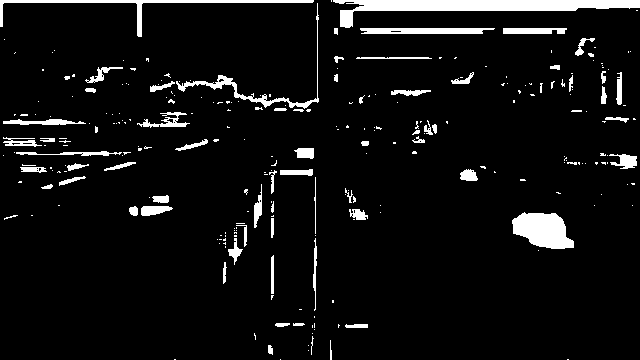

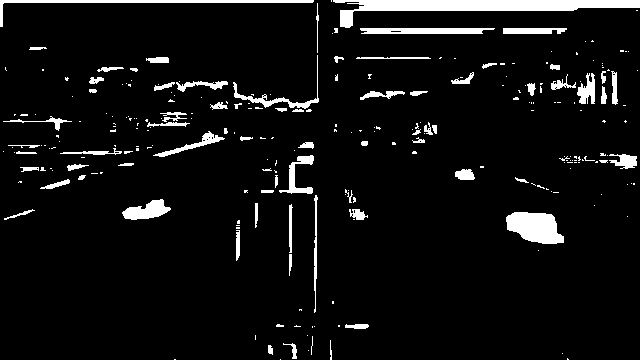

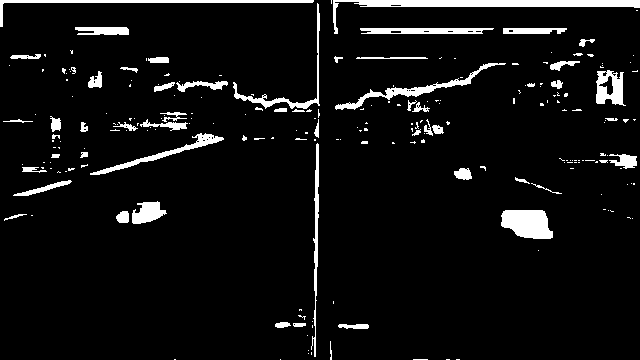

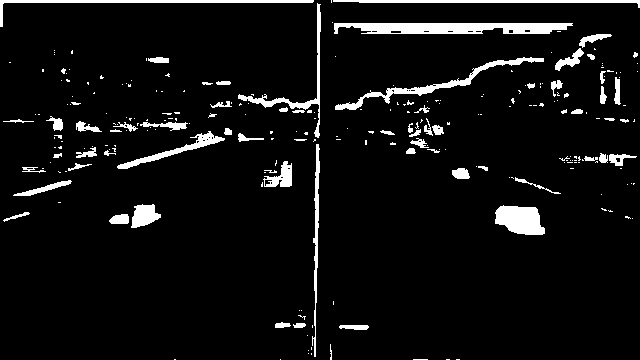

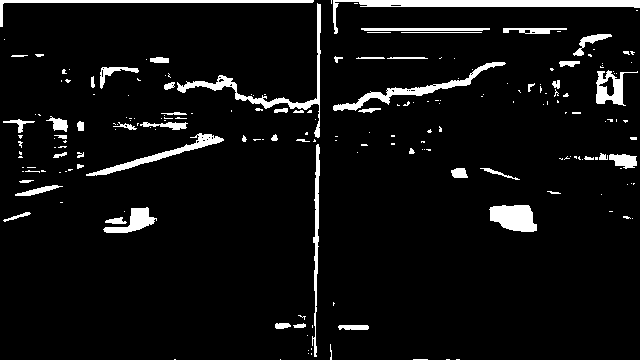

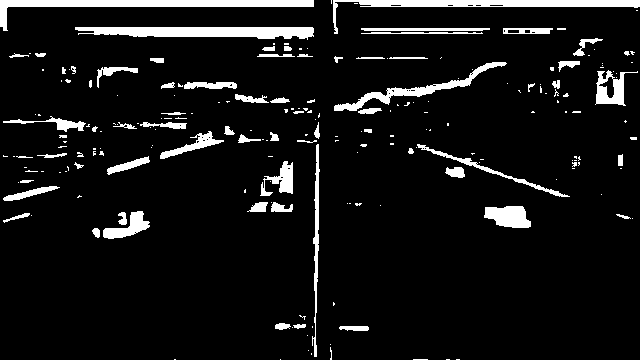

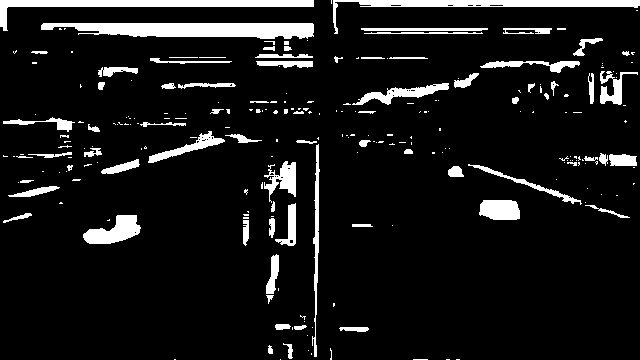

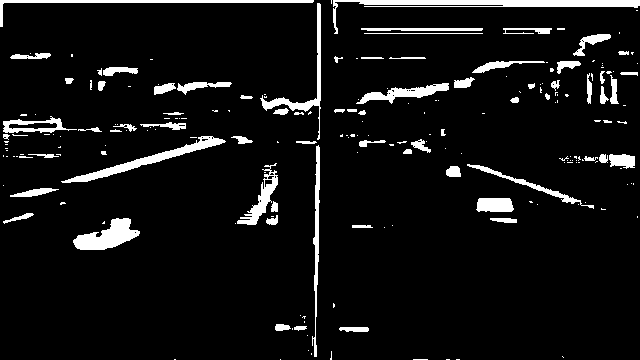

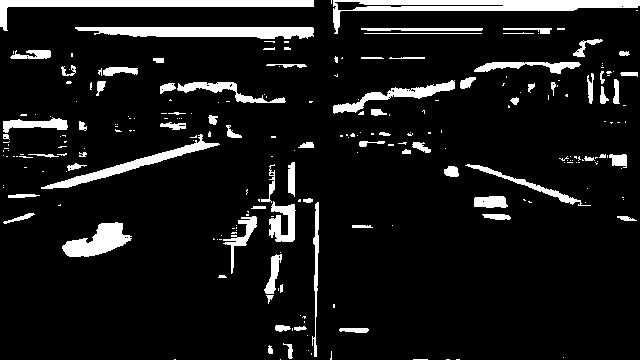

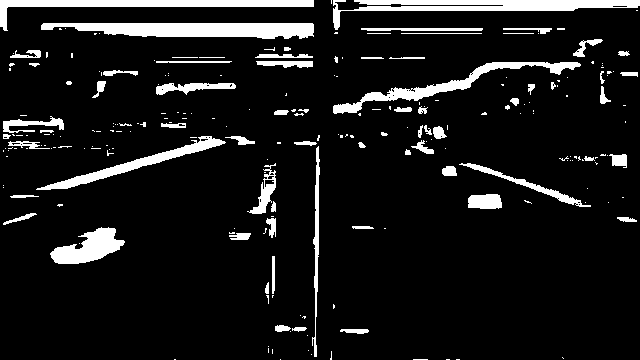

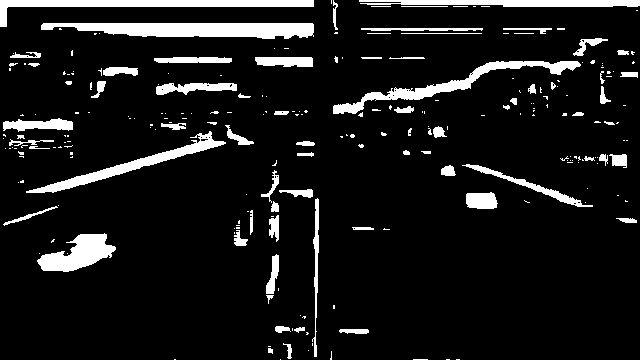

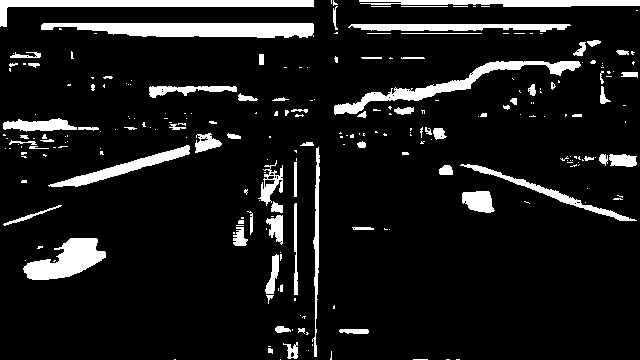

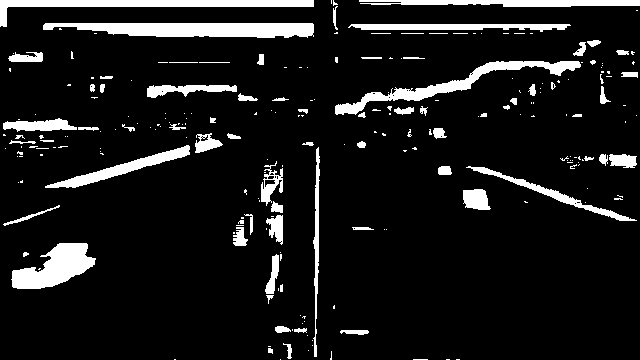

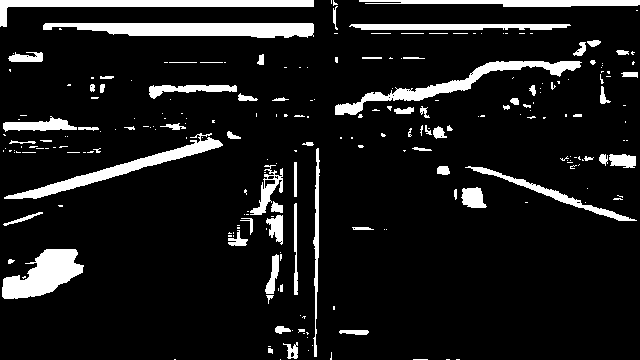

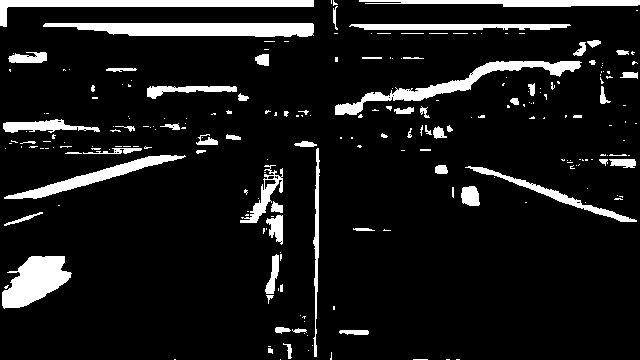

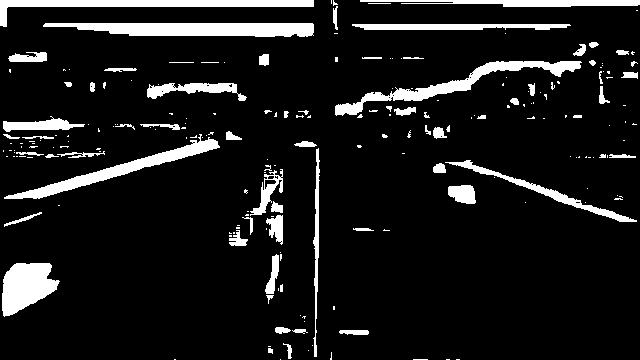

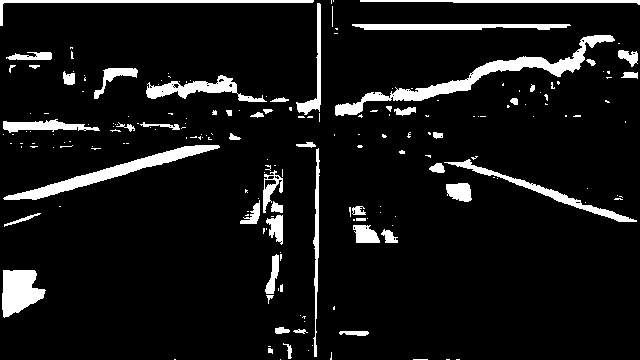

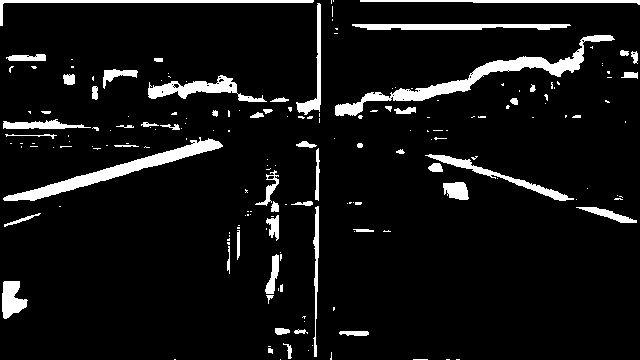

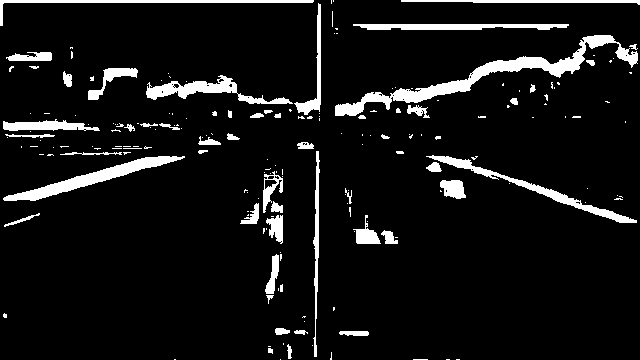

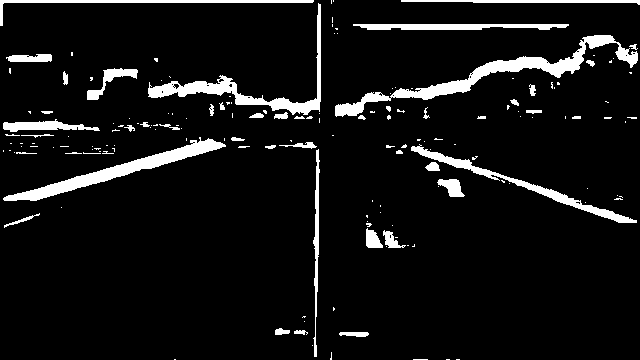

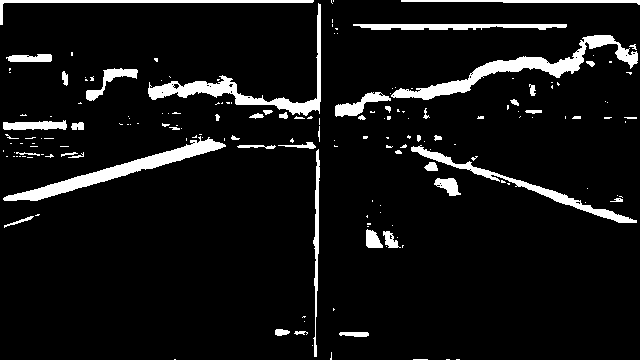

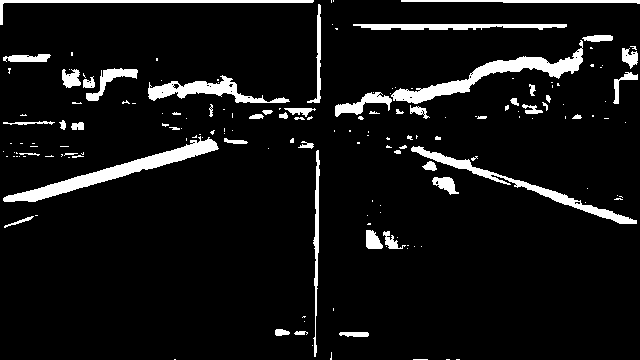

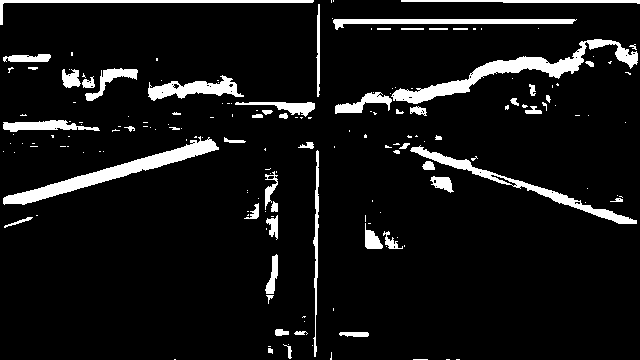

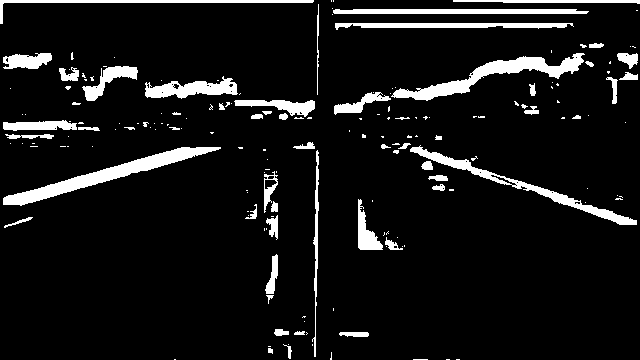

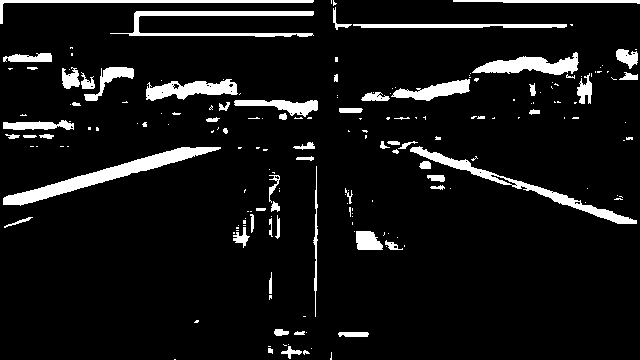

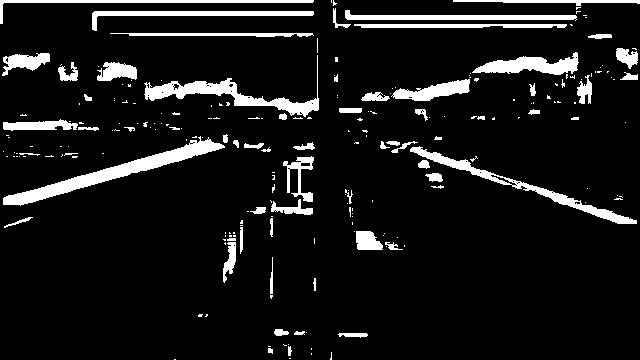

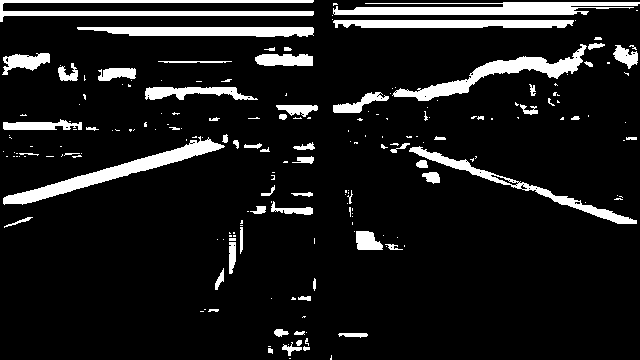

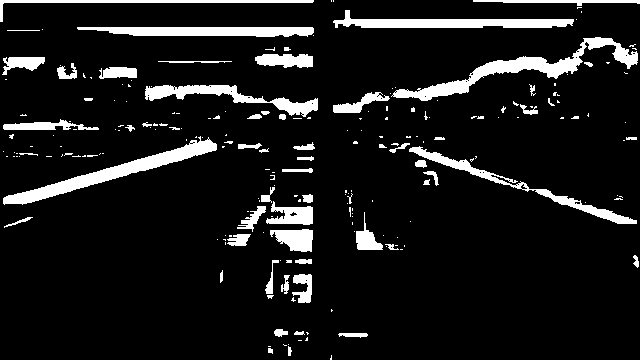

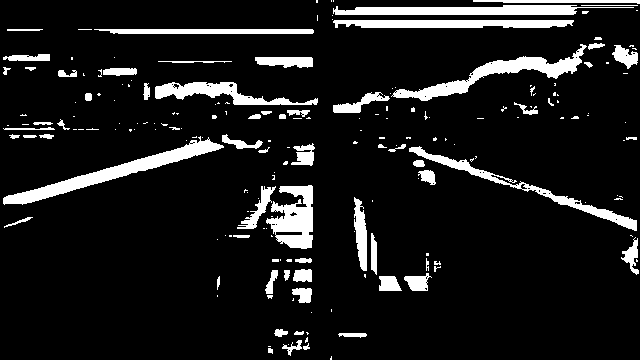

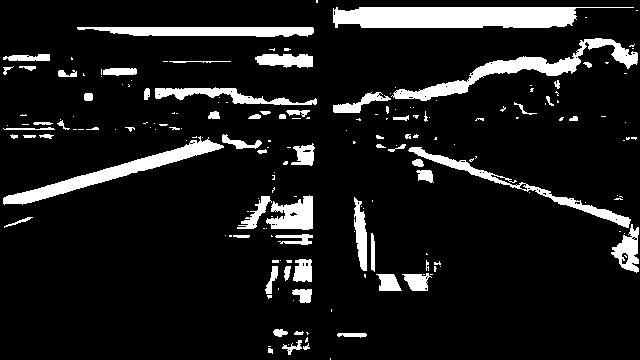

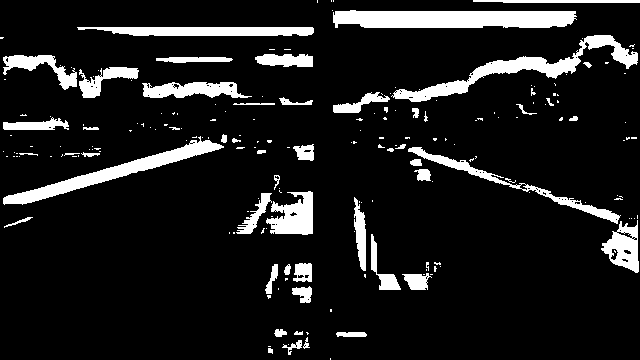

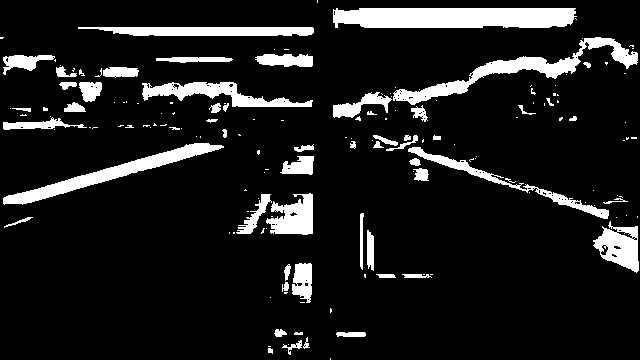

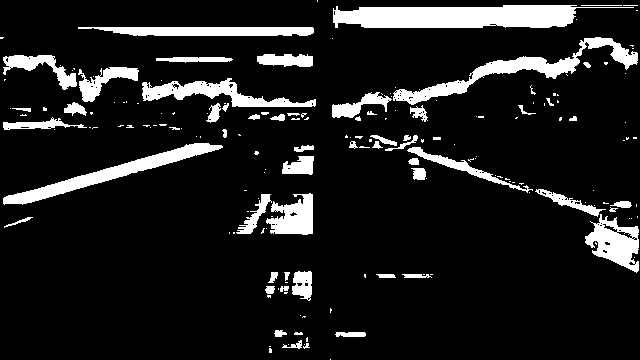

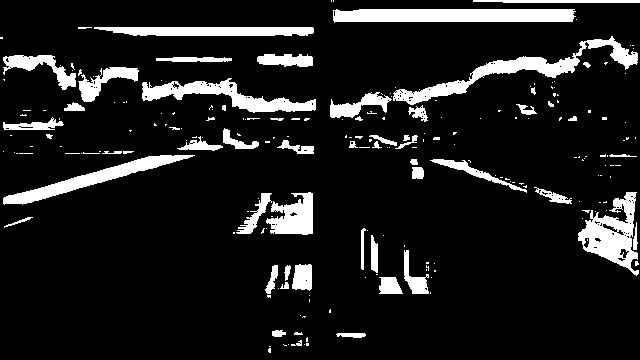

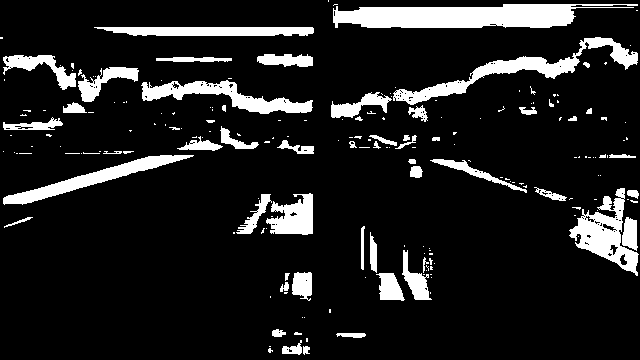

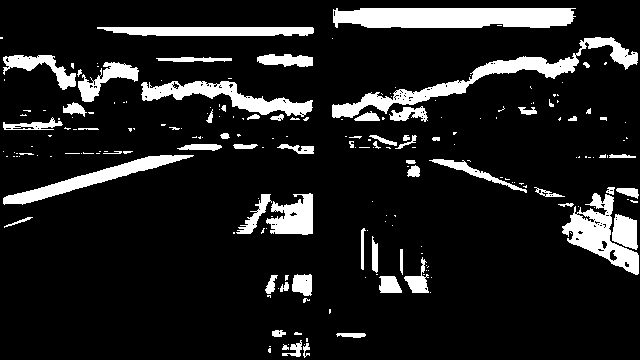

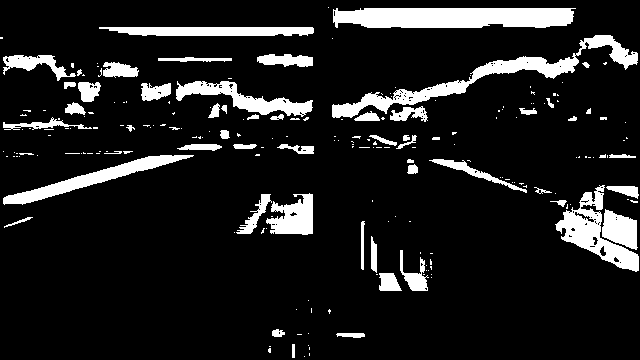

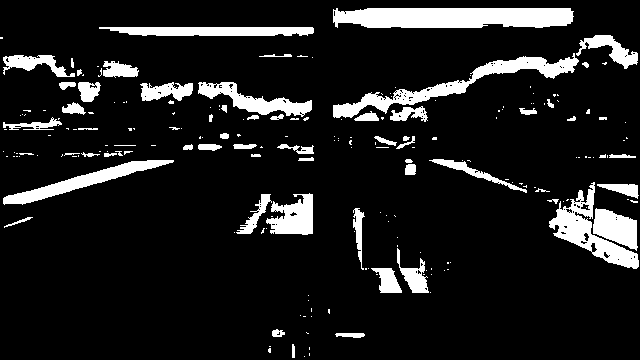

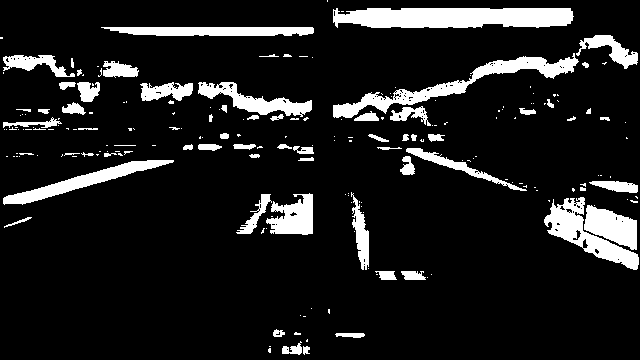

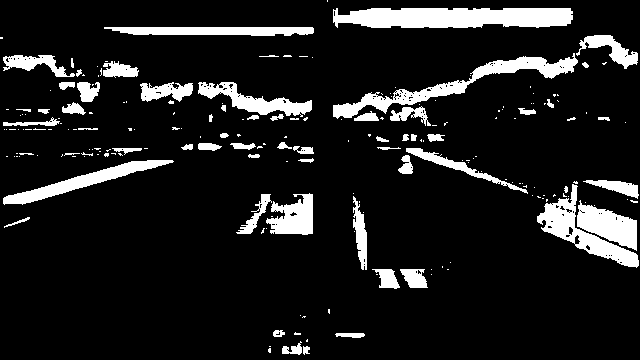

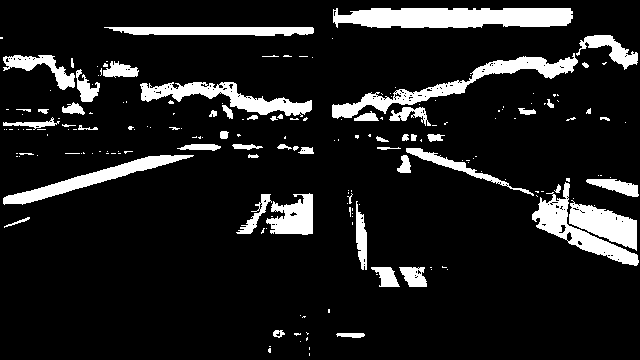

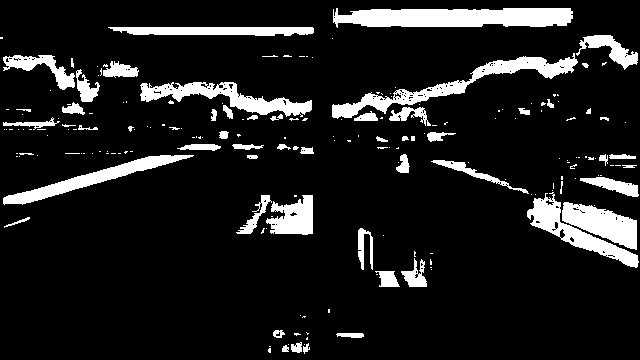

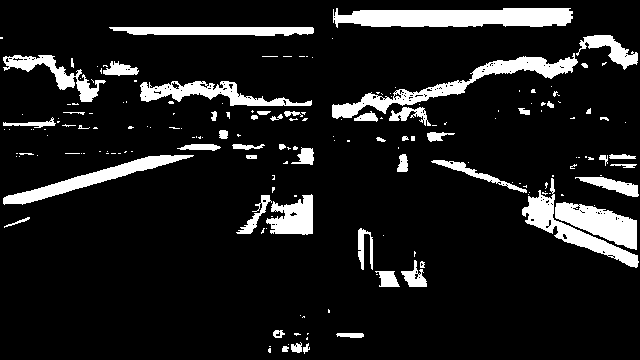

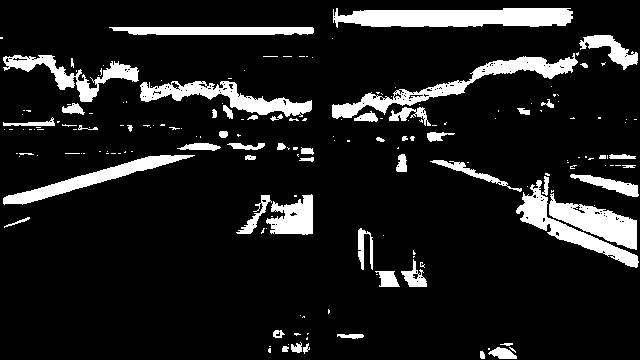

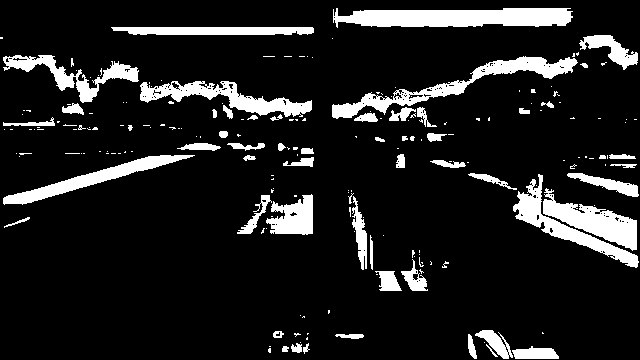

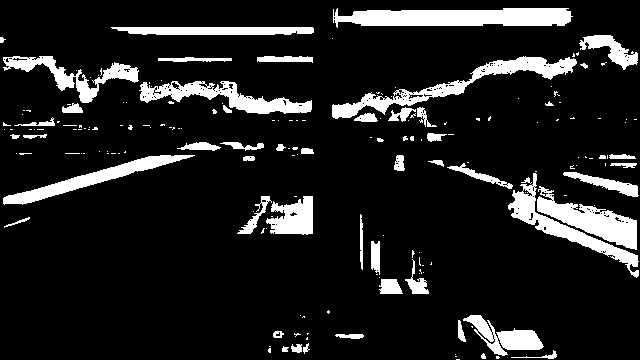

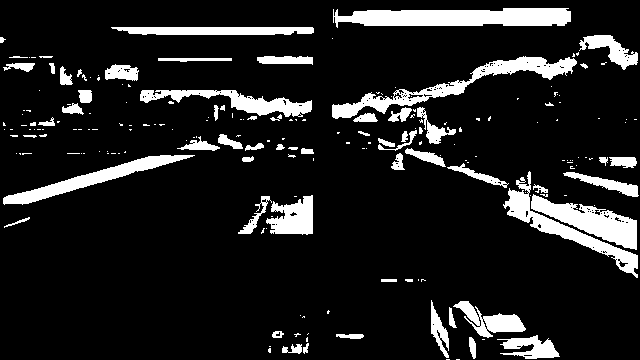

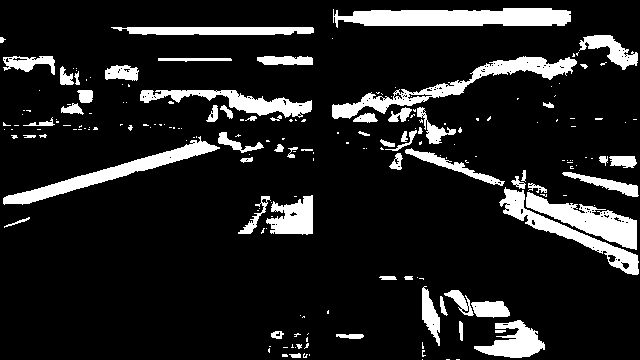

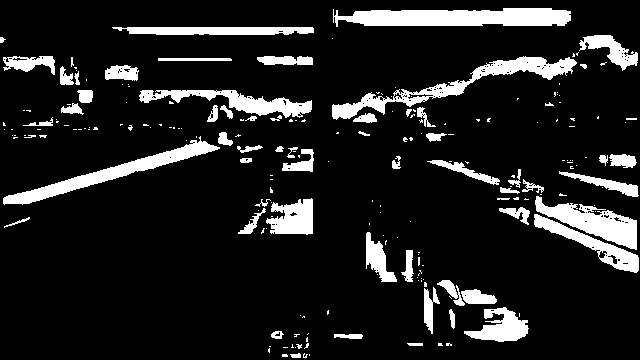

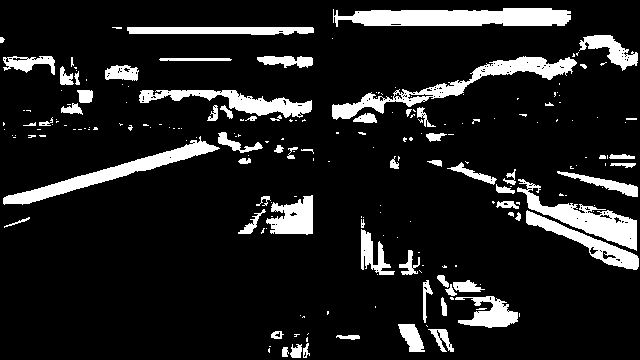

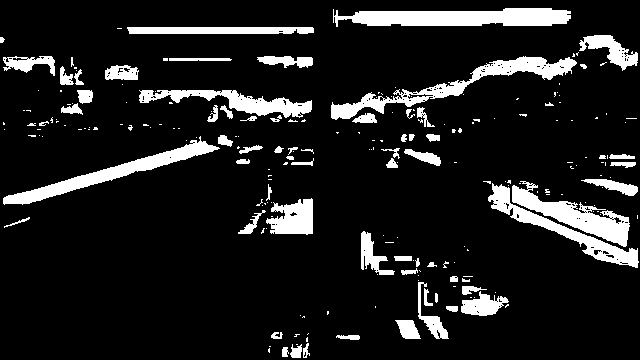

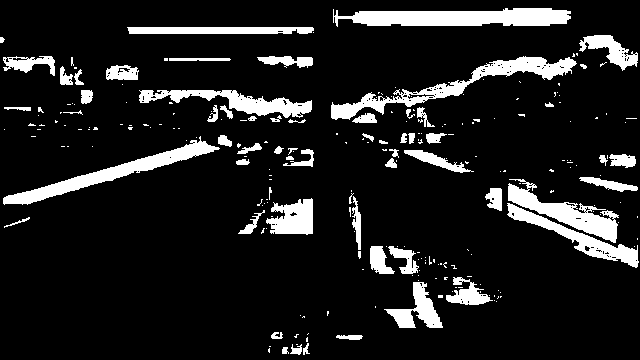

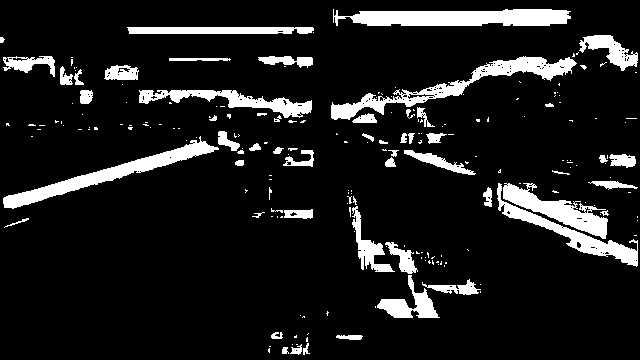

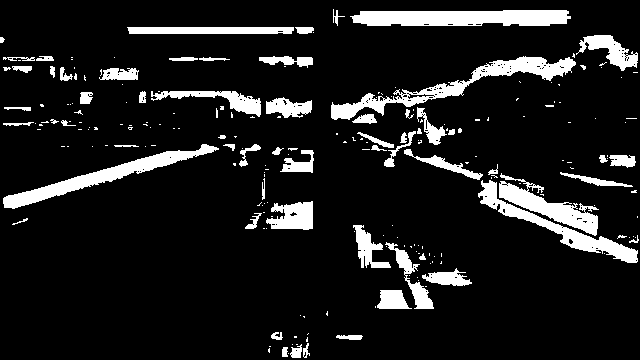

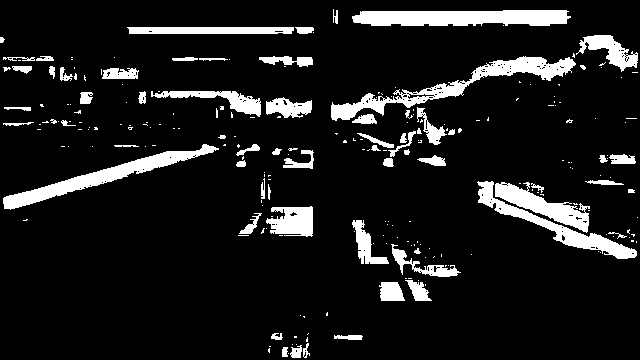

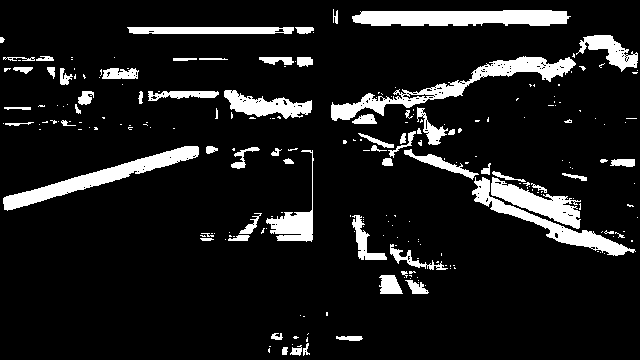

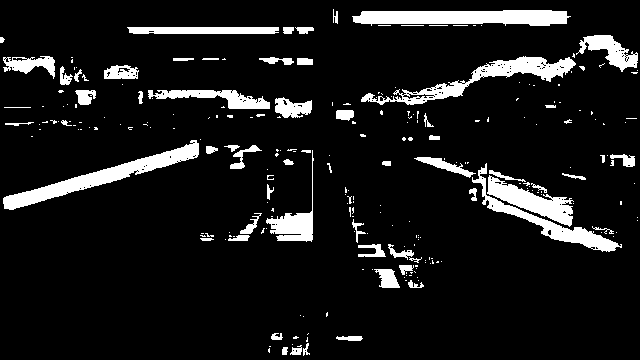

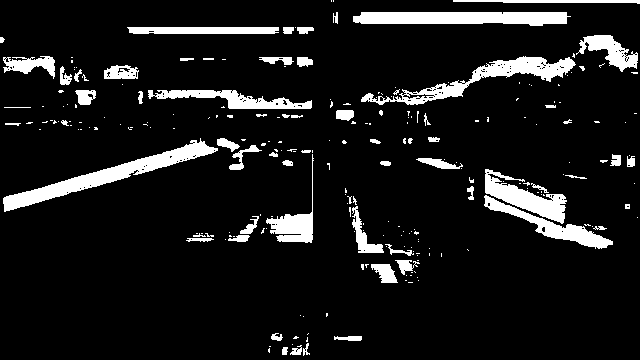

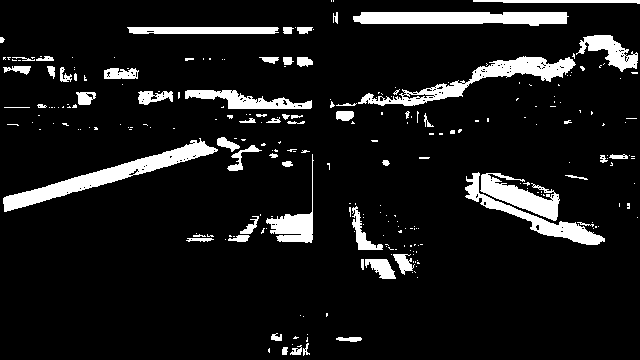

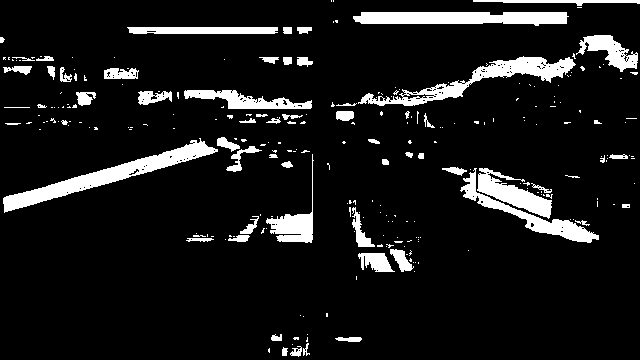

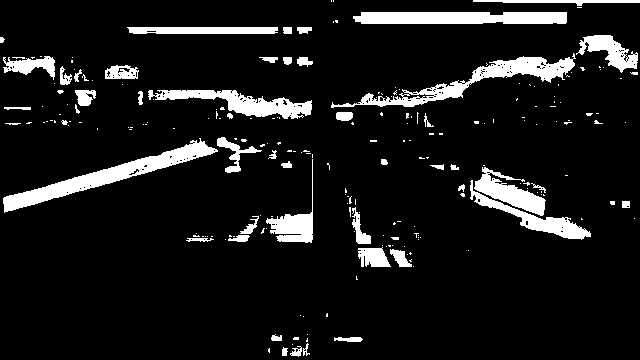

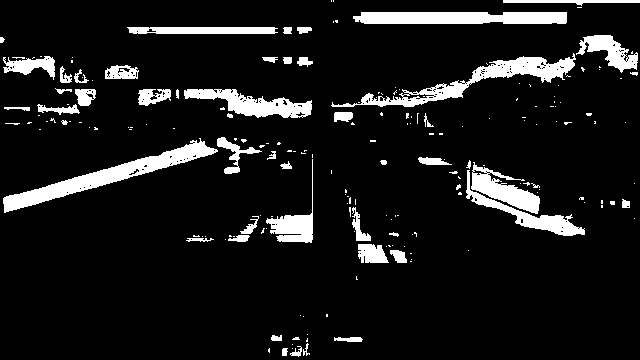

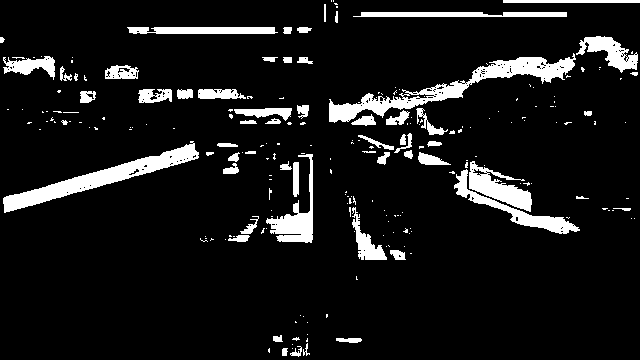

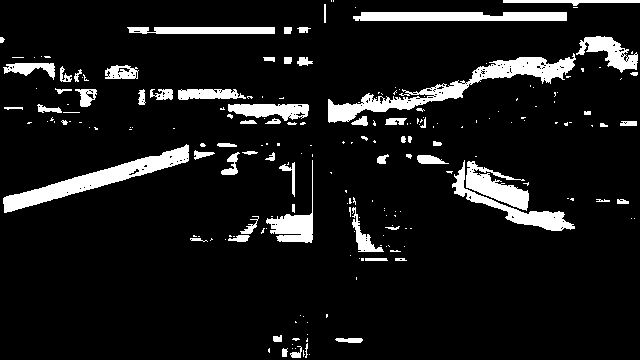

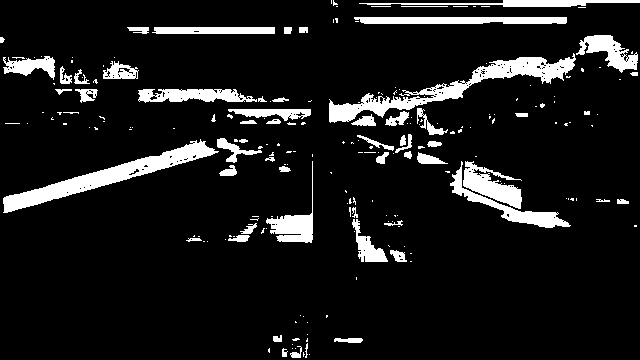

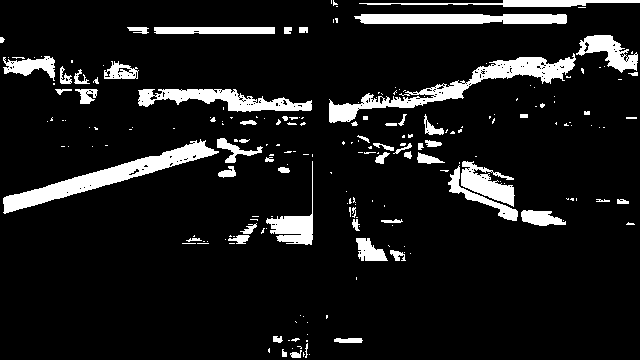

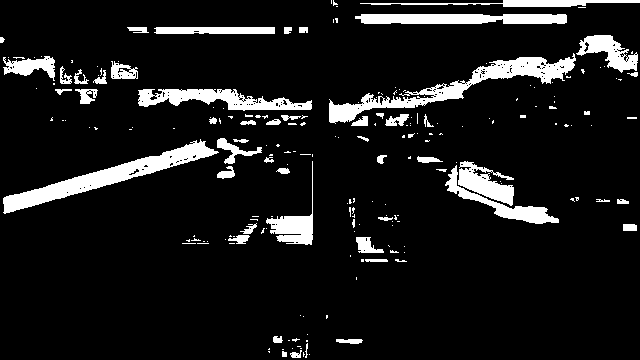

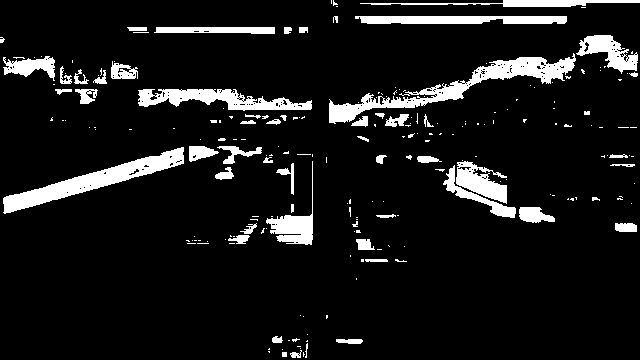

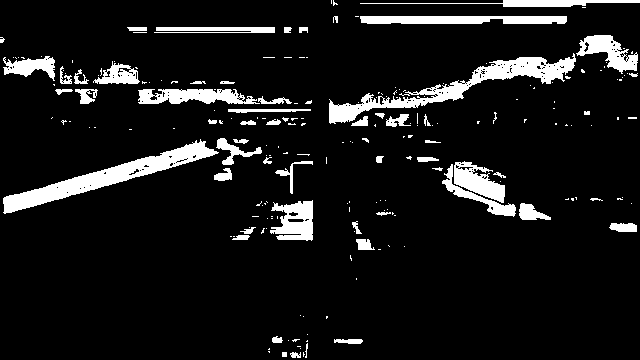

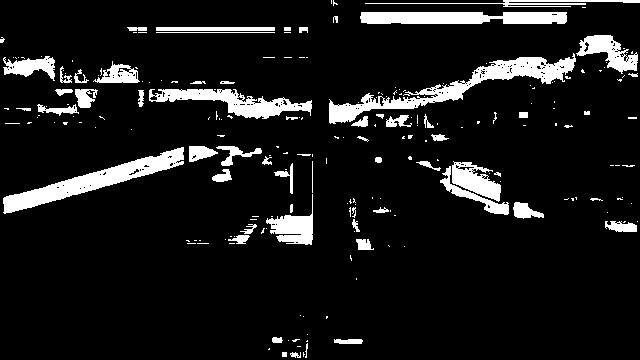

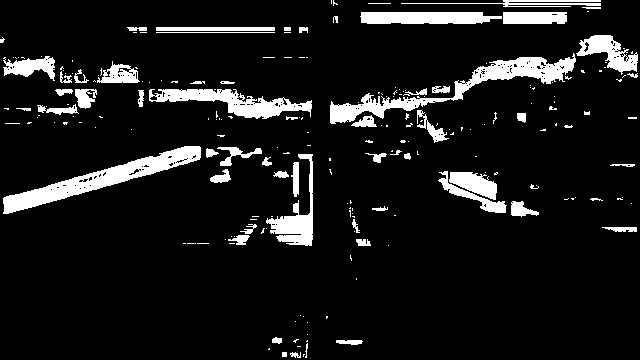

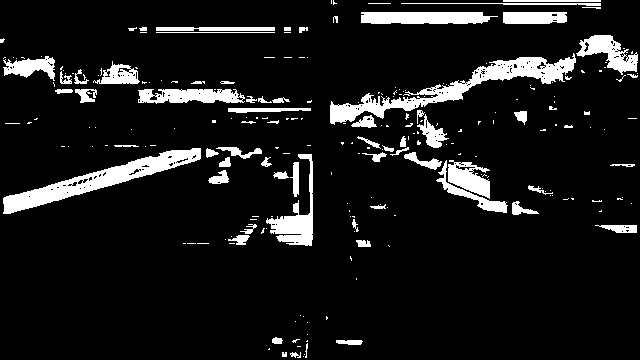

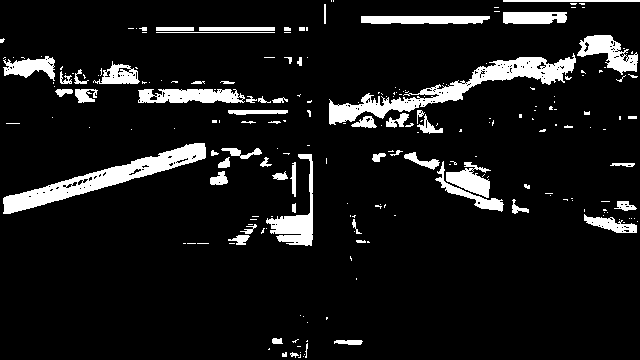

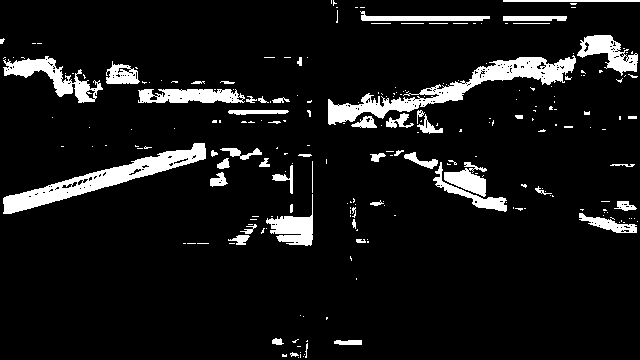

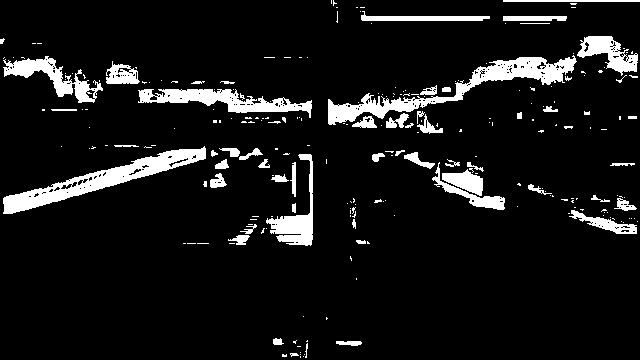

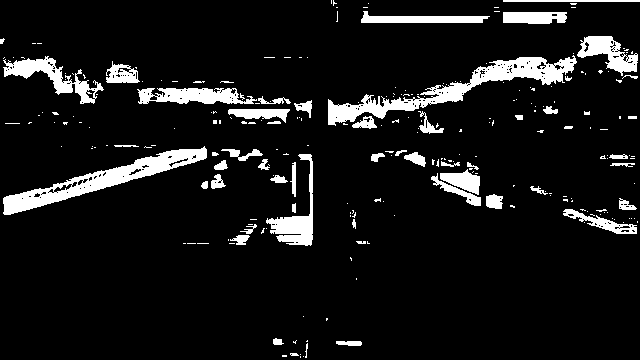

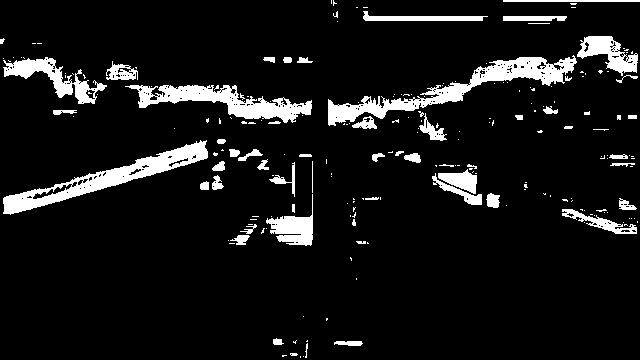

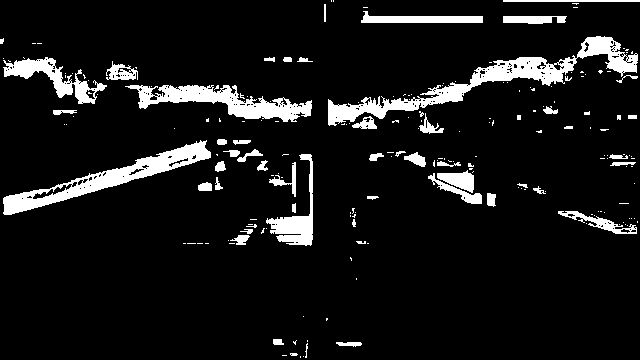

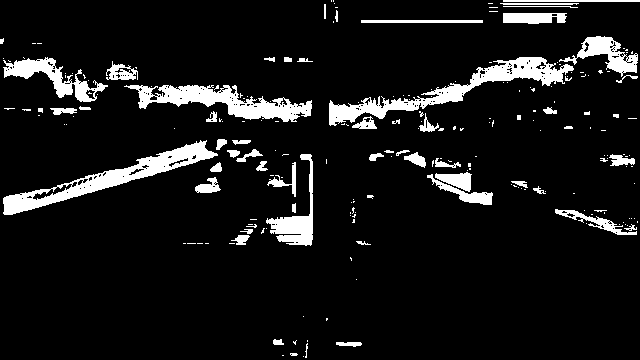

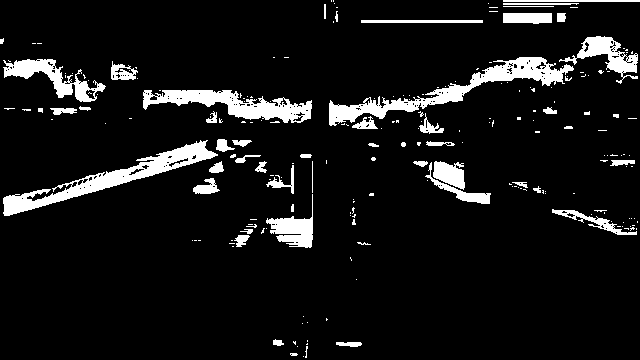

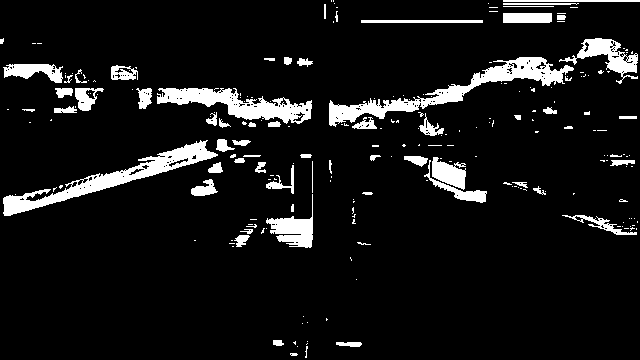

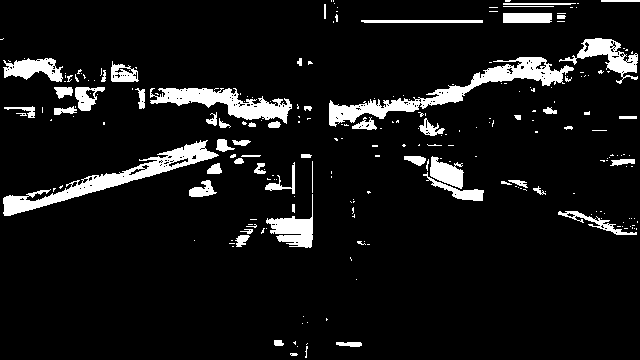

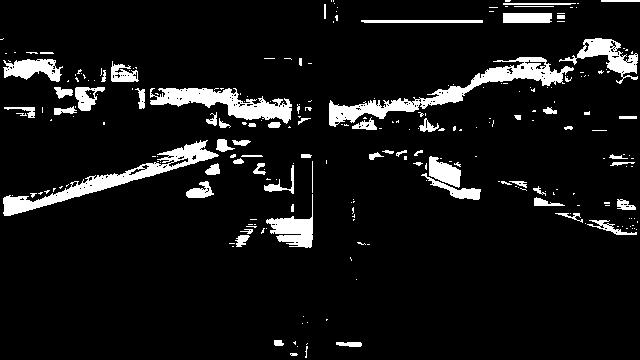

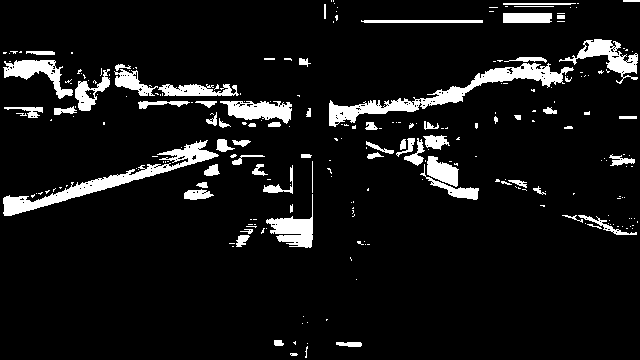

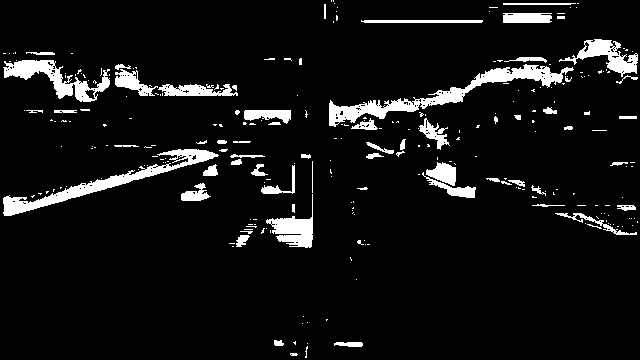

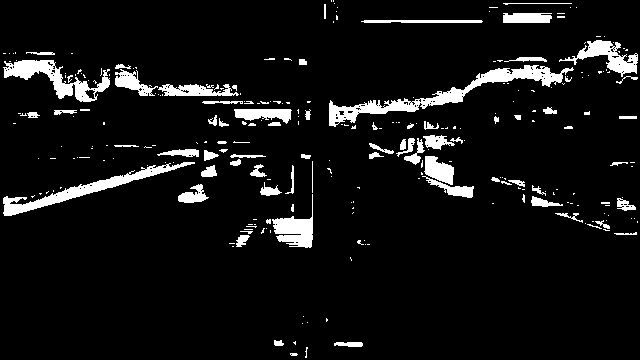

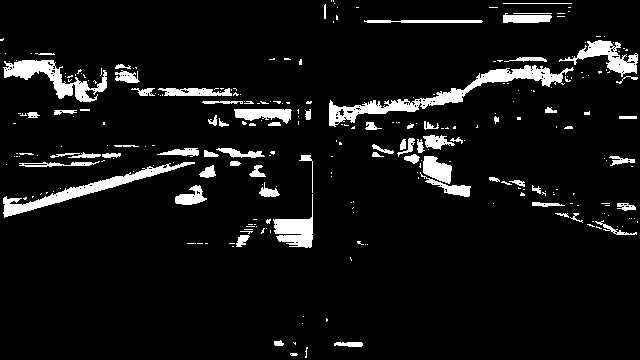

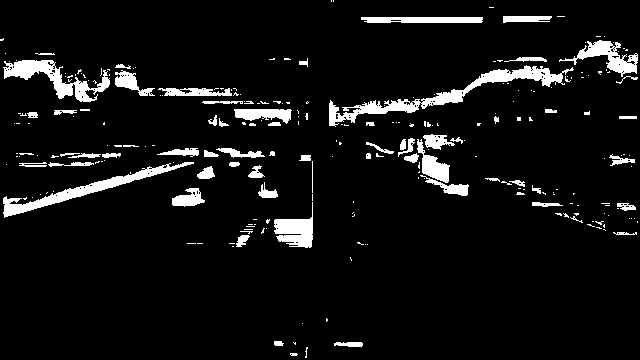

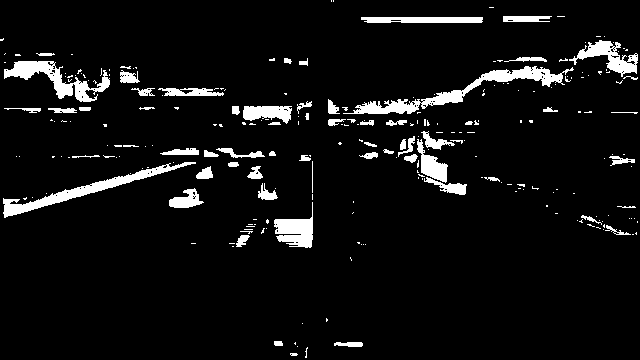

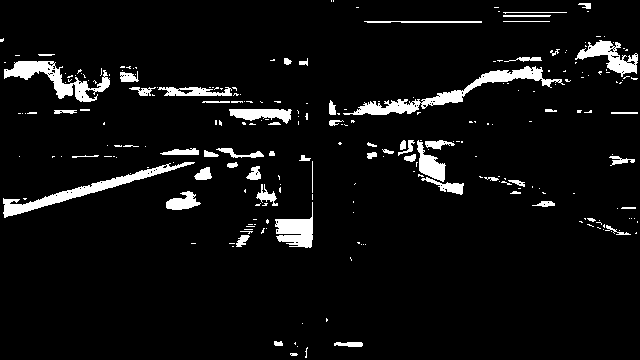

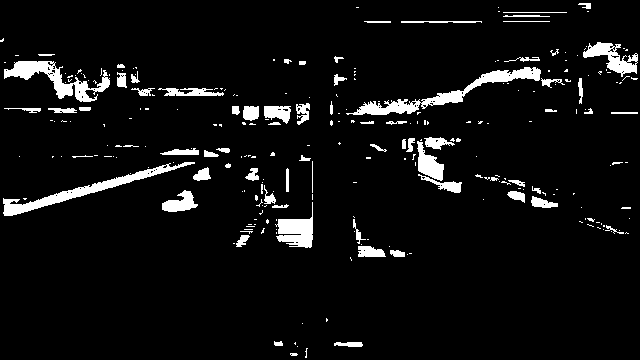

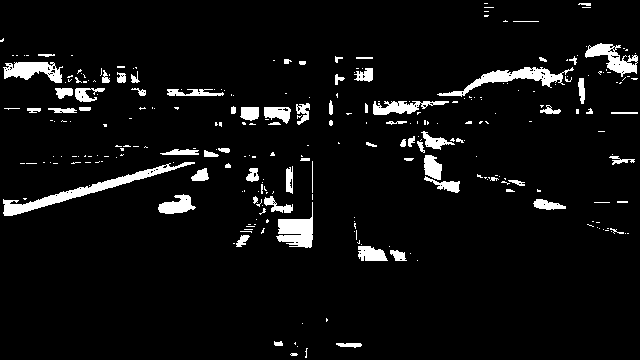

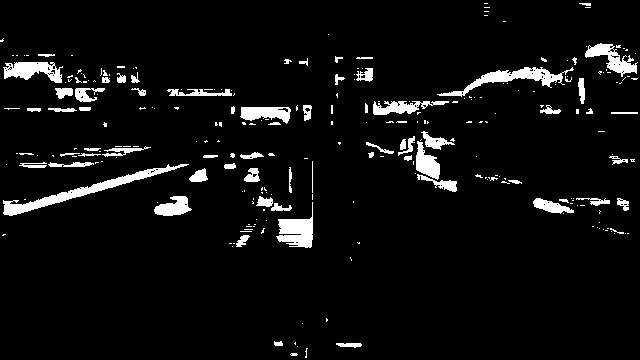

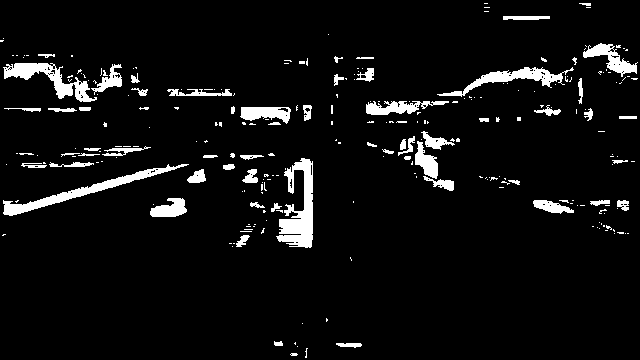

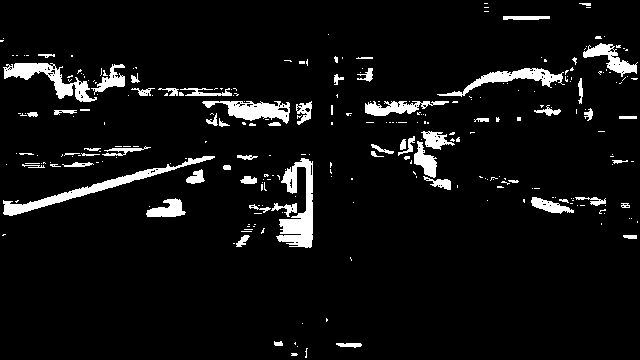

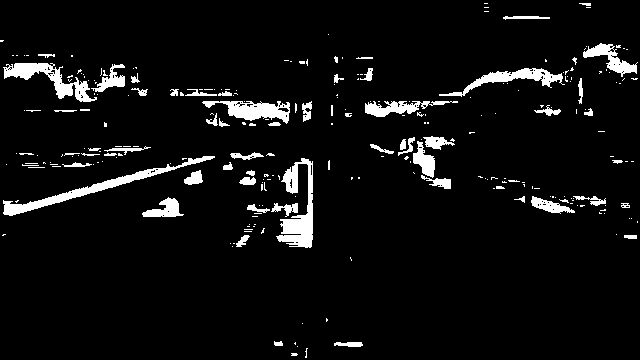

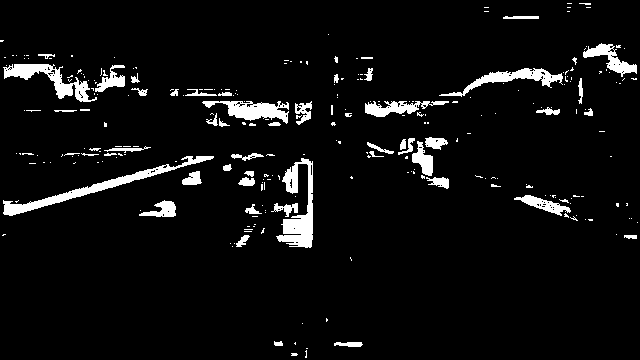

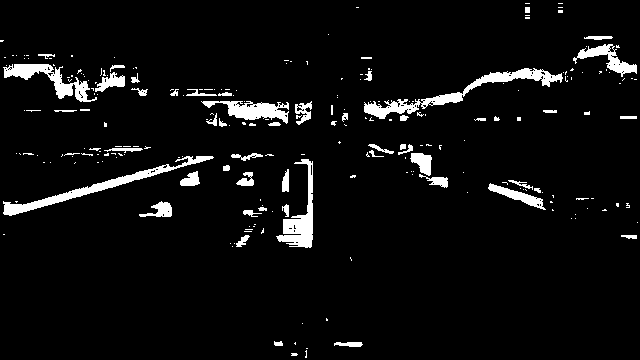

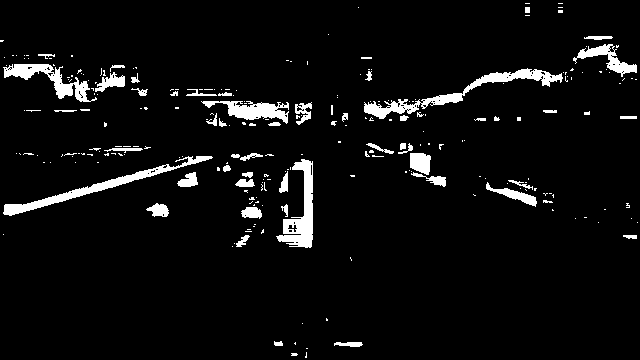

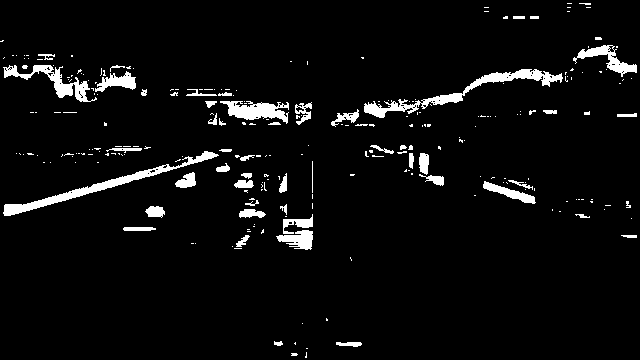

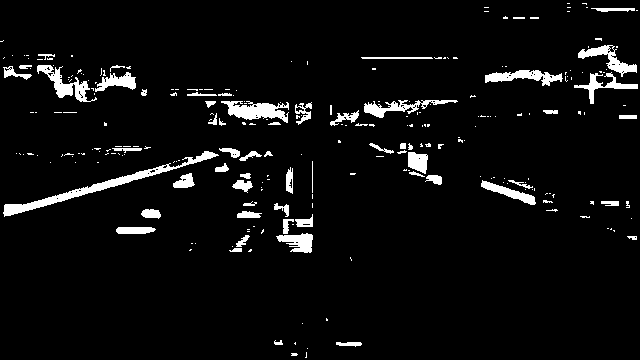

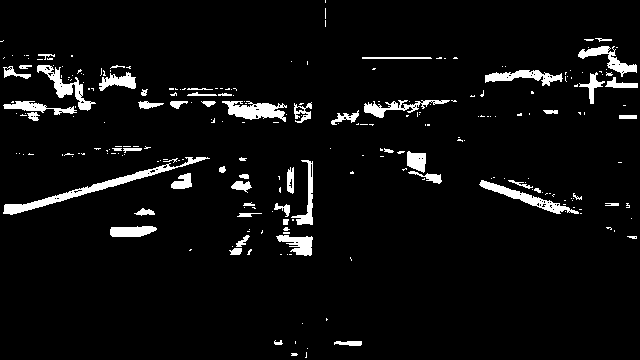

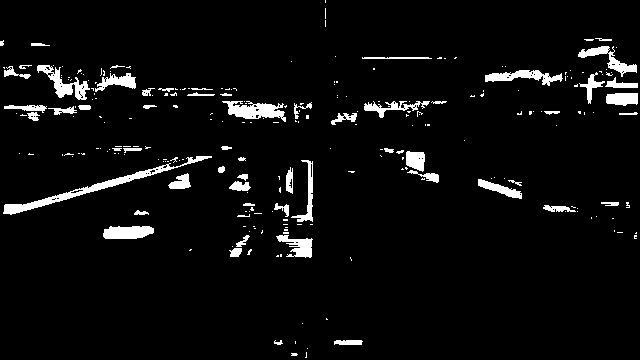

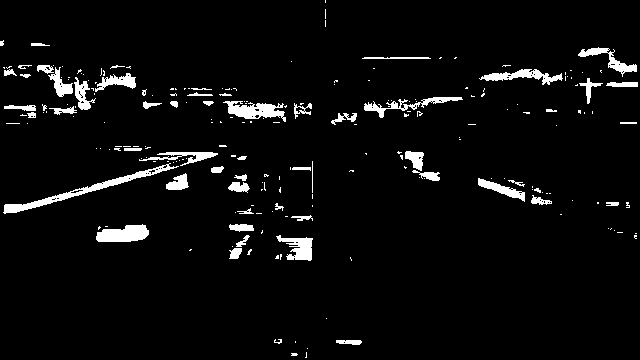

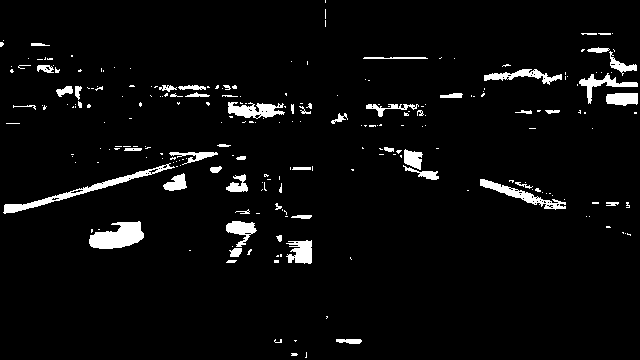

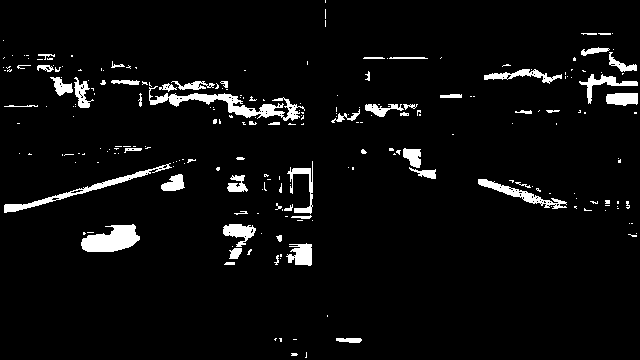

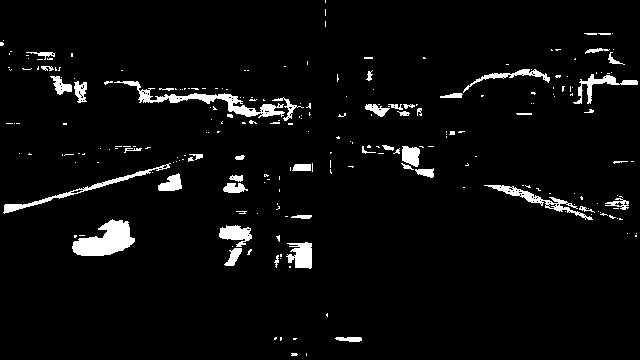

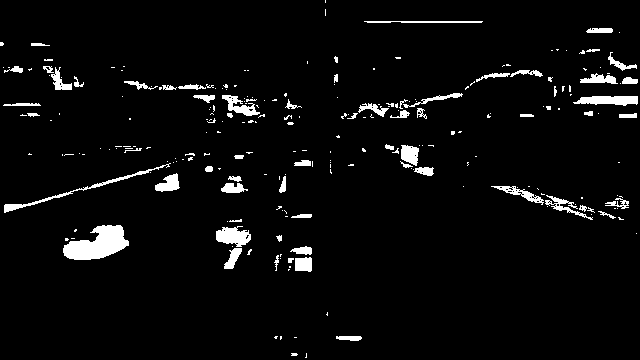

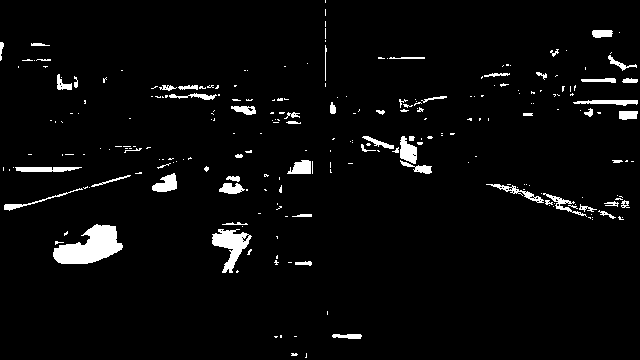

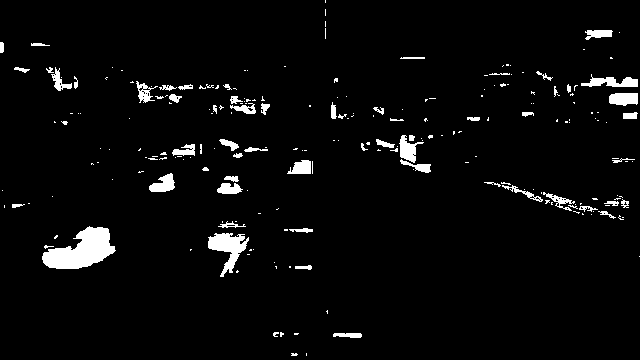

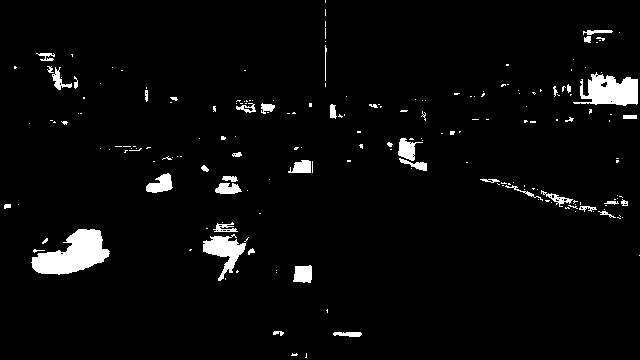

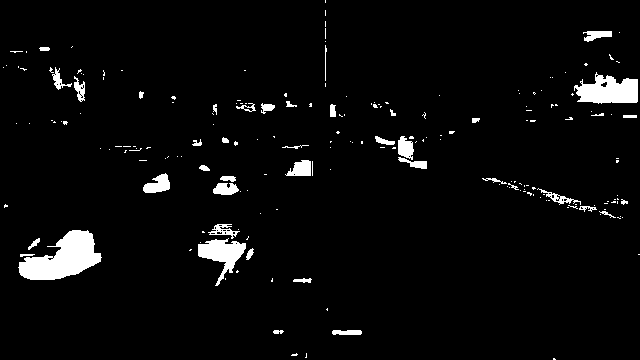

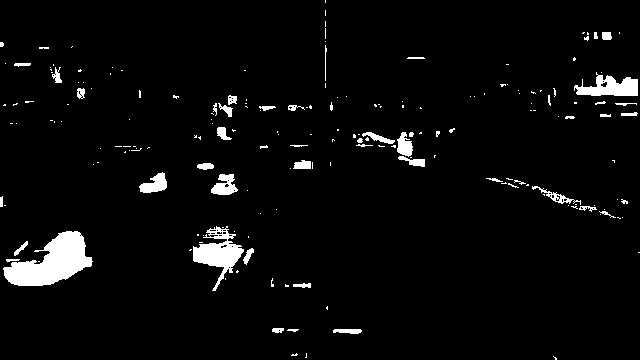

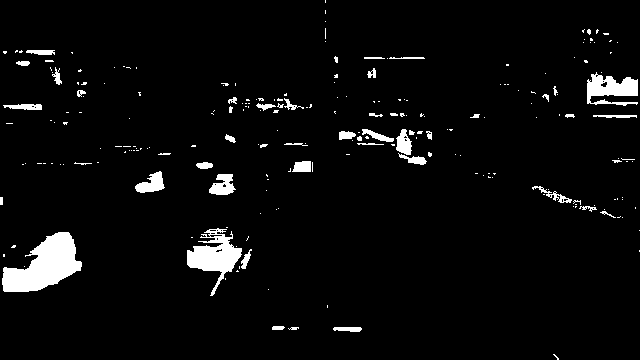

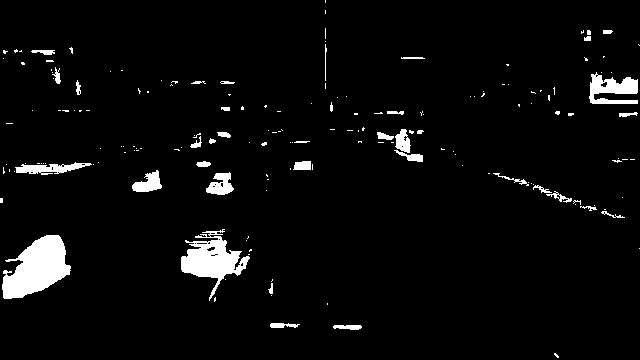

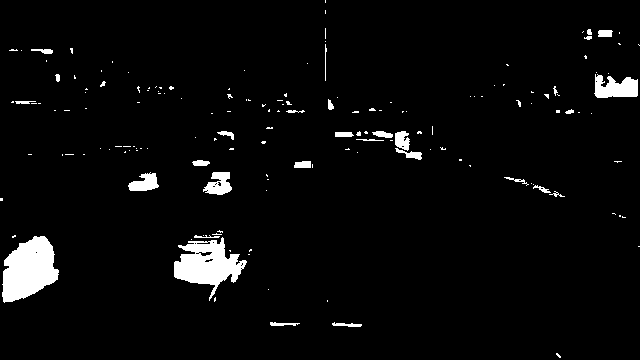

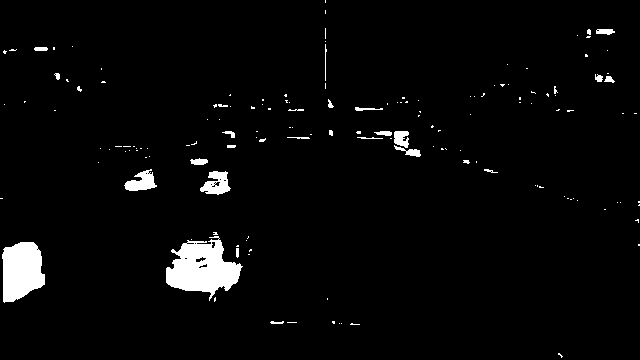

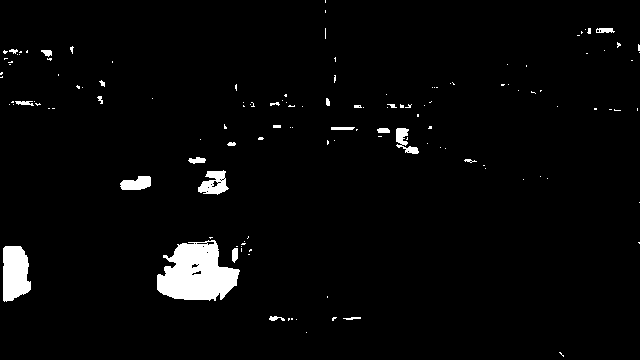

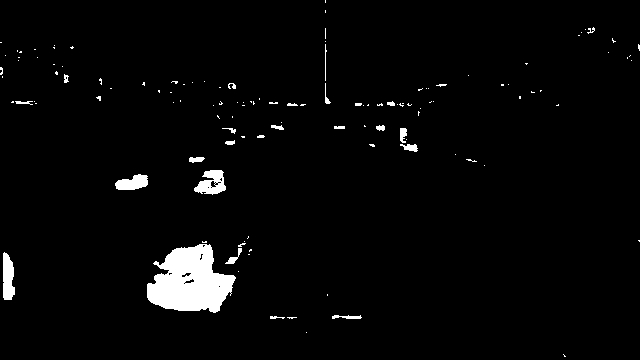

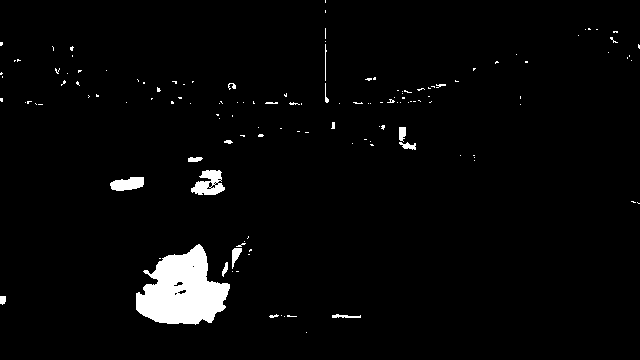

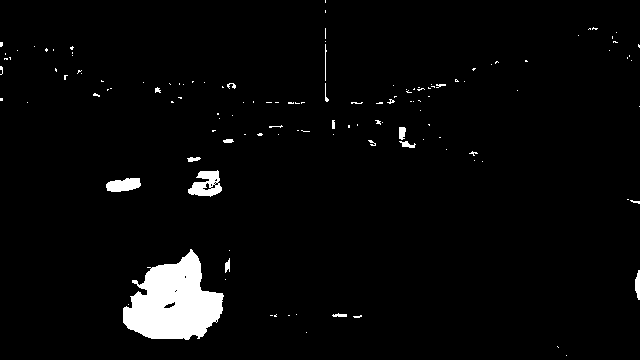

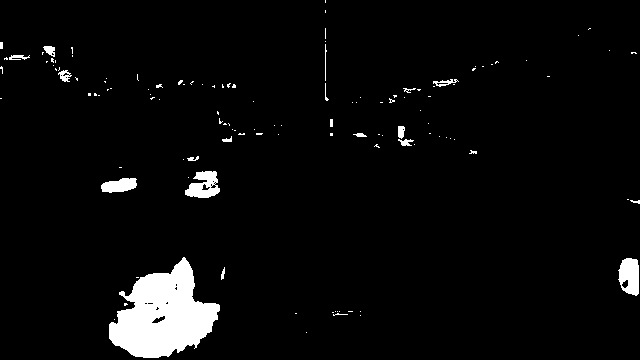

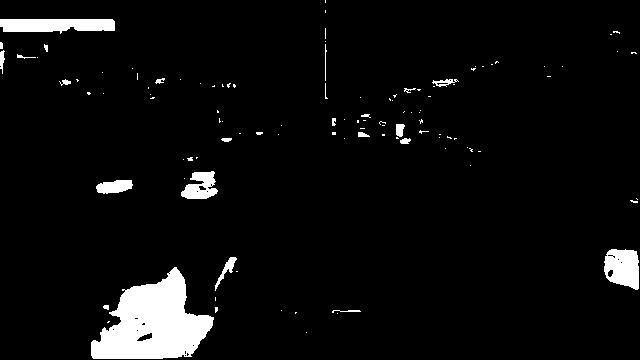

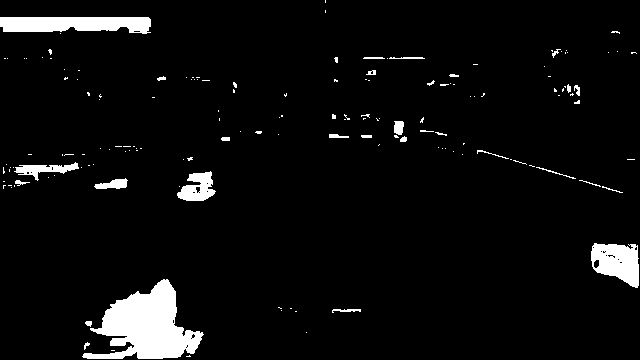

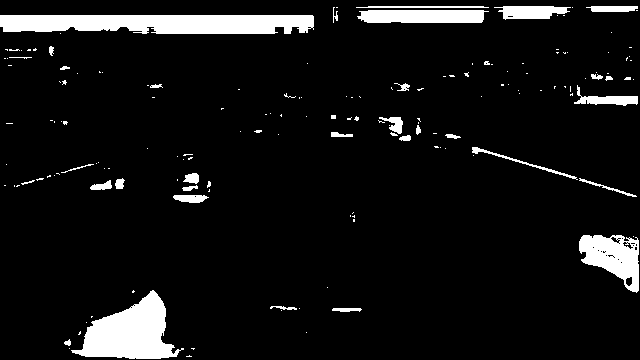

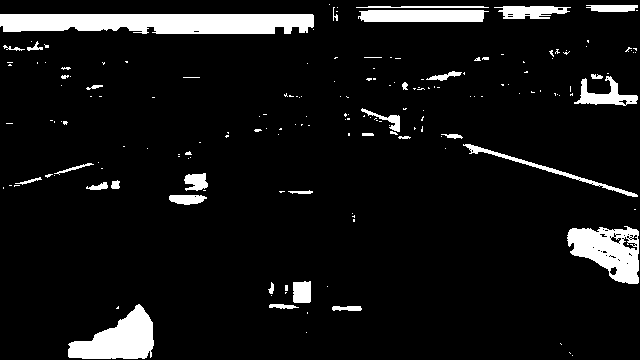

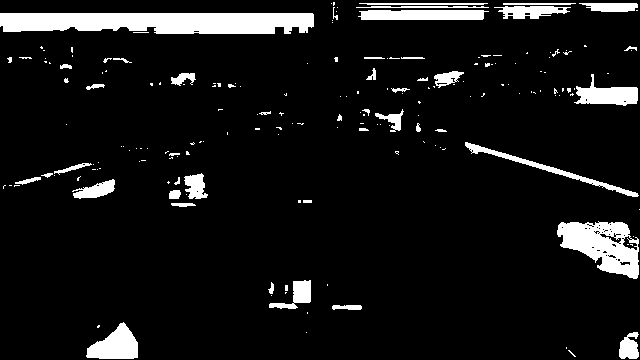

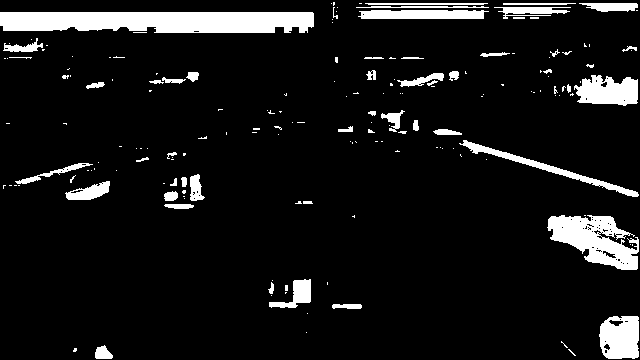

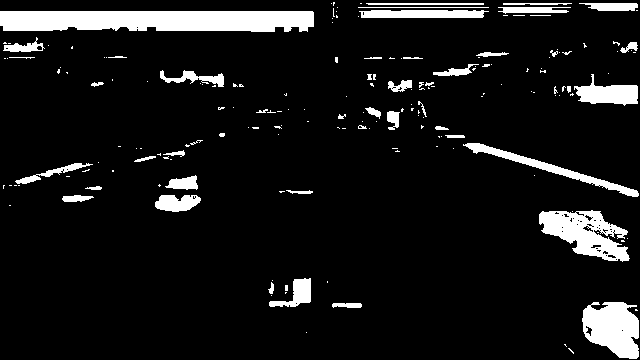

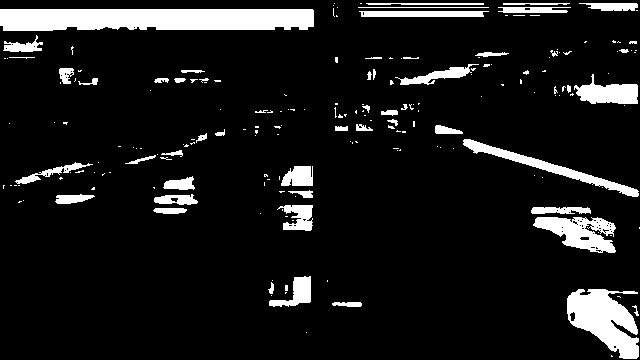

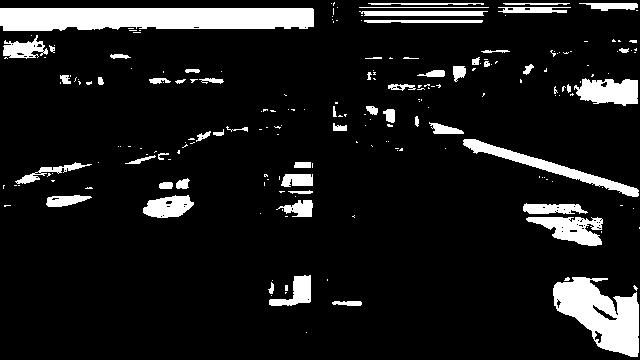

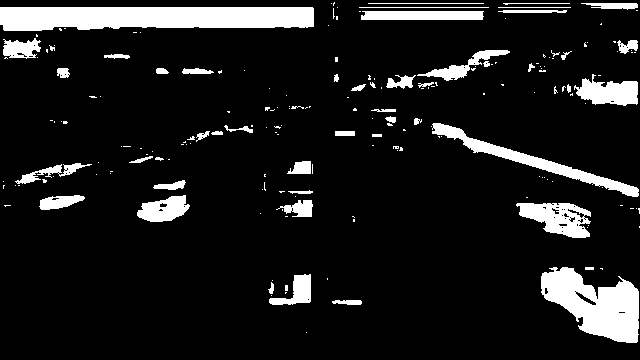

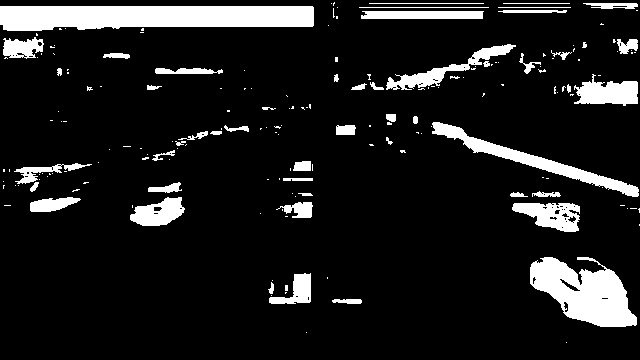

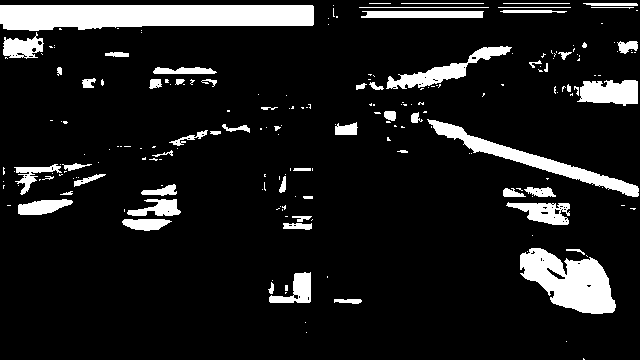

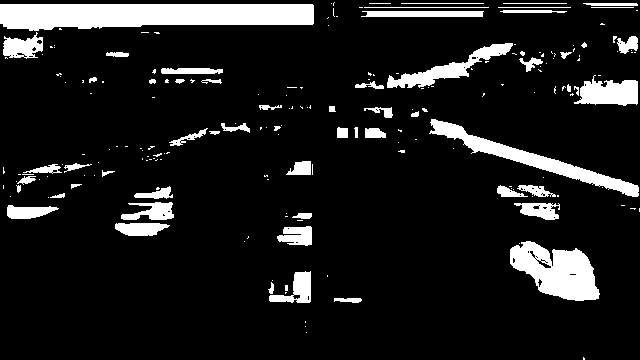

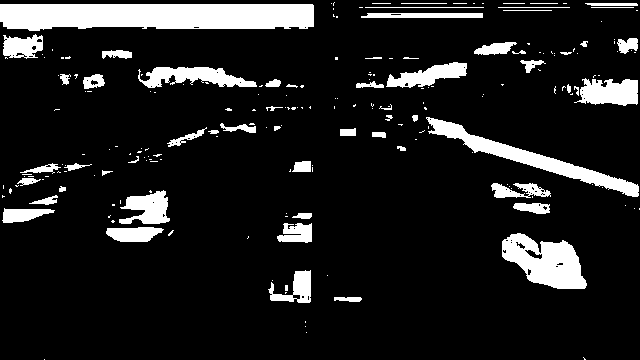

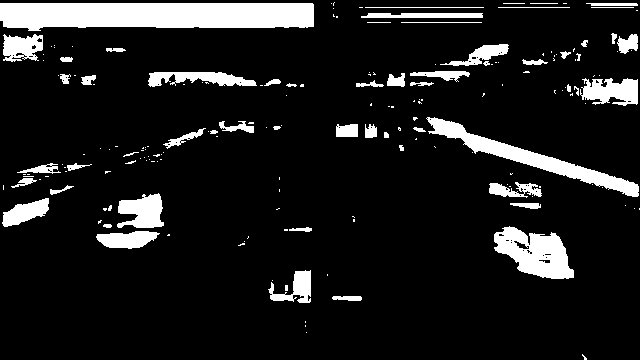

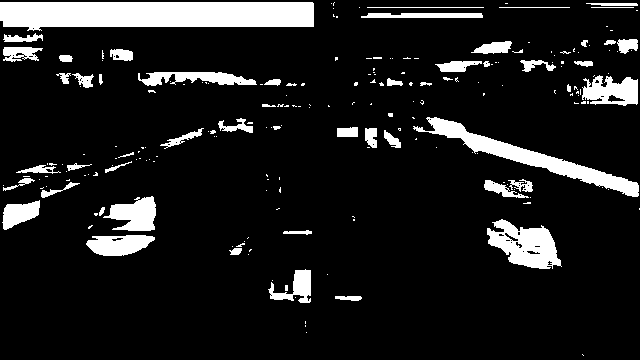

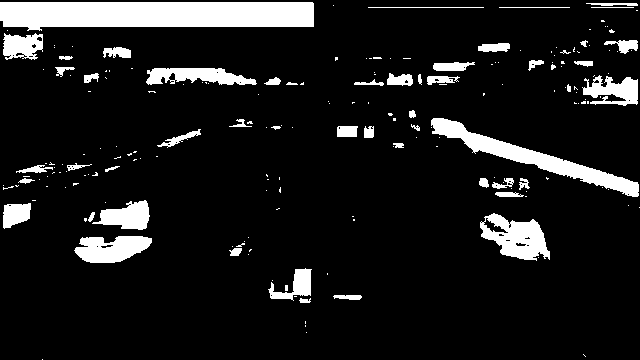

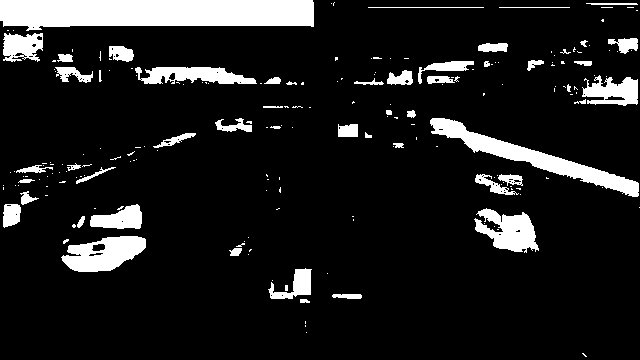

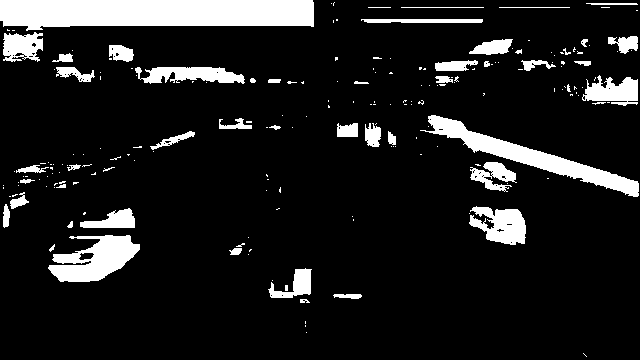

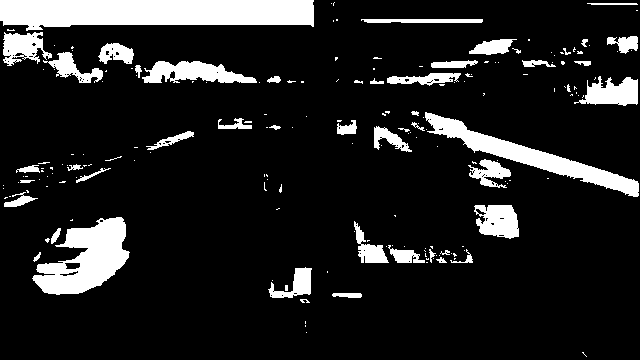

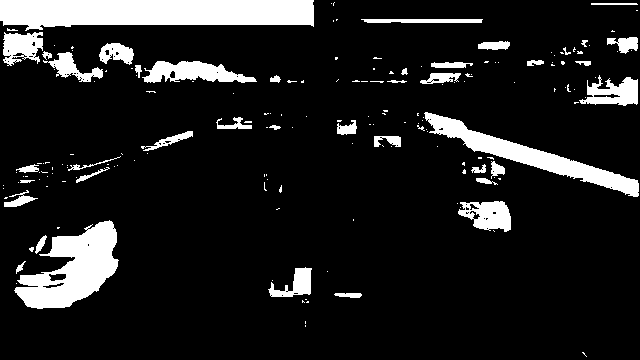

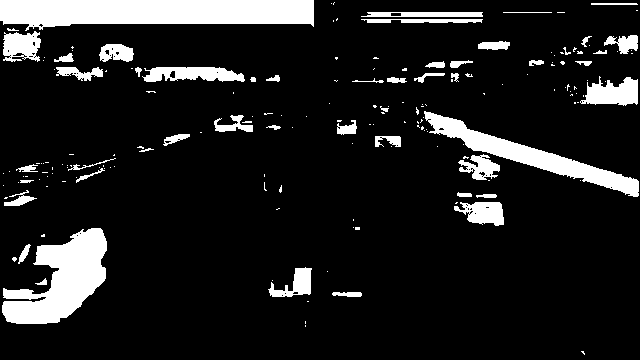

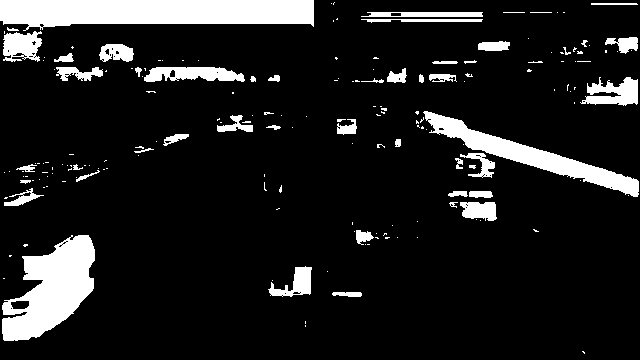

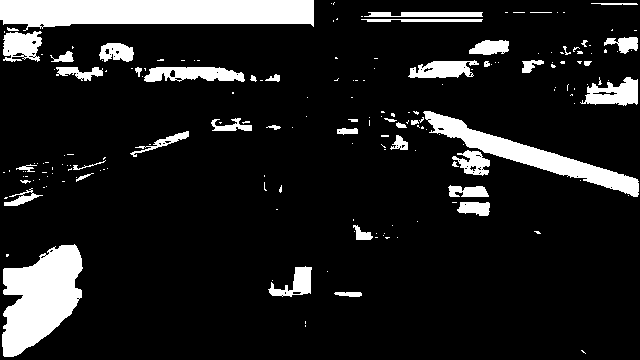

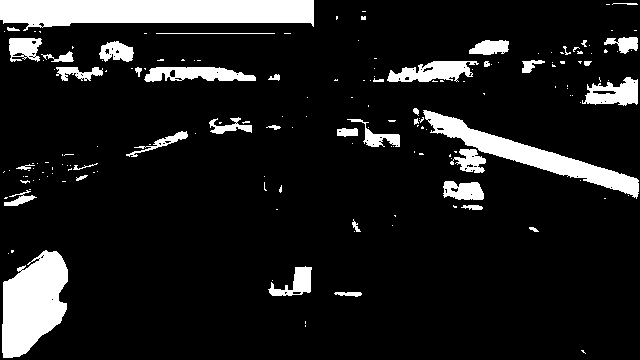

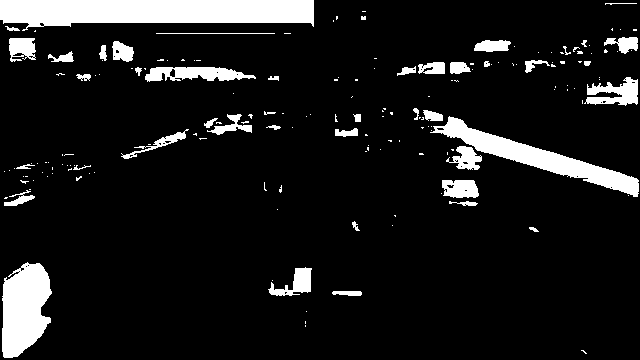

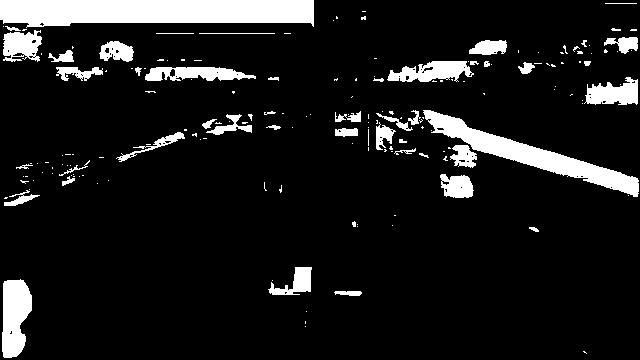

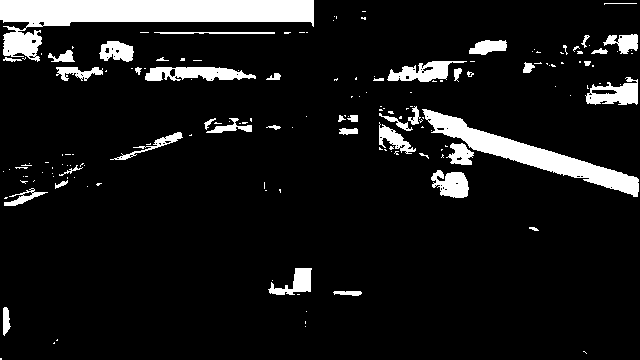

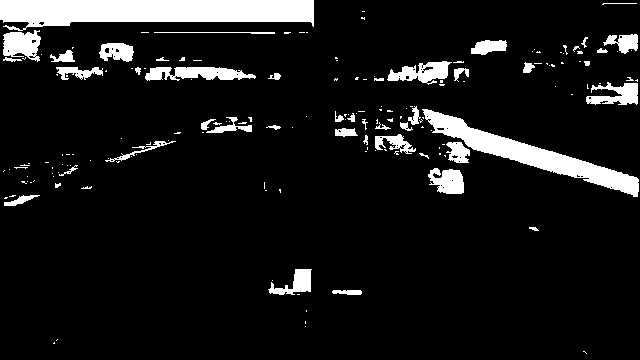

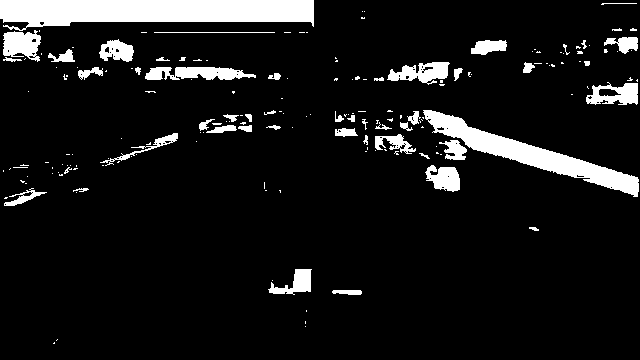

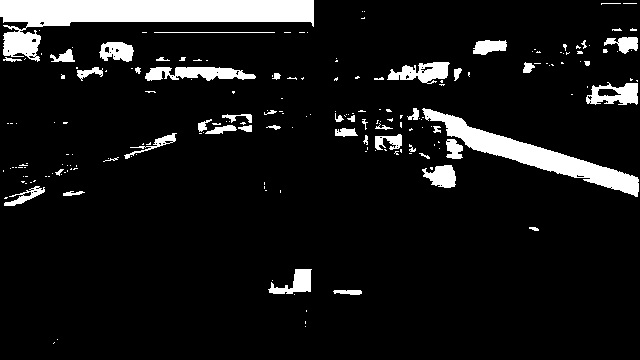

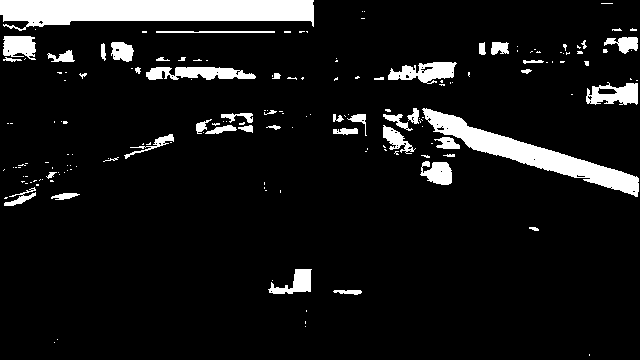

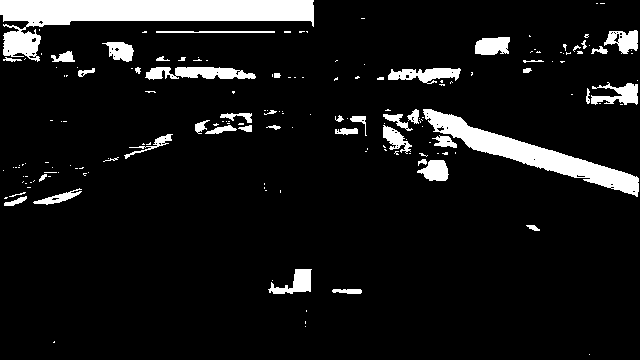

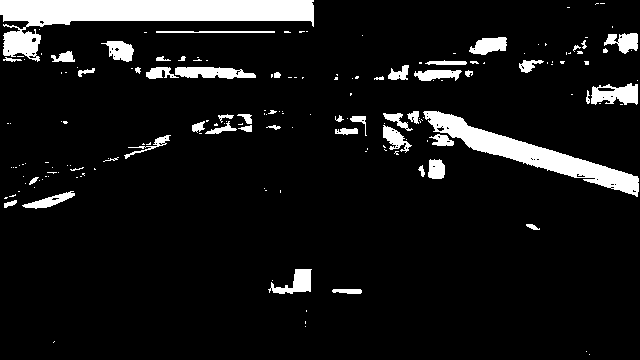

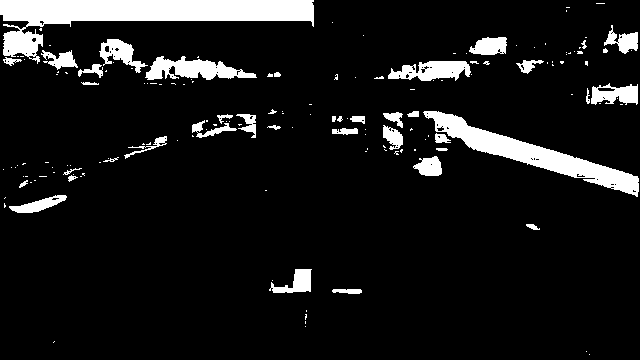

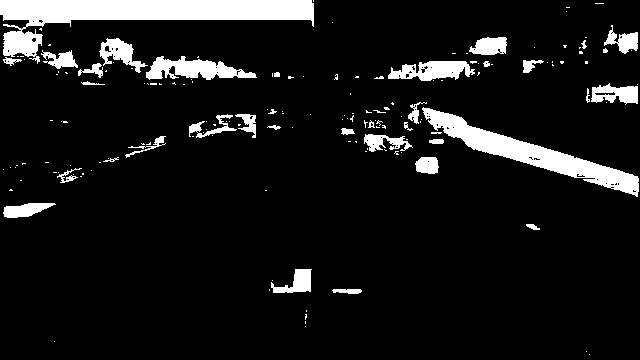

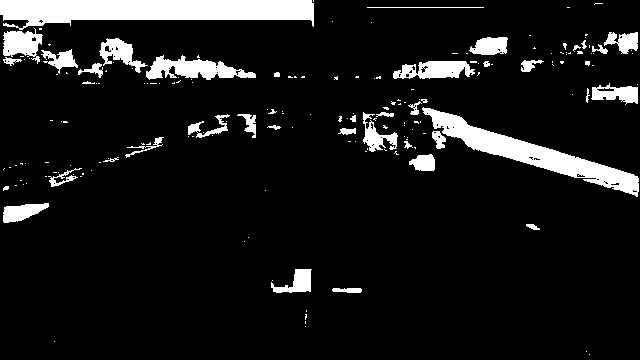

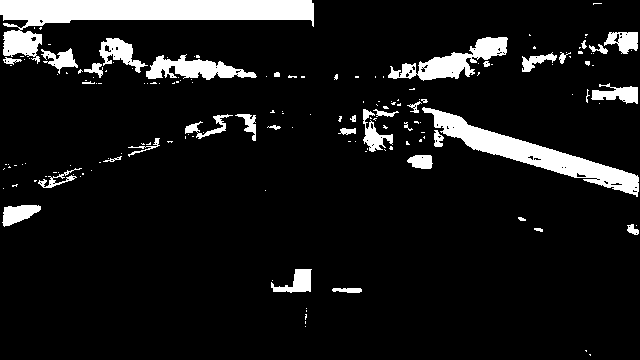

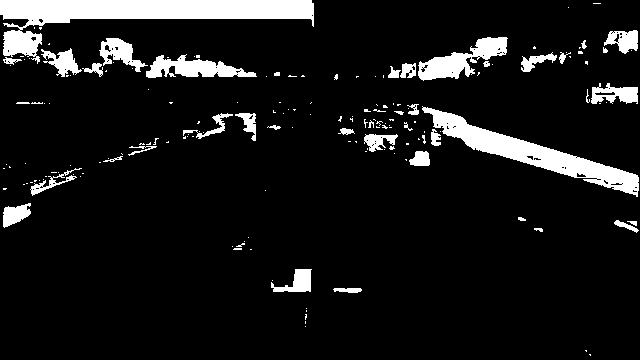

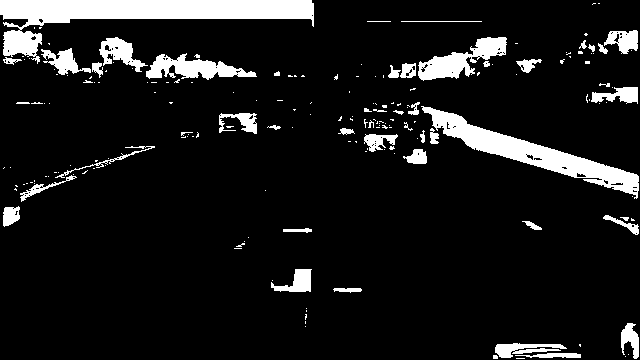

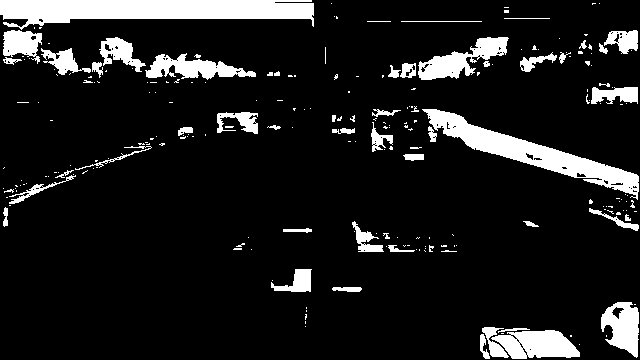

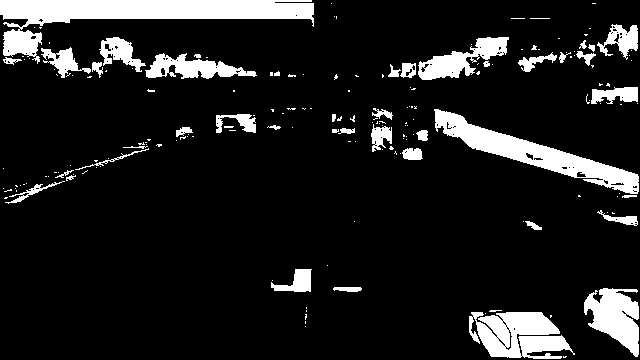

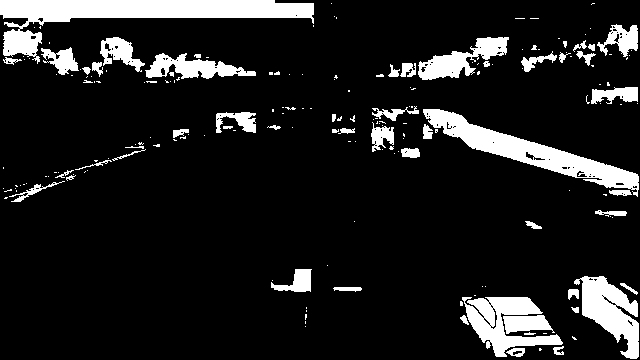

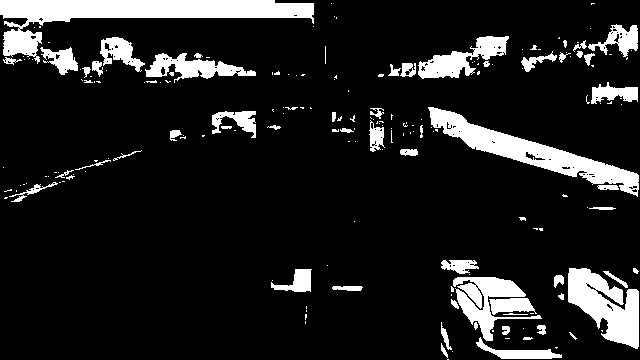

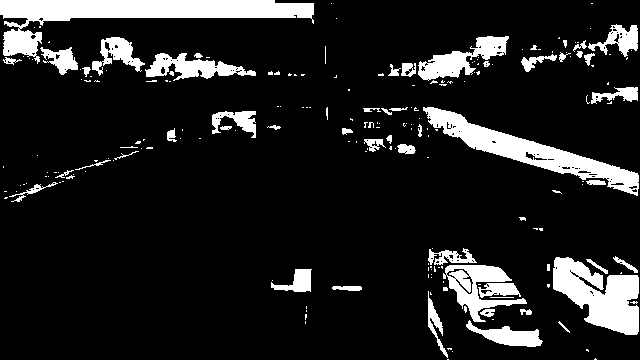

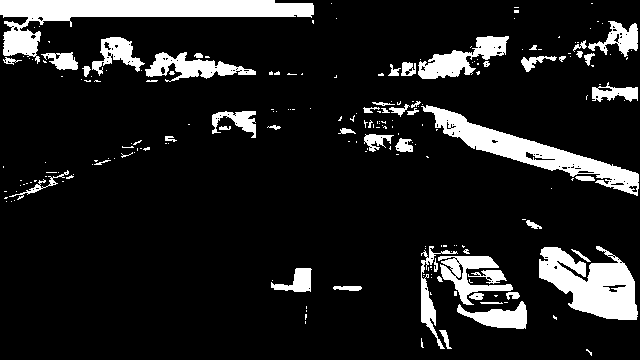

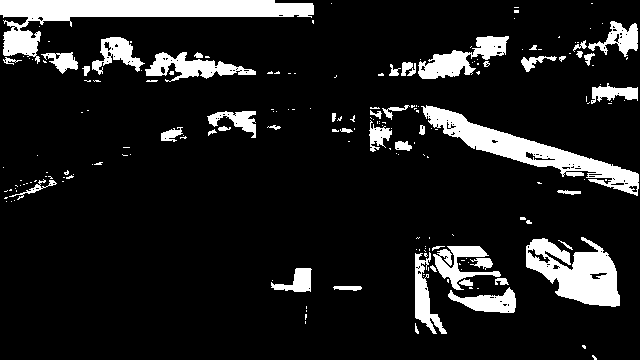

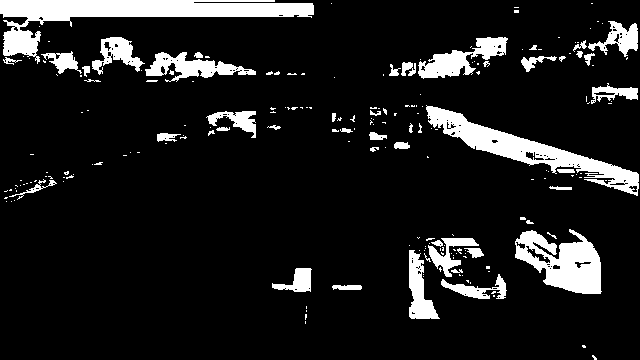

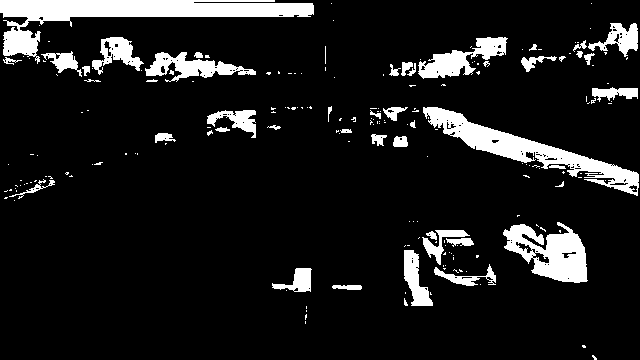

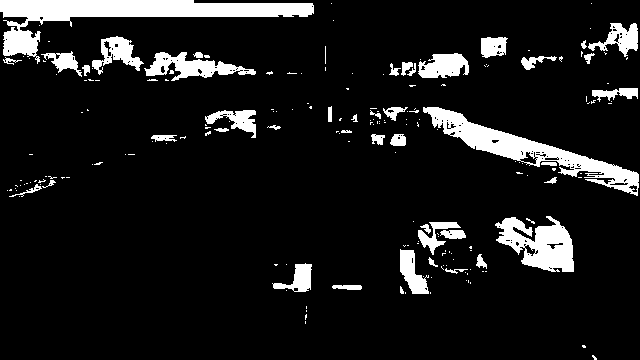

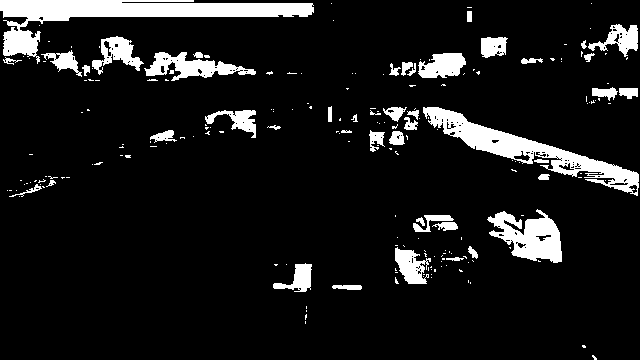

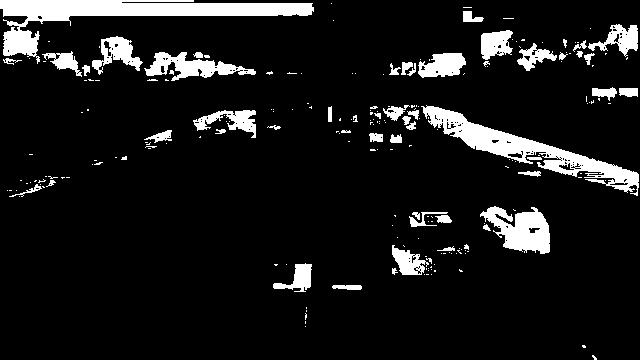

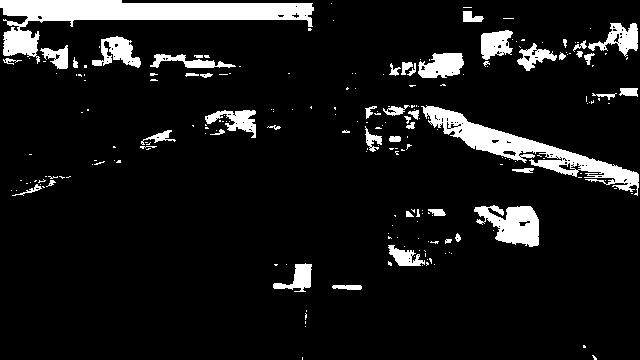

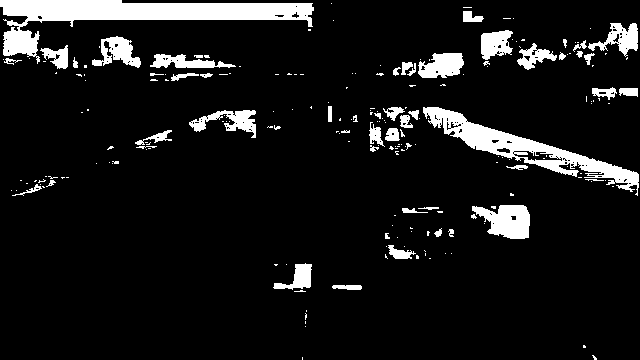

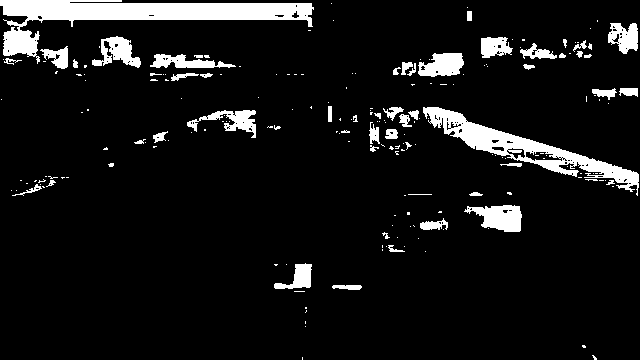

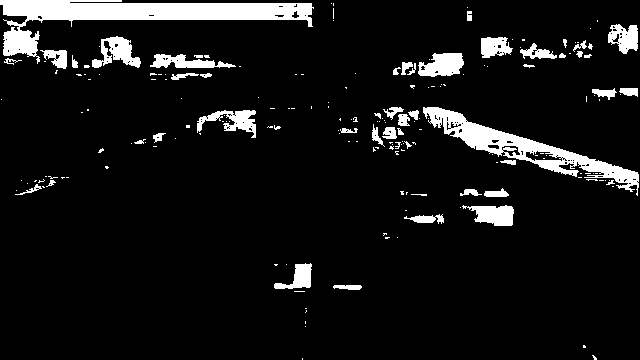

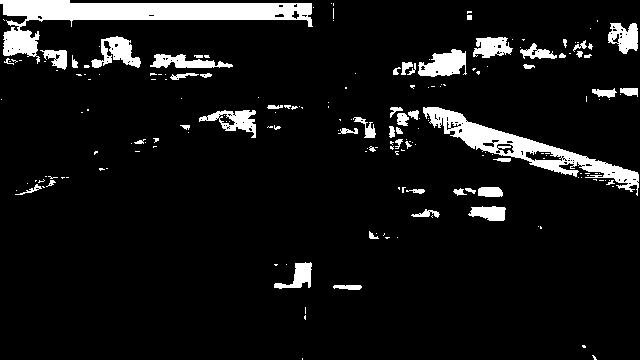

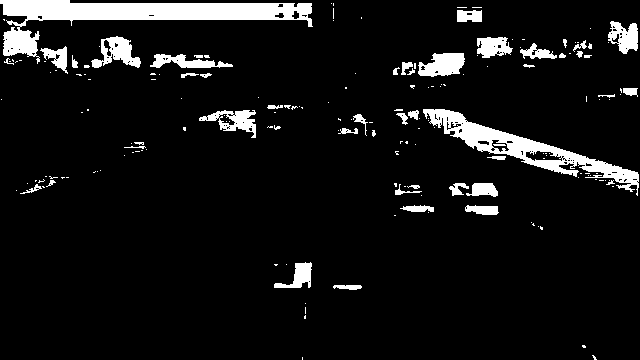

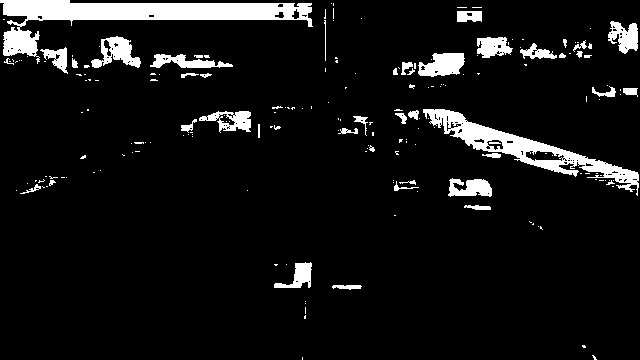

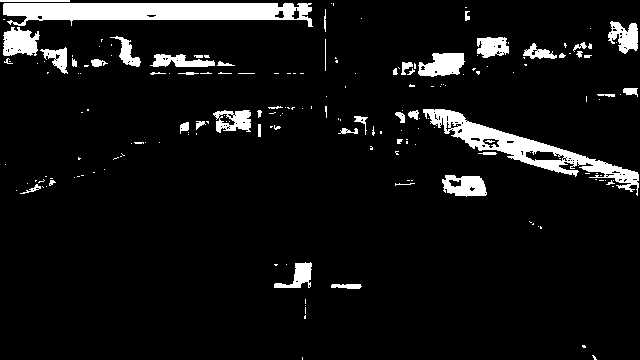

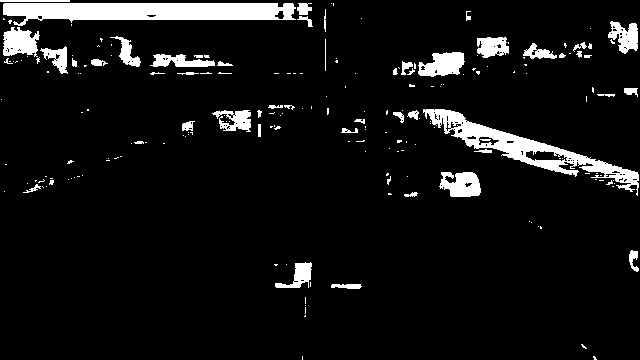

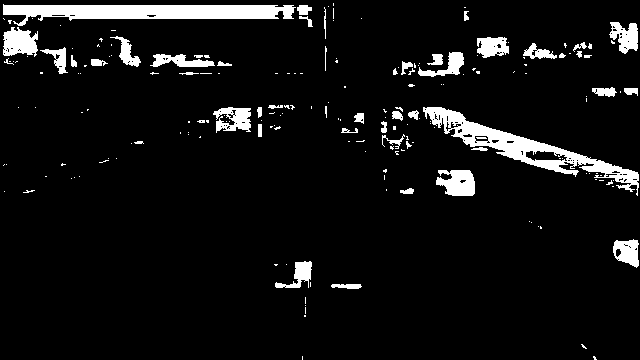

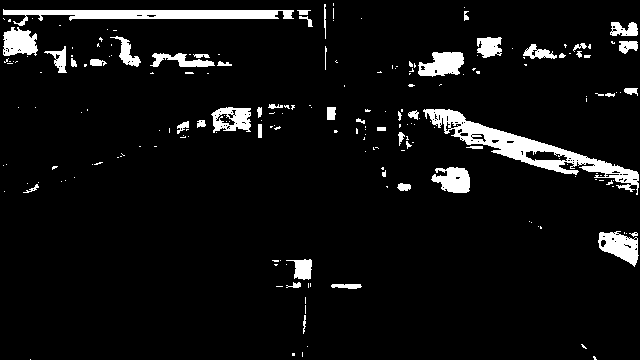

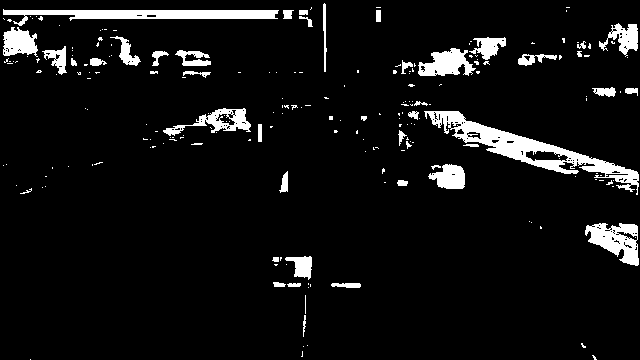

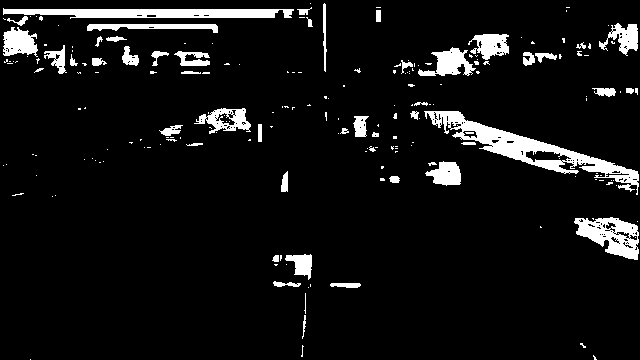

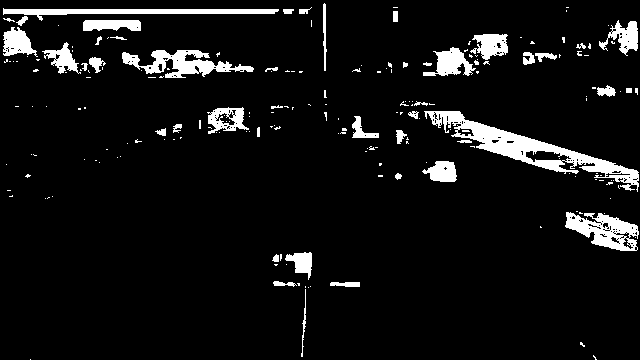

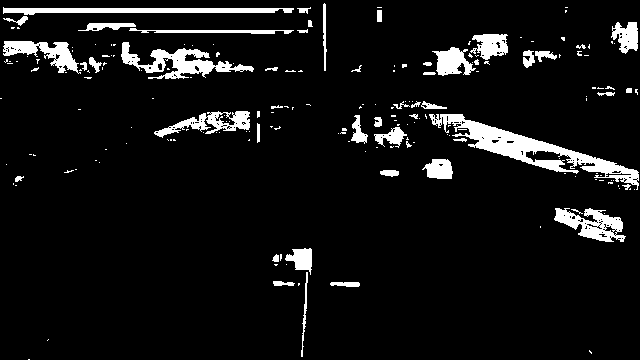

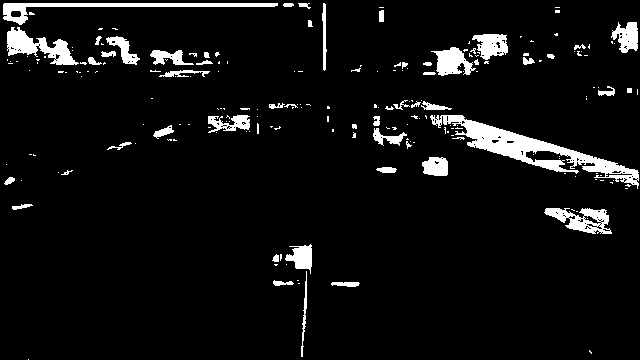

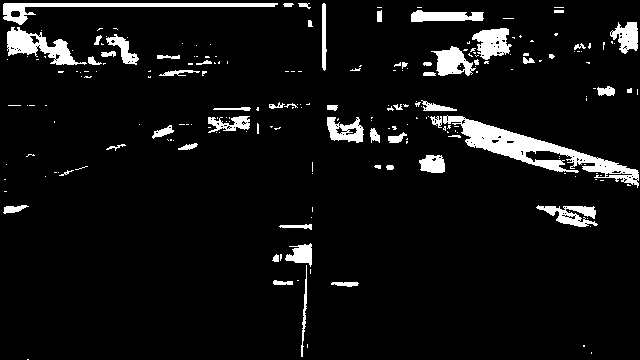

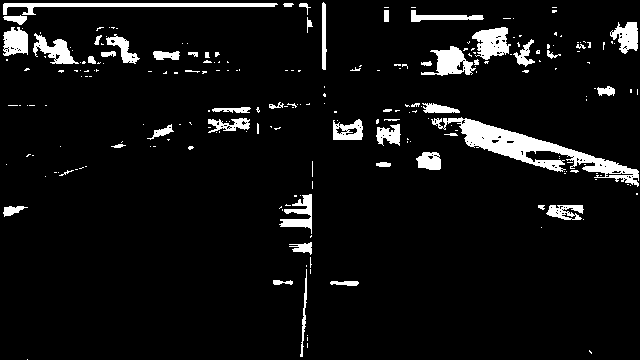

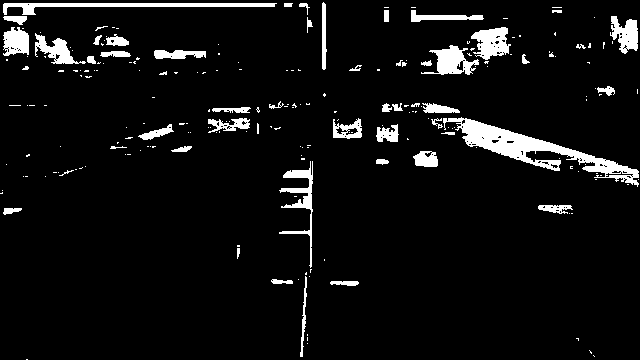

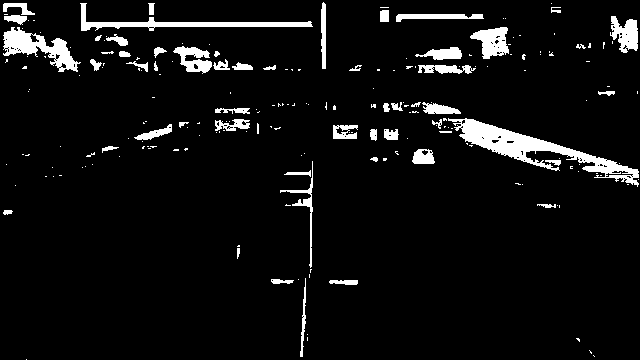

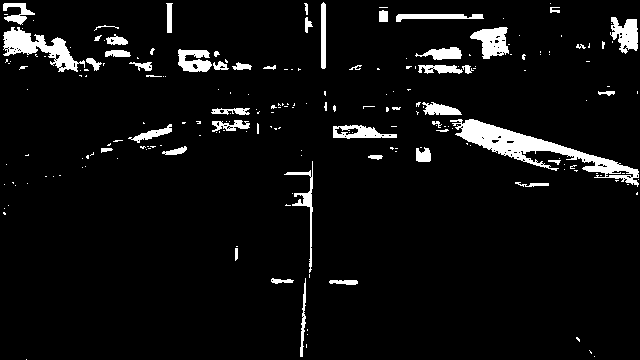

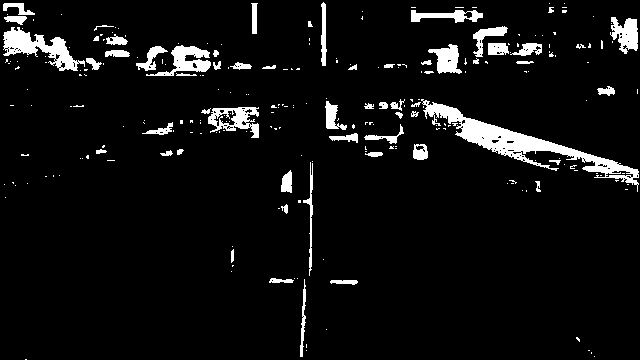

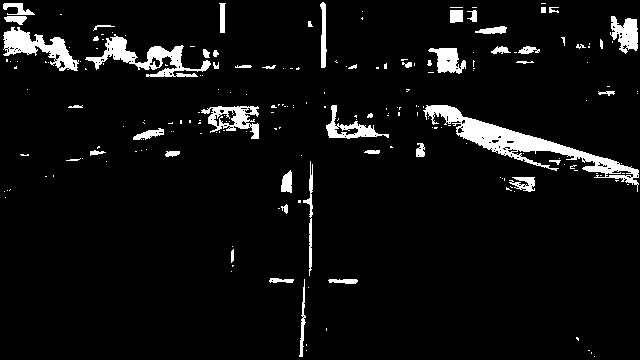

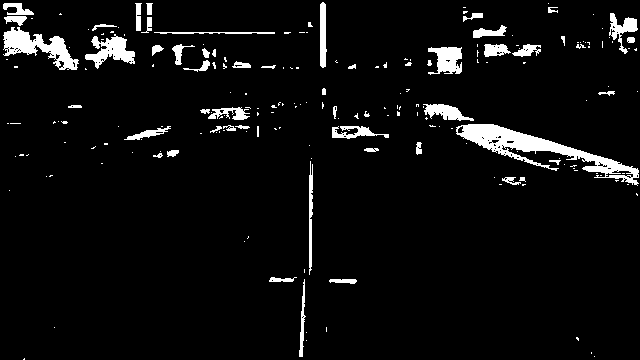

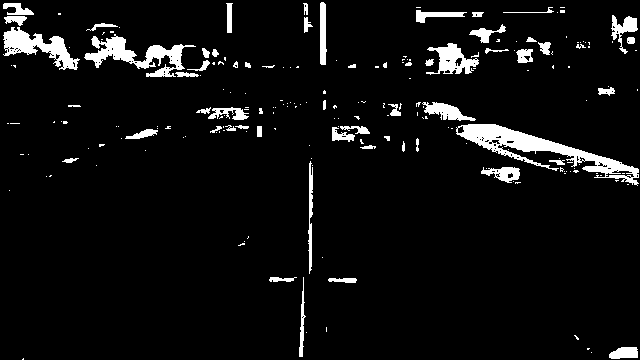

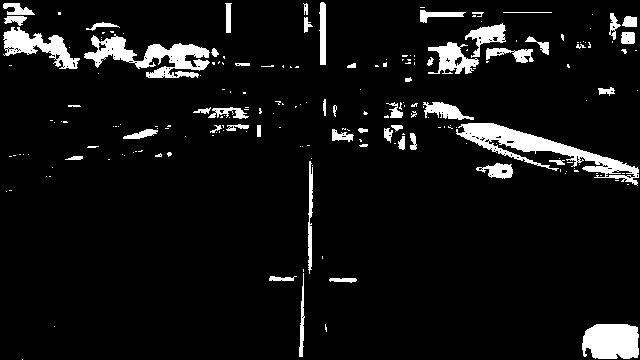

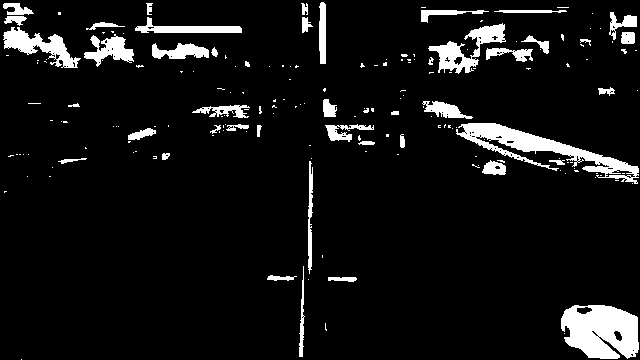

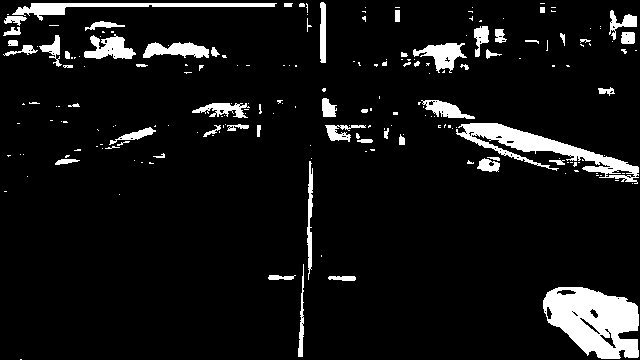

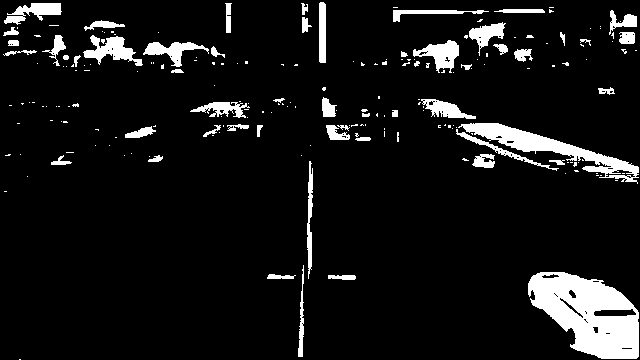

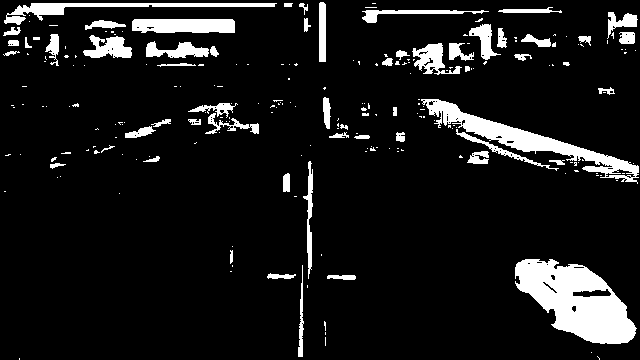

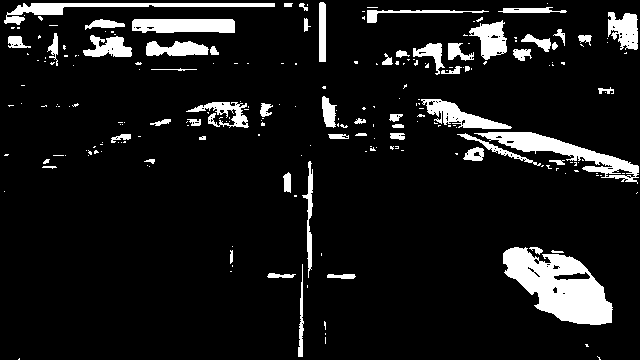

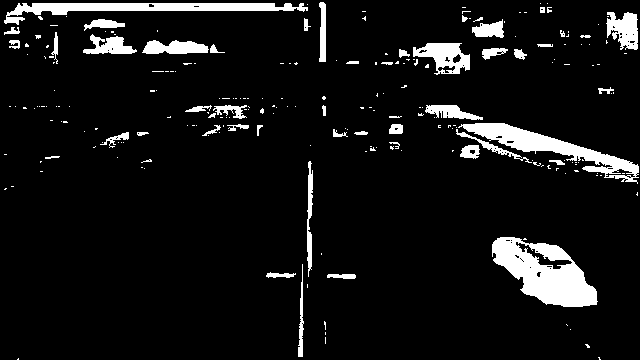

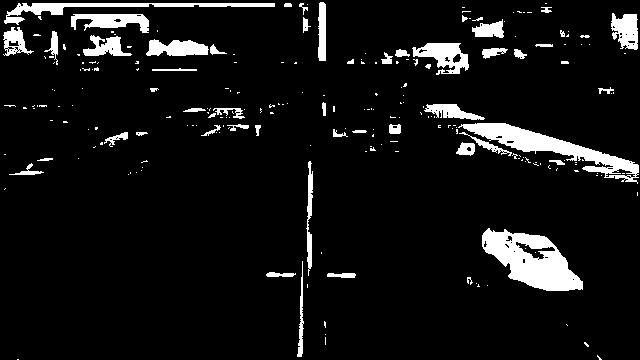

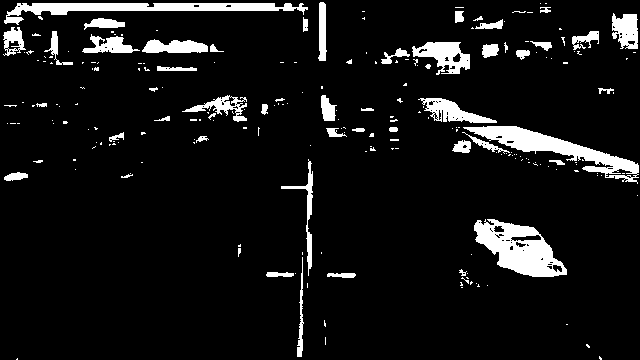

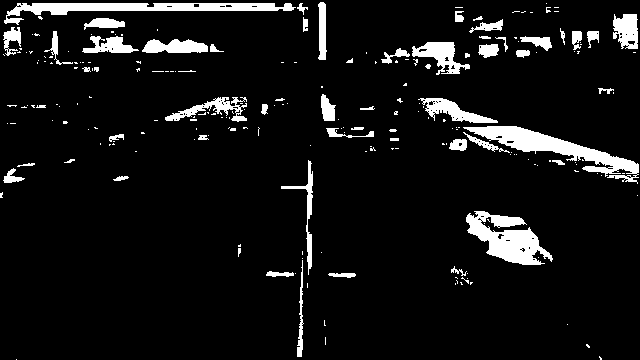

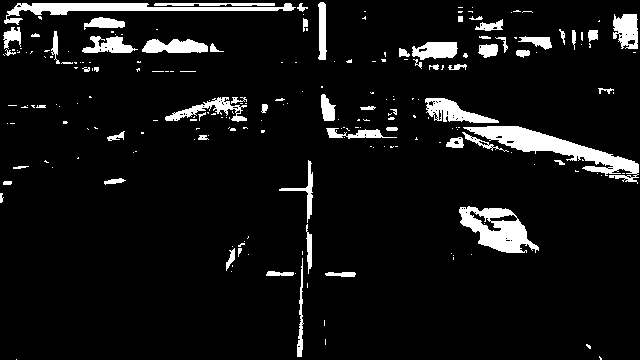

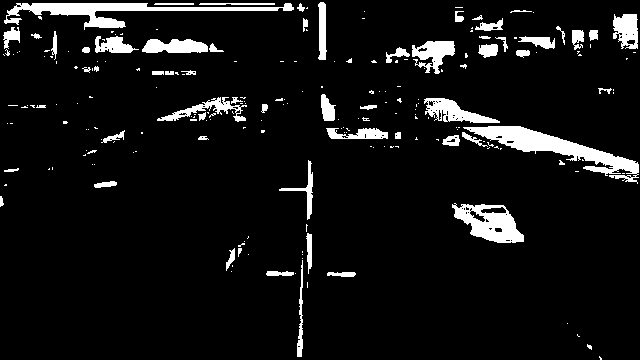

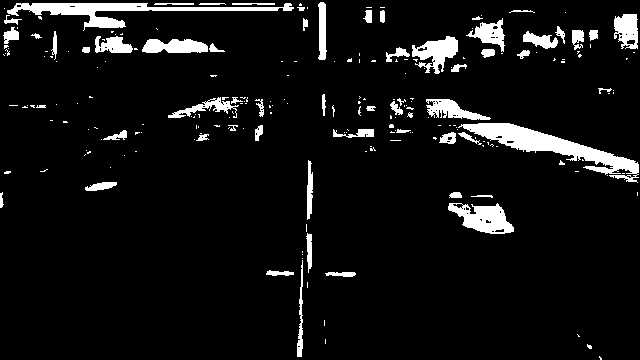

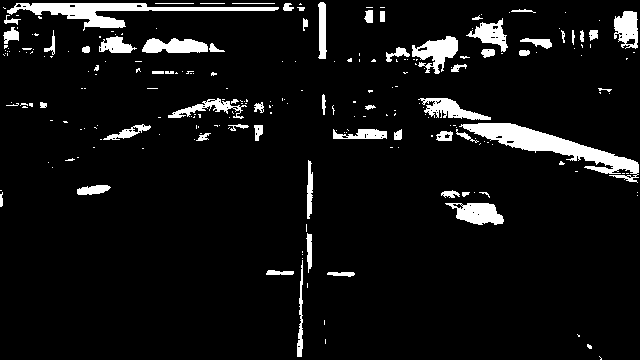

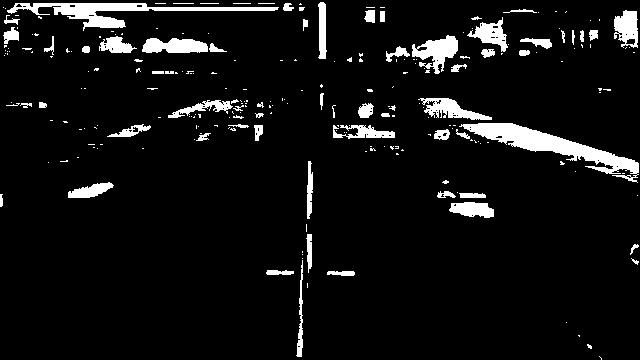

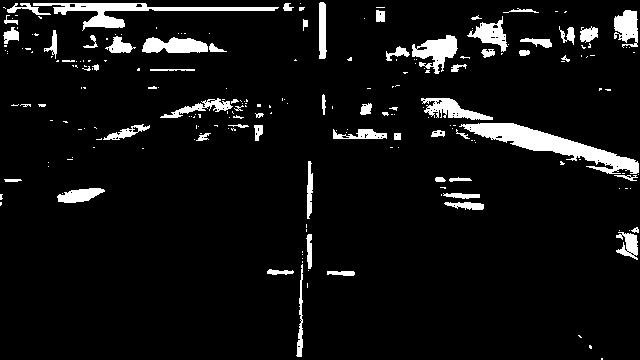

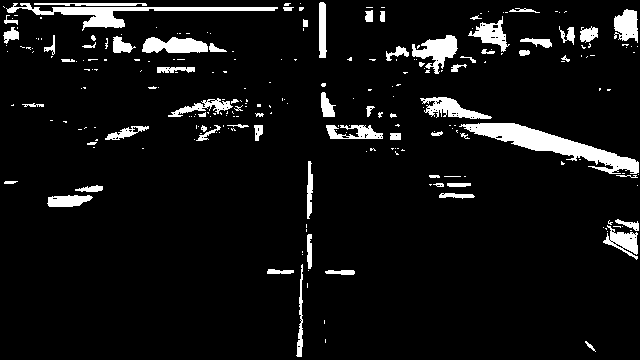

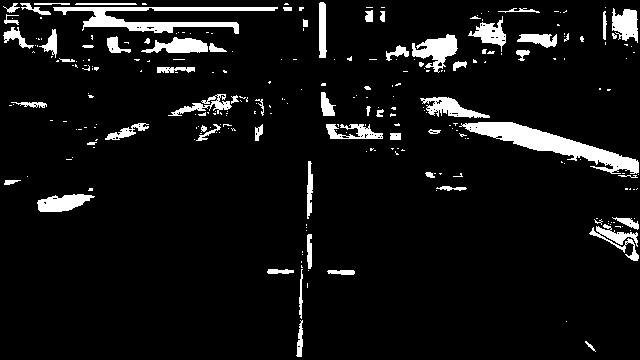

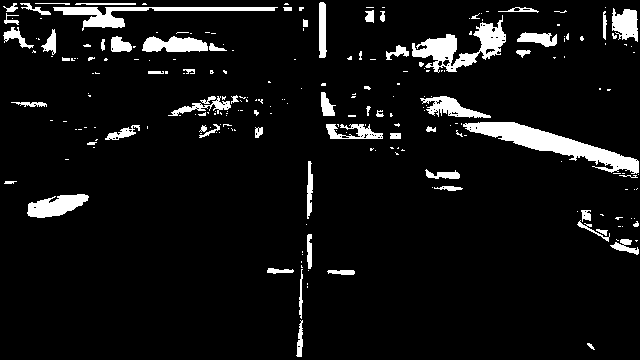

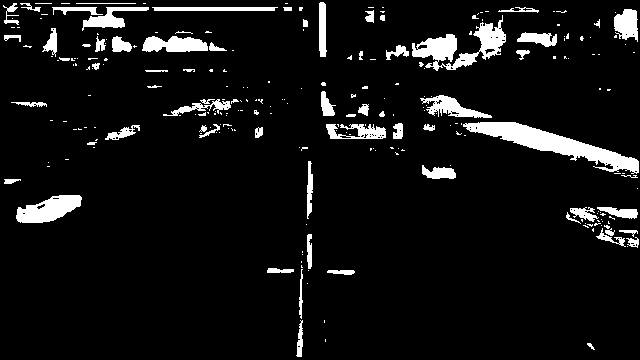

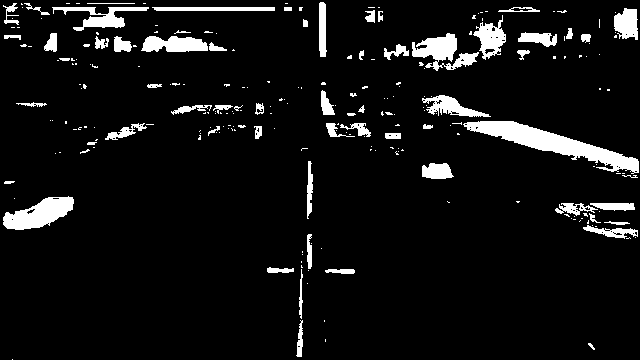

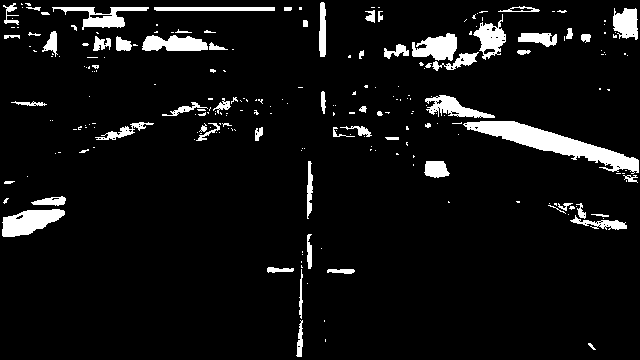

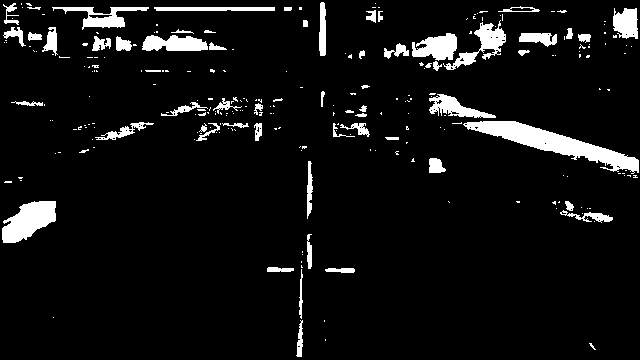

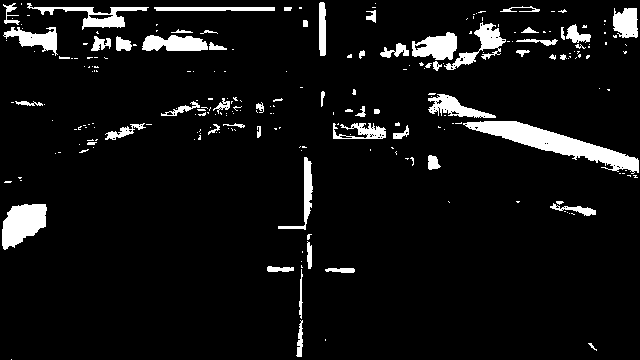

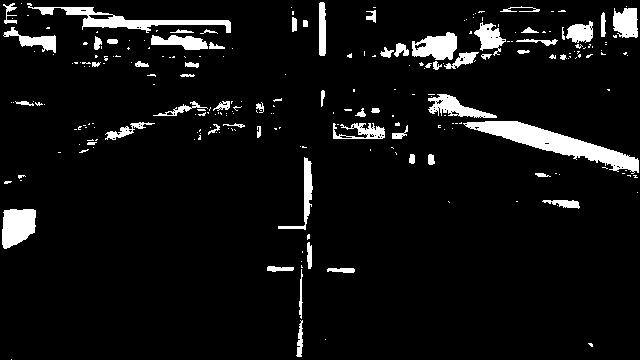

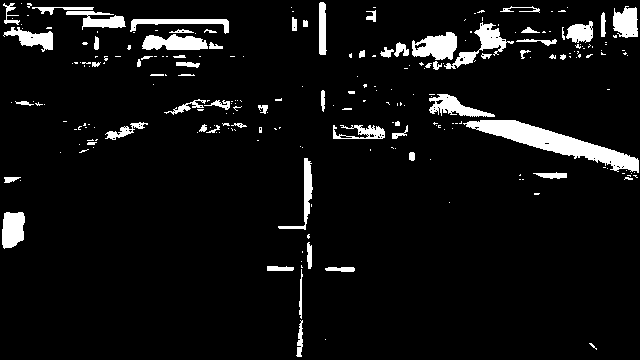

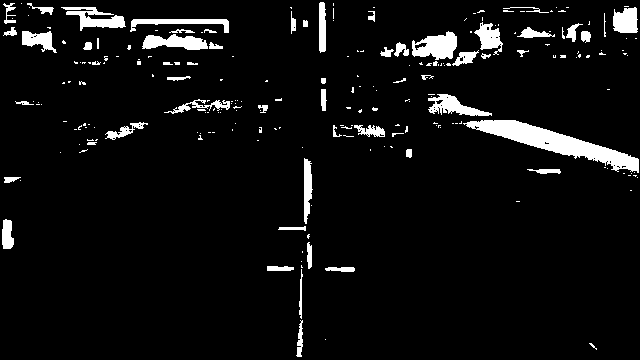

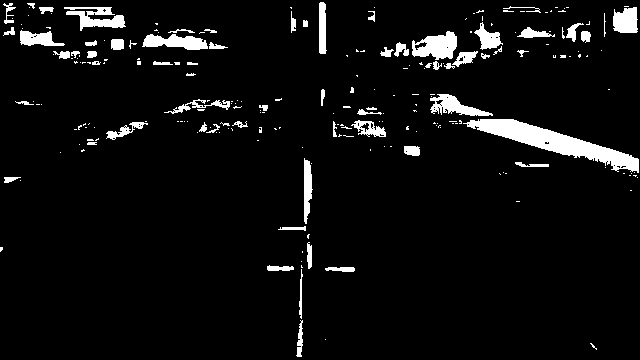

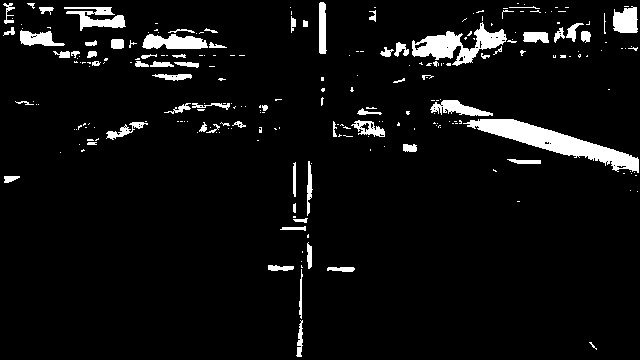

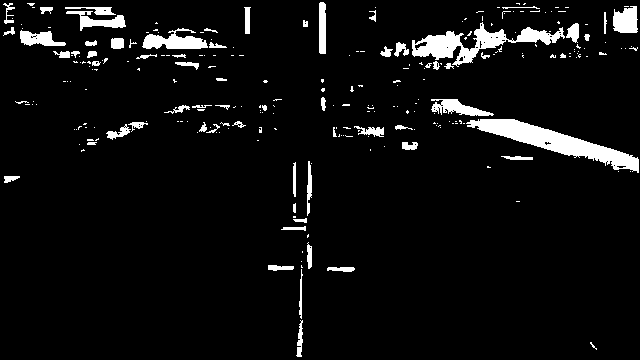

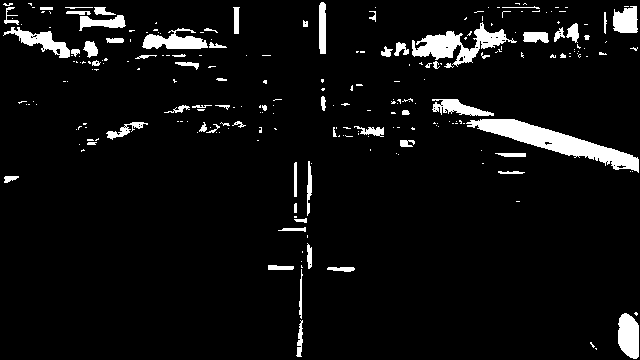

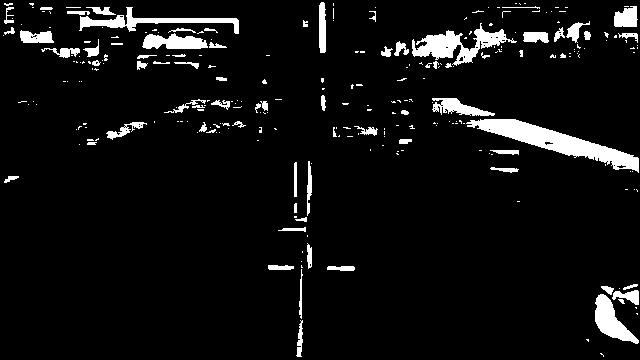

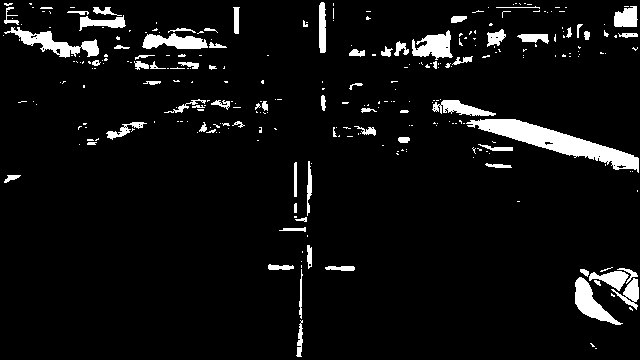

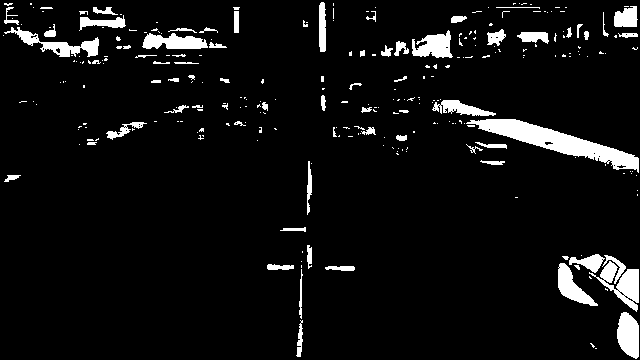

In [ ]:
HTML(display_video2(cap2).to_html5_video())